In [11]:
# Enable autoreload extension to automatically reload modules
%load_ext autoreload
%autoreload 1

# Import necessary modules and libraries
from AirSeaFluxCode import AirSeaFluxCode  # Import AirSeaFluxCode class from AirSeaFluxCode module
import xarray as xr  # Import xarray library with alias xr
import gsw_xarray as gsw  # Import gsw_xarray module with alias gsw
import matplotlib.dates as mdates  # Import module for working with dates in matplotlib
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting
import numpy as np  # Import numpy library with alias np for numerical operations
import cartopy.crs as ccrs  # Import cartopy for geospatial data visualization
import cmocean.cm as cmo  # Import colormaps from cmocean for oceanography
from matplotlib.lines import Line2D
import statsmodels.api as sm
from matplotlib.ticker import FuncFormatter
from collections import defaultdict
from tqdm.notebook import tqdm_notebook as tqdm
import scipy.stats as sstats
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import numpy as np

# Import my_funcs module for interactive reloading
%aimport my_funcs

# Call update_params function from my_funcs module to update parameters
my_funcs.update_params(fontsize=24)

# Define a function to customize x-axis ticks on a plot
def fix_xticks(ax):
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to display month
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))  # Format major ticks as abbreviated month (e.g., Jan)
    # Set x-axis label to '2019'
    ax.set_xlabel('2019')

# Define color variables with hexadecimal color codes
c20 = "#C13F89"  # Define color c20
c22 = "#3ec177"  # Define color c22
c23 = "#3e88c1"  # Define color c23
ext = "#a43ec1"  # Define color ext

kc  = "#006699"
ppc = "#dc133c"
wgc  = "#FF6600"

# Manually create Line2D objects for legend handles
legend_lines = [
    Line2D([], [], color=c20, lw=3, label='SD1020'),
    Line2D([], [], color=c22, lw=3, label='SD1022'),
    Line2D([], [], color=c23, lw=3, label='SD1023')]

# Manually create Line2D objects for legend handles
legend_dots = [
    Line2D([], [], color=c20, lw=0, marker='.', ms=25, label='SD1020'),
    Line2D([], [], color=c22, lw=0, marker='.', ms=25, label='SD1022'),
    Line2D([], [], color=c23, lw=0, marker='.', ms=25, label='SD1023')]

# Define a custom formatter function
def km_formatter(x, pos):
    return f'{x / 1:.0f} km'

def pc_formatter(x, pos):
    return f'{x:.0f}%'

def fix_spines(ax,c):
    for spine in ax.spines.values():
        spine.set_color(c)
        spine.set_linewidth(3)

# colors = [c20, c22, c23]
colors = [kc, ppc, sc]
labels = ["SD1020", "SD1022", "SD1023"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
ds20 = xr.open_dataset("../data/saildrone-gen_5-antarctica_circumnavigation_2019-sd1020-20190119T040000-20190803T043000-1_minutes-v1.1620360815446.nc")\
       .squeeze().swap_dims({'obs':'time'})
sbk  = xr.open_dataset("../../2023_Validating_Sailbuoy/data/kringla_quicche.nc")
sb   = xr.open_dataset("../../2023_Validating_Sailbuoy/data/kringla_sochic.nc")
sbpp = xr.open_dataset("../../2023_Validating_Sailbuoy/data/pimpim_quicche_full.nc").sel(time=slice("2023-03-20","2023-05-01"))

In [212]:
wg = pd.read_csv("/Volumes/GLIDER/quicche_2023_pco2_salinity.csv",parse_dates=["time"]).set_index("time").to_xarray().set_coords(["latitude","longitude"])

In [59]:
def plot_salinity(rolling=False):
    fig, ax = plt.subplots(4,1,figsize=(32,16),sharex=False,constrained_layout=True)

    datasets  = [ds20, sbs, wg, sbpp]
    variables = ["SAL_RBR_MEAN","sss","salinity", "sss"]
    colorS = [c20, kc, wgc, ppc]
    titles = ["SD1020", "SBK SO-CHIC", "WG QUICCHE", "SBPP QUICCHE"]
    yoffset = [0.01, 0.0175, 0.01, 0.01]

    for axs,ds,var,c,t,yt in zip(ax,datasets,variables,colorS,titles,yoffset):
        
        ds[var].plot(ax=axs, lw=0, marker='.', mfc='k', mec='k', ms=10, label="Raw")

        if rolling: 

            ds[var].rolling(time=3,center=True).mean("time").plot(ax=axs,lw=3,c='C1', label="3-point median")


        my_funcs.fix_xticks([axs],ds)
        axs.set_title(t,loc='left',c=c,fontweight="bold",y=0.05,x=yt)
        axs.set(title="",xlabel="", )
        axs.legend(loc='lower right')
        fix_spines(axs,c=c)

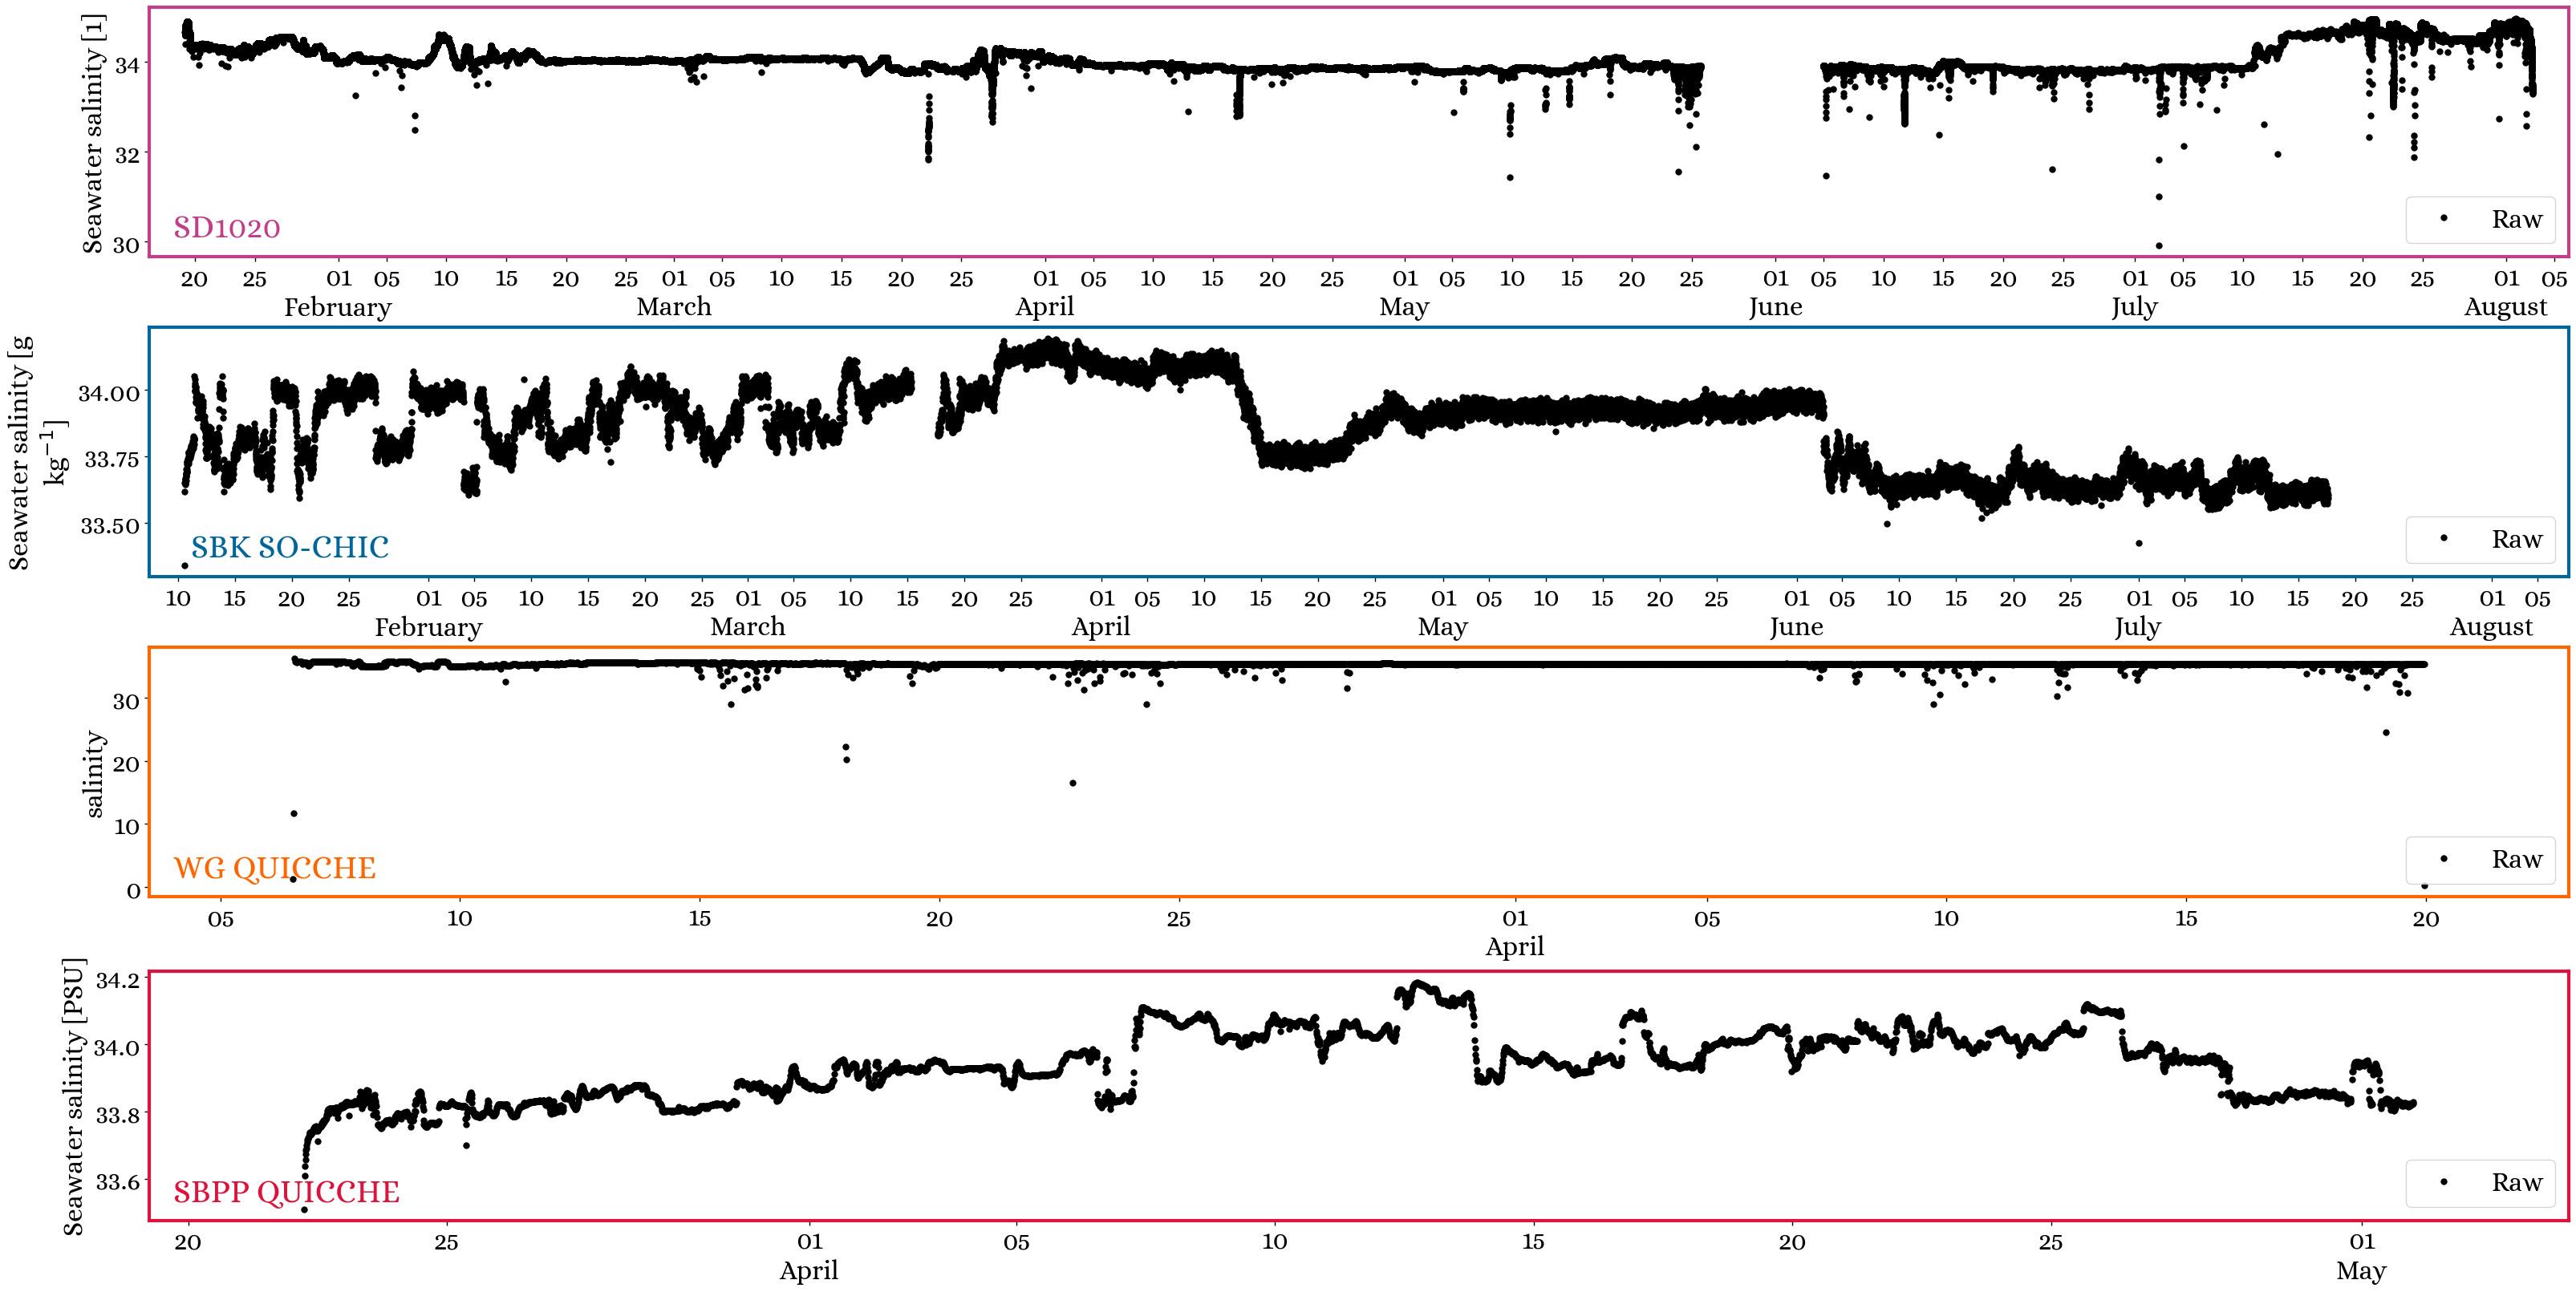

In [60]:
plot_salinity(rolling=False)

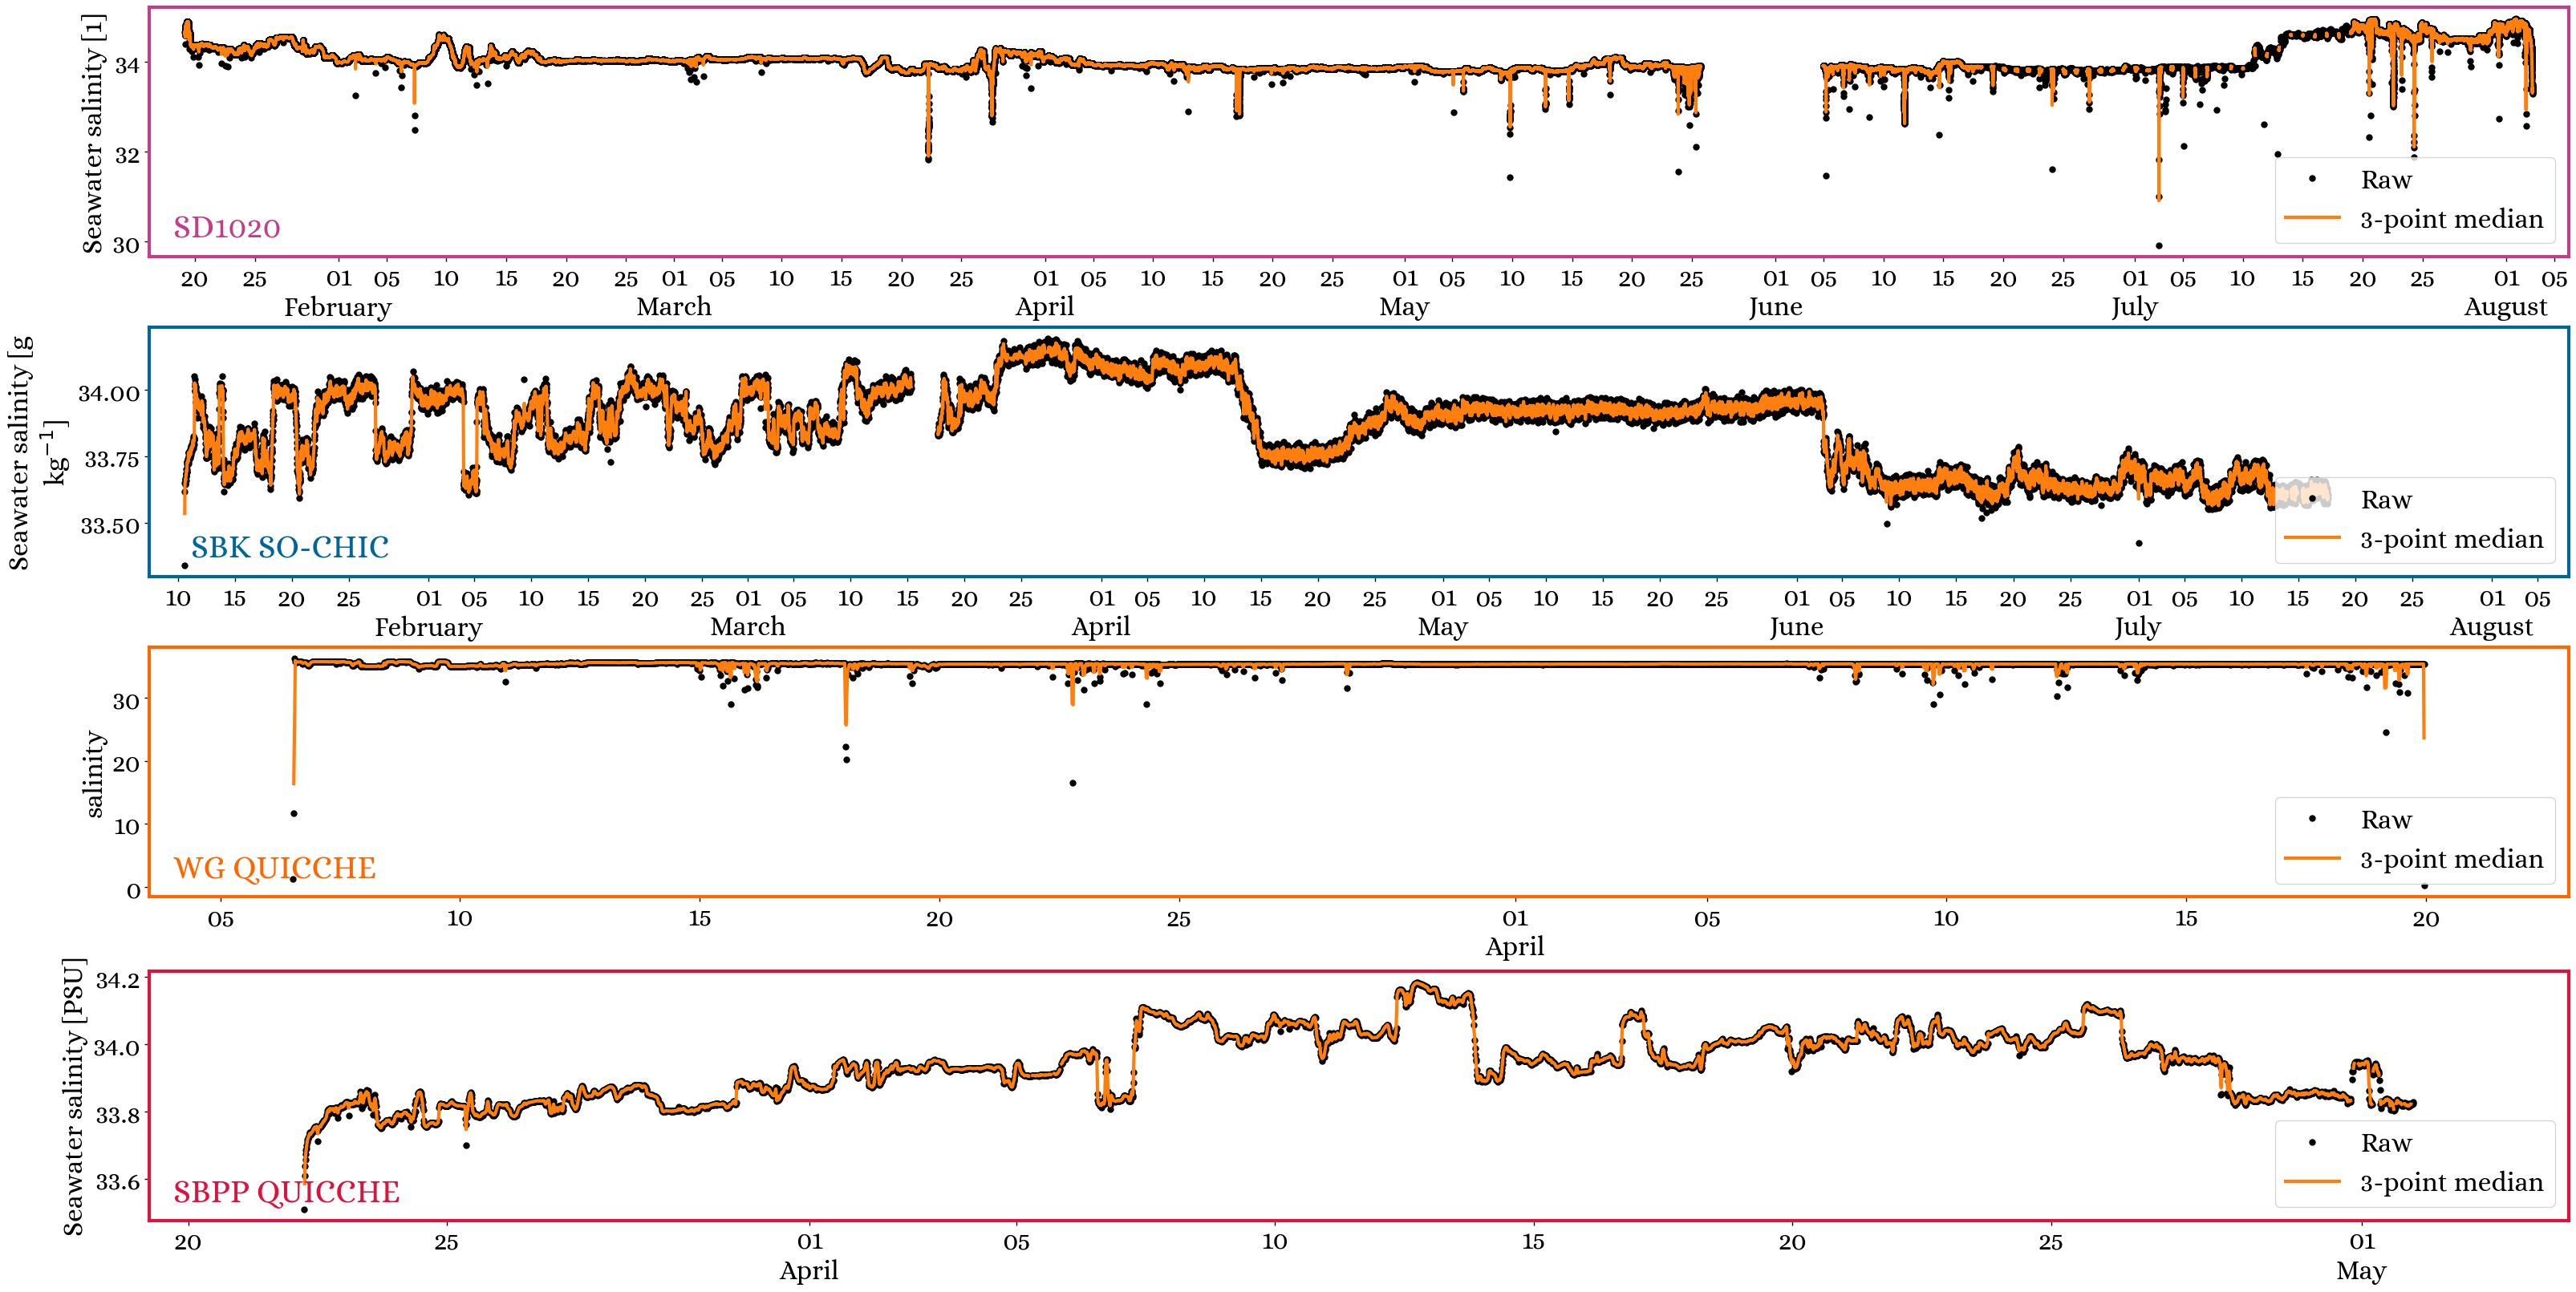

In [62]:
plot_salinity(rolling=True)

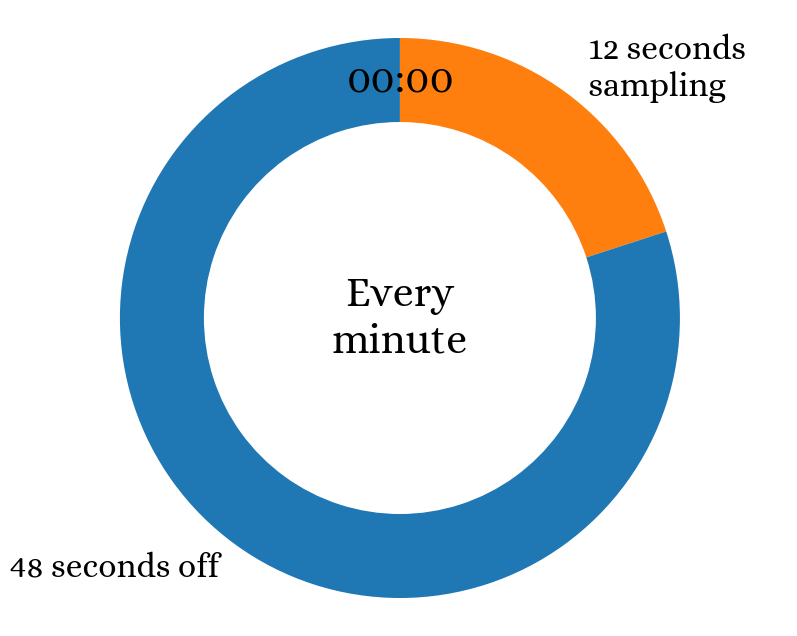

In [114]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,8))

# Define the data and labels for the pie chart
sizes = [12, 48]
labels = [' 12 seconds\n sampling', '48 seconds off']

# Plot the pie chart with a hole in the middle (donut chart)
wedges, texts = ax.pie(sizes, labels=labels, wedgeprops=dict(width=0.3, edgecolor="None"), startangle=90, counterclock=False)

wedges[0].set_facecolor("C1")
wedges[1].set_facecolor("C0")

# Add a circle at the center to make it look like a donut
ax.add_artist(plt.Circle((0, 0), 0.2, color='white', fc='white', linewidth=1.25))

# Add text inside the circle
ax.text(0, 0, 'Every\nminute', color='k', fontsize=30, ha='center', va='center')
ax.text(0.001, 1-0.15, '00:00', color='k', fontsize=30, ha='center', va='center')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the plot
plt.show()

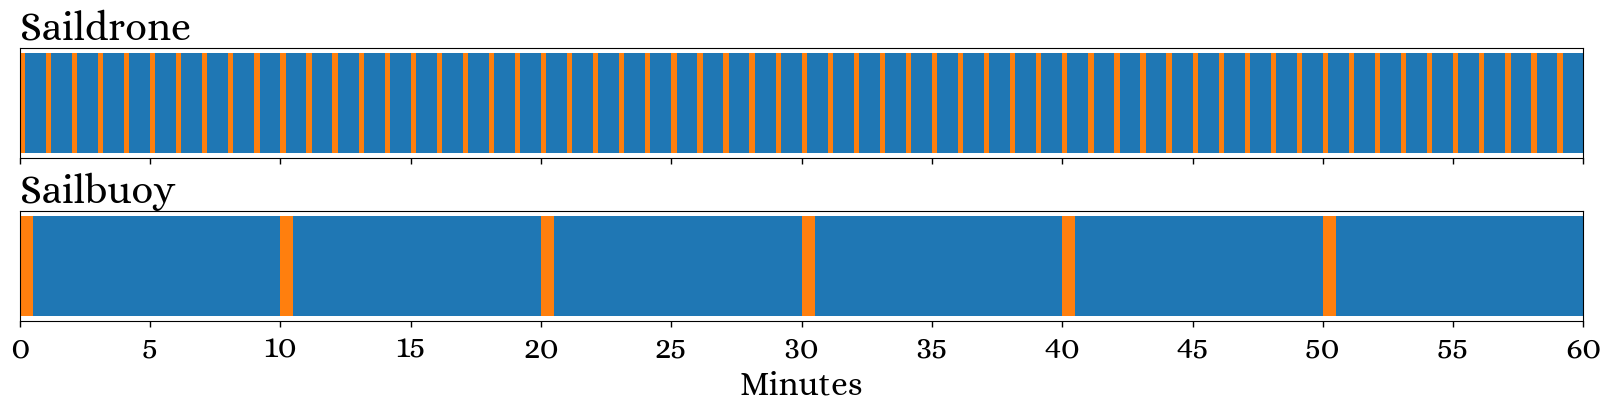

In [229]:
# Create a figure and axis
fig, ax = plt.subplots(2, 1, figsize=(16, 4), sharex=True, constrained_layout=True)

for axs, intervals, width, t in zip(ax, [60,6], [[12,48],[30,570]],["Saildrone","Sailbuoy"]):
    
    colors = ["C1", "C0"] * intervals
    width = np.insert(np.cumsum(width * intervals),0,0)
    
    for c,w1,w2 in zip(colors,width[:-1],width[1:]):
        axs.fill_between([w1, w2], 0, 1, color=c, alpha=1, linewidth=0)
    
    axs.set_title(t,loc='left')
    # Remove y-axis
    axs.set_yticks([])

# Set x-axis limits
axs.set_xlim(0, width[-1])
axs.set_xticks(np.arange(0, 60 * 60 + 1, 300), labels=np.arange(0, 60 + 1, 5).astype(str))
axs.set_xlabel("Minutes")

# Show the plot
plt.show()

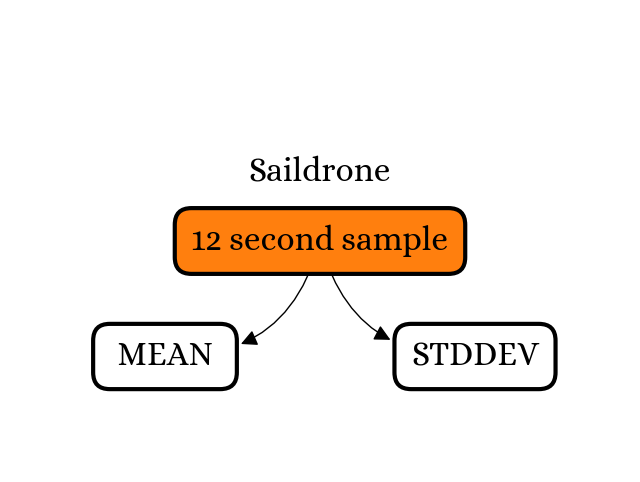

In [230]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bubble for "12 second sample"
ax.text(0.5,0.65,"Saildrone",ha='center', va='center')
ax.annotate("12 second sample", xy=(0.5, 0.5), xytext=(0.5, 0.5),
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.5', fc='C1', alpha=1, lw=3),zorder=3)

# Plot the bubbles for "MEAN" and "STDDEV"
for text, xy, cs in [(" MEAN ", (0.25, 0.25), "arc3,rad=0.4"), ("STDDEV", (0.75, 0.25),"arc3,rad=-0.4")]:
    ax.annotate(text, xy=(0.5, 0.5), xytext=xy,
                ha='center', va='center',
                arrowprops=dict(facecolor='k', arrowstyle="<|-", connectionstyle=cs),
                bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=1, lw=3), zorder=2)

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()


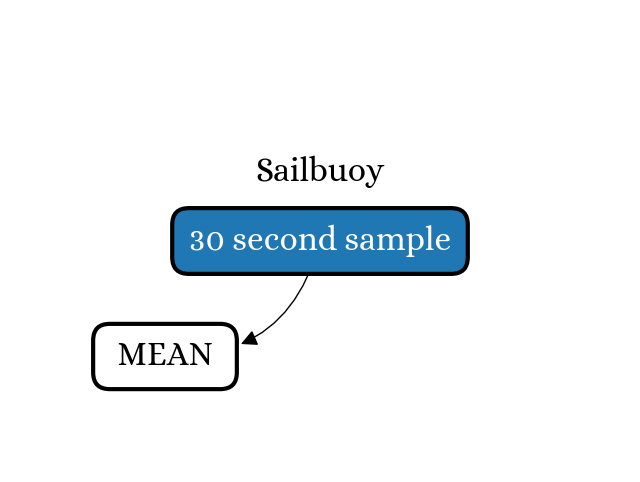

In [231]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bubble for "12 second sample"
ax.text(0.5,0.65,"Sailbuoy",ha='center', va='center')
ax.annotate("30 second sample", xy=(0.5, 0.5), xytext=(0.5, 0.5),c="w",
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.5', fc='C0', alpha=1, lw=3),zorder=3)

# Plot the bubbles for "MEAN" and "STDDEV"
for text, xy, cs in [(" MEAN ", (0.25, 0.25), "arc3,rad=0.4")]:
    ax.annotate(text, xy=(0.5, 0.5), xytext=xy,
                ha='center', va='center',
                arrowprops=dict(facecolor='k', arrowstyle="<|-", connectionstyle=cs),
                bbox=dict(boxstyle='round,pad=0.5', fc='w', alpha=1, lw=3), zorder=2)

# Hide the axes
ax.axis('off')

# Show the plot
plt.show()


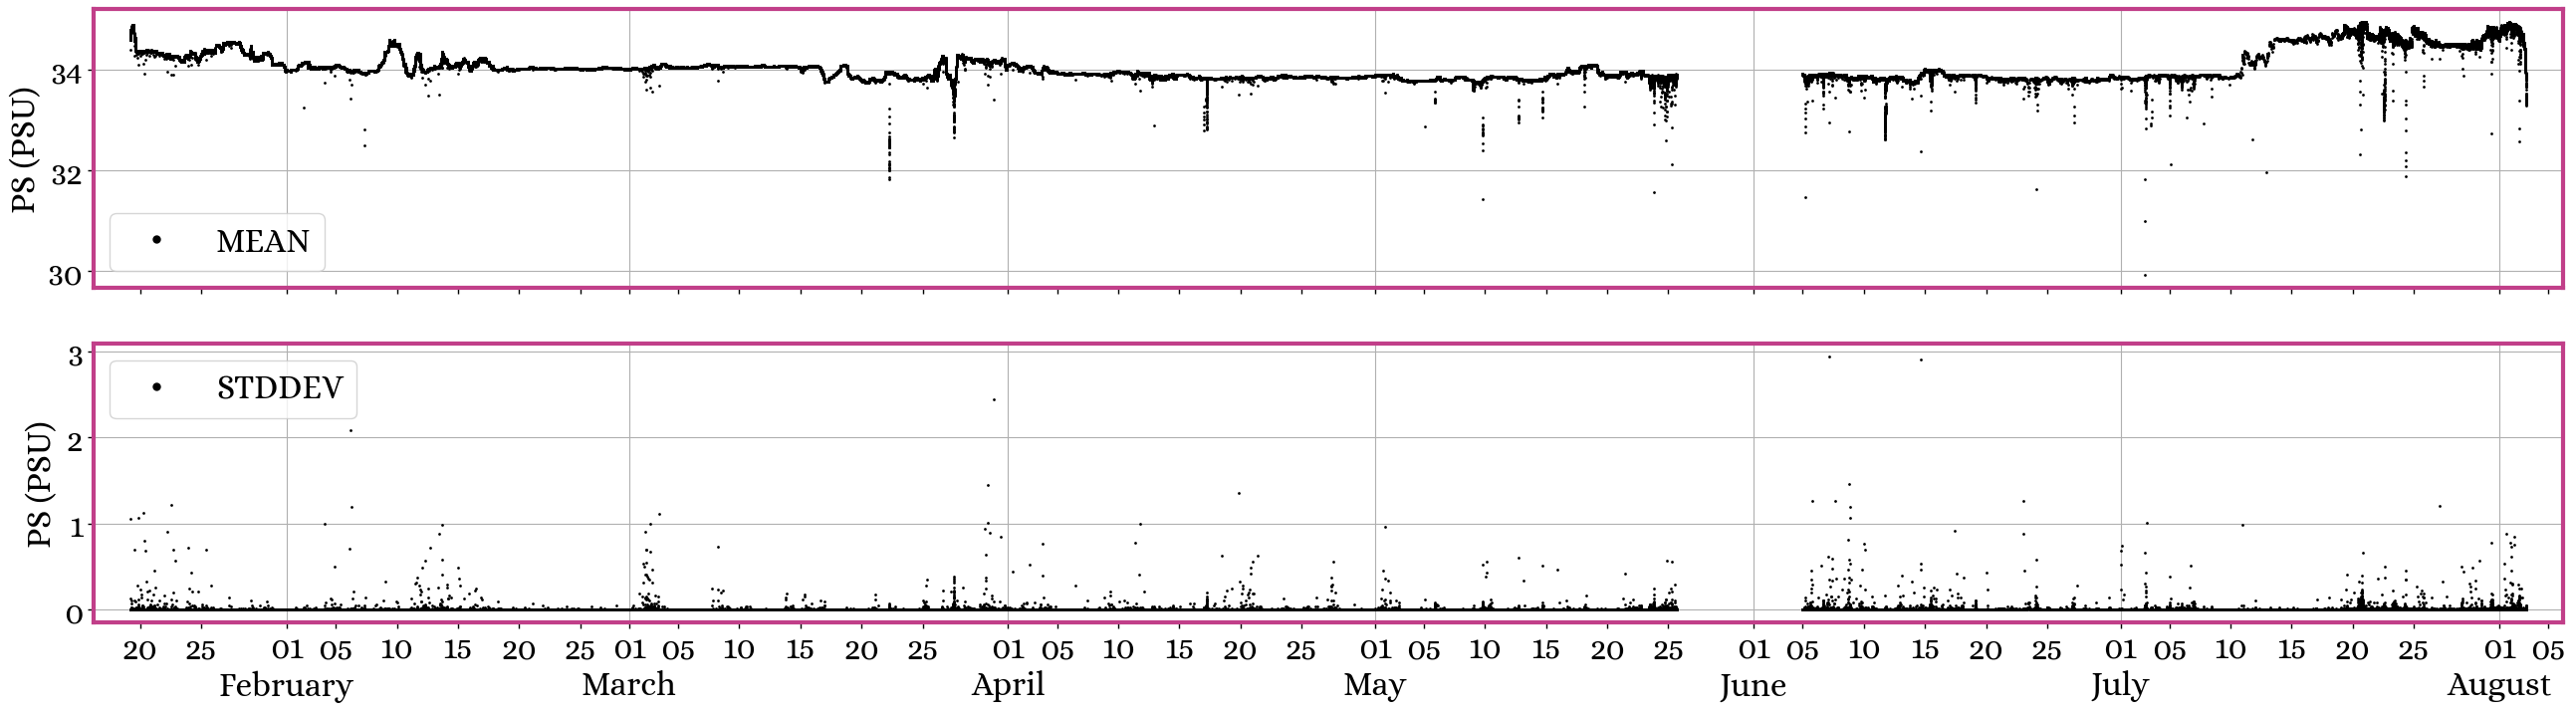

In [235]:
fig, ax = plt.subplots(2,1,figsize=(32,8),sharex=True)

interval = slice("2019-01-19","2019-08-15")

DS = ds20.sel(time=interval)

for axs,variable,l,t in zip(ax,["SAL_RBR_MEAN", "SAL_RBR_STDDEV"],["PS (PSU)","PS (PSU)"],["MEAN","STDDEV"]):

    axs.plot(DS.time,DS[variable],lw=3,label=t,c="k",zorder=2,marker='.',ms=2,ls="")
    axs.set(title="", xlabel="",ylabel=l)
    axs.legend(loc='lower left',markerscale=5)
    axs.grid()    
    fix_spines(axs,c=c20)

my_funcs.fix_xticks(ax,DS)
axs.legend(loc='upper left',markerscale=5)

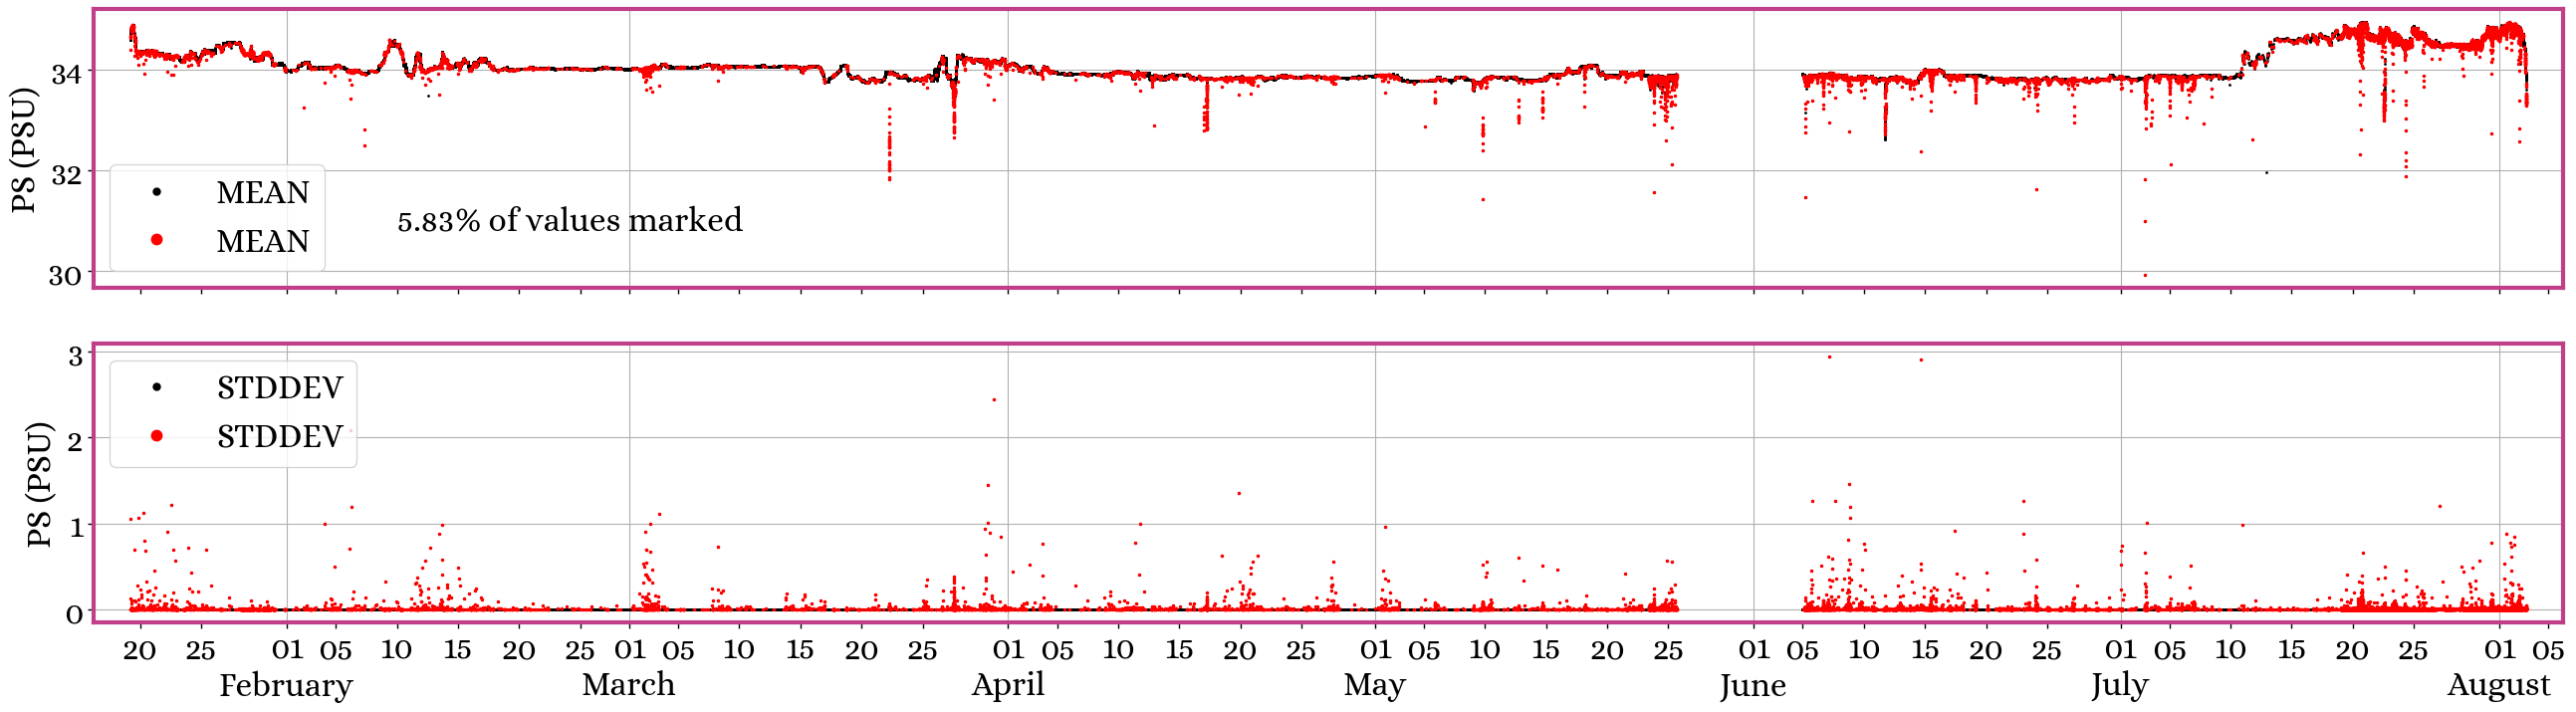

In [269]:
fig, ax = plt.subplots(2,1,figsize=(32,8),sharex=True)

for axs,variable,l,t in zip(ax,["SAL_RBR_MEAN", "SAL_RBR_STDDEV"],["PS (PSU)","PS (PSU)"],["MEAN","STDDEV"]):

    axs.plot(ds20.time,ds20[variable],lw=3,label=t,c="k",zorder=2,marker='.',ms=2,ls="")
    axs.plot(ds20.time,ds20[variable].where(ds20["SAL_RBR_STDDEV"]>=np.nanpercentile(ds20["SAL_RBR_STDDEV"],95)),lw=3,label=t,c="r",zorder=2,marker='.',ms=3,ls="")
    
    axs.set(title="", xlabel="",ylabel=l)
    axs.legend(loc='lower left',markerscale=5)
    axs.grid()    
    fix_spines(axs,c=c20)

ax[0].text(np.datetime64("2019-02-10"),
           31,
           f'{((ds20["SAL_RBR_STDDEV"]>=np.nanpercentile(ds20["SAL_RBR_STDDEV"],95)).sum().values/np.sum(np.isfinite(ds20["SAL_RBR_STDDEV"]).values)*100).round(2)}% of values marked',
           ha="left",
           va="center")

my_funcs.fix_xticks(ax,ds20)
axs.legend(loc='upper left',markerscale=5)

In [323]:
ds20["SALINITY_QC_MEAN"] = ds20["SAL_RBR_MEAN"].where(ds20["SAL_RBR_STDDEV"]<np.nanpercentile(ds20['SAL_RBR_STDDEV'].values,95))
ds20["SALINITY_QC_STDDEV"] = ds20["SAL_RBR_STDDEV"].where(ds20["SAL_RBR_STDDEV"]<np.nanpercentile(ds20['SAL_RBR_STDDEV'].values,95))

In [435]:
median = ds20["SALINITY_QC_MEAN"].rolling(time=5,center=True).median("time").values

In [438]:
ds20["BAD_SAL"] = ds20["SALINITY_QC_MEAN"].where(median-(ds20["SALINITY_QC_MEAN"].values) >= 0.01)

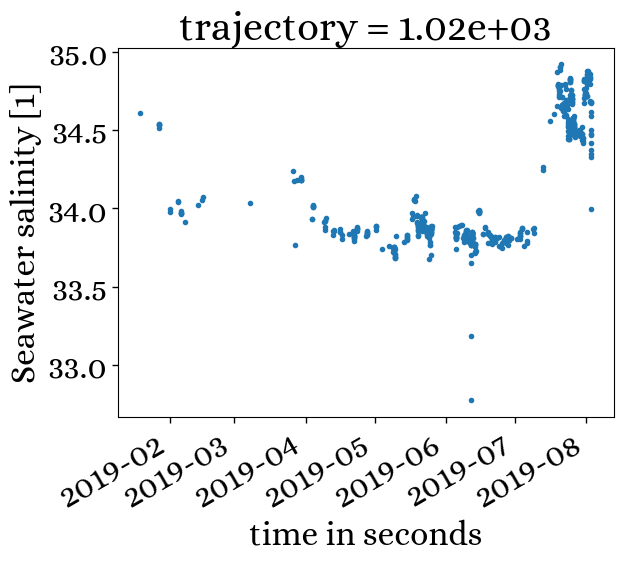

In [439]:
ds20["BAD_SAL"].plot(marker='.')

In [424]:
dS  = np.diff(ds20["SALINITY_QC_MEAN"]) 
lim = np.nanpercentile(np.abs(dS),95)
idx = np.where(dS < -lim)[0]

bad_sal  = ds20["SALINITY_QC_MEAN"].values[idx]
bad_time = ds20["time"].values[idx]

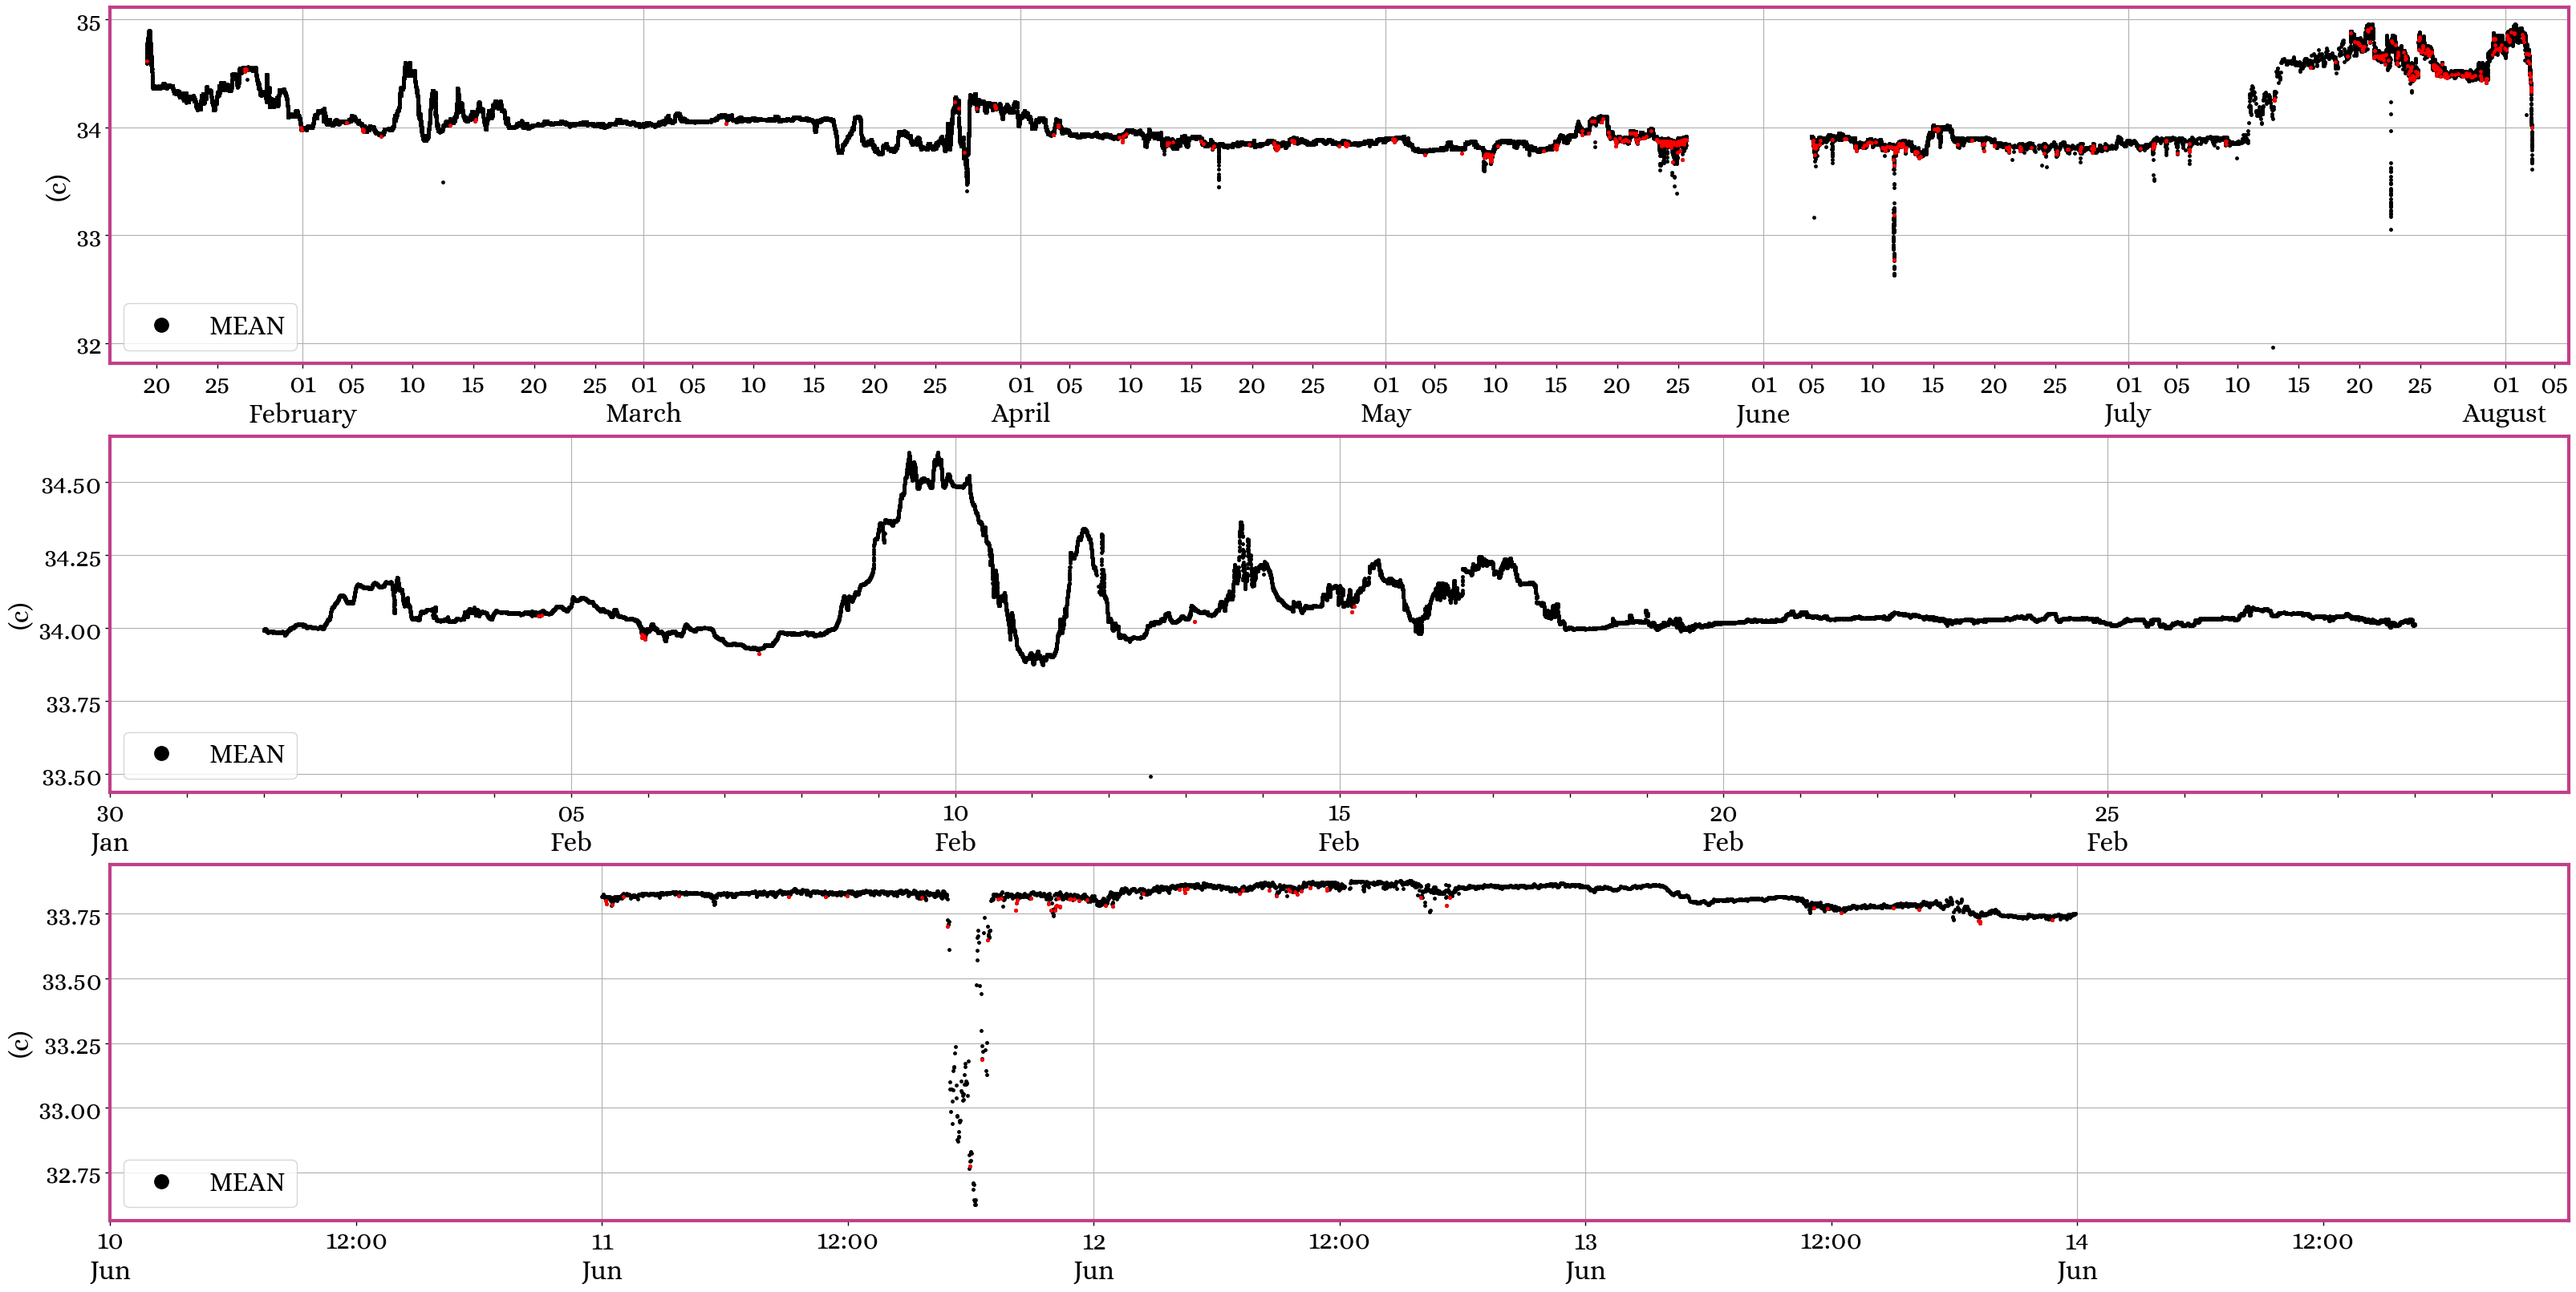

In [442]:
fig, ax = plt.subplots(3,1,figsize=(32,16), constrained_layout=True)

interval = [slice("2019-01-01","2019-10-15"),slice("2019-02-01","2019-02-28"),slice("2019-06-11","2019-06-13")]

for axs,i in zip(ax,interval):
    
    DS = ds20.sel(time=i)

    axs.plot(DS.time,DS["SALINITY_QC_MEAN"], lw=3, label=t, c="k", zorder=2, marker='.', ms=5, ls="")
    axs.plot(DS.time,DS["SALINITY_QC_MEAN"].rolling(time=5,center=True).median("time"), lw=3, label=t, c="k", zorder=2, marker='.', ms=5, ls="")
    axs.plot(DS.time,DS["BAD_SAL"], lw=0, zorder=2, marker='.', ms=5, mfc="r", mec="r")
    axs.set(title="", xlabel="", ylabel=l)
    axs.legend(loc='lower left',markerscale=5)
    axs.grid()    
    fix_spines(axs,c=c20)

    my_funcs.fix_xticks([axs],DS)

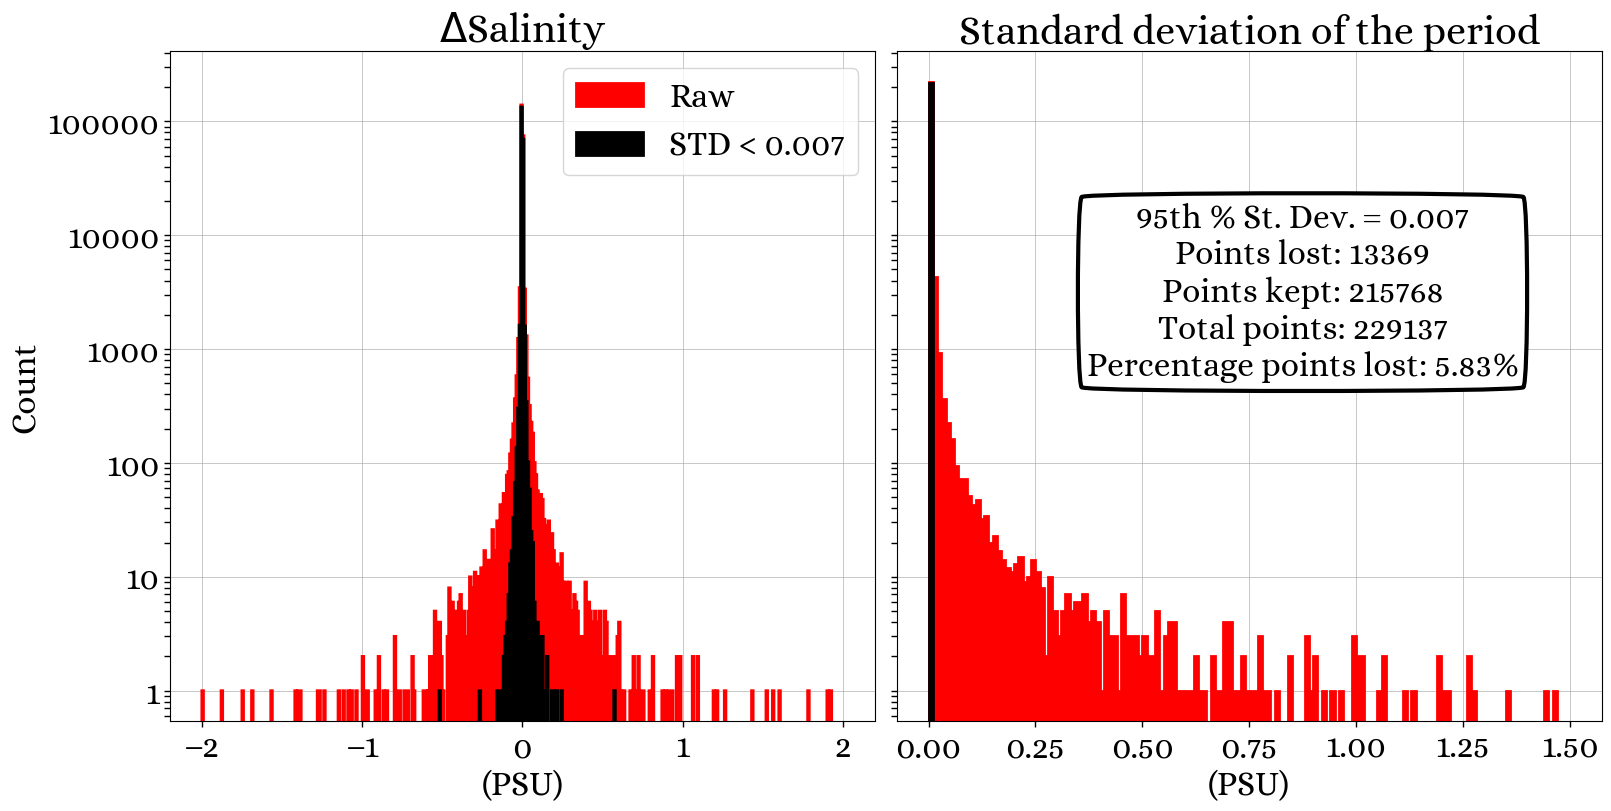

In [324]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Create subplots with constrained layout and shared y-axis
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(16, 8), sharey=True)

# Data and labels for plotting
data = [(np.diff(ds20["SAL_RBR_MEAN"]), np.diff(ds20["SALINITY_QC_MEAN"])),
        (ds20["SAL_RBR_STDDEV"], ds20["SALINITY_QC_STDDEV"])]
colors = ['k', 'r']
labels = [['Raw', f'STD < {np.nanpercentile(ds20["SAL_RBR_STDDEV"].values, 95):.3f}'], ['Raw St.Dev', 'QC St.Dev']]
bins = [np.arange(-2, 2.01, 0.01), np.arange(0, 1.51, 0.01)]
titles = [r'$\Delta$Salinity', 'Standard deviation of the period']
xlabels = ['(PSU)', '(PSU)']
ylabels = ['Count', '']

# Loop through subplots and data, plotting histograms
for i, (axi, (d1, d2), color, label, b, title, xlabel, ylabel) in enumerate(zip(ax, data, colors, labels, bins, titles, xlabels, ylabels)):
    h1 = axi.hist(d1, bins=b, zorder=2, histtype="stepfilled", lw=2, ec="r", fc="r", label=label[0])
    h2 = axi.hist(d2, bins=b, zorder=2, histtype="stepfilled", lw=2, ec="k", fc="k", label=label[1])
    
    axi.set(title=title, xlabel=xlabel, ylabel=ylabel, yscale="log")
    axi.grid(True, linestyle='-', linewidth=0.5)

    # Add legend to the first subplot
    if i == 0:
        axi.legend()

# Calculate additional statistics
#lost_points = np.sum(np.isnan(ds20['SAL_RBR_STDDEV']))
kept_points = np.sum(ds20['SAL_RBR_STDDEV'] < np.nanpercentile(ds20["SAL_RBR_STDDEV"], 95)).values
total_points = np.sum(np.isfinite(ds20['SAL_RBR_STDDEV']).values)
lost_points = total_points - kept_points
percentage_lost = (lost_points / total_points) * 100

ax[1].text(0.875, np.sqrt(10) * 1e3,
           f"95th % St. Dev. = {np.nanpercentile(ds20['SAL_RBR_STDDEV'].values, 95):.3f}\n"
           f"Points lost: {lost_points}\n"
           f"Points kept: {kept_points}\n"
           f"Total points: {total_points}\n"
           f"Percentage points lost: {percentage_lost:.2f}%",
           ha="center", va="center", bbox=dict(facecolor='w', alpha=1, ec='k', lw=3, boxstyle="round4"))



# Set y-scale to logarithmic for the first subplot and format y-axis ticks
ax[0].yaxis.set_major_formatter(ScalarFormatter())

plt.show()

In [325]:
temp_test = np.arange(-1,18,1)
sal_acc = np.array([gsw.SP_from_C(0.003,i,0) for i in temp_test])

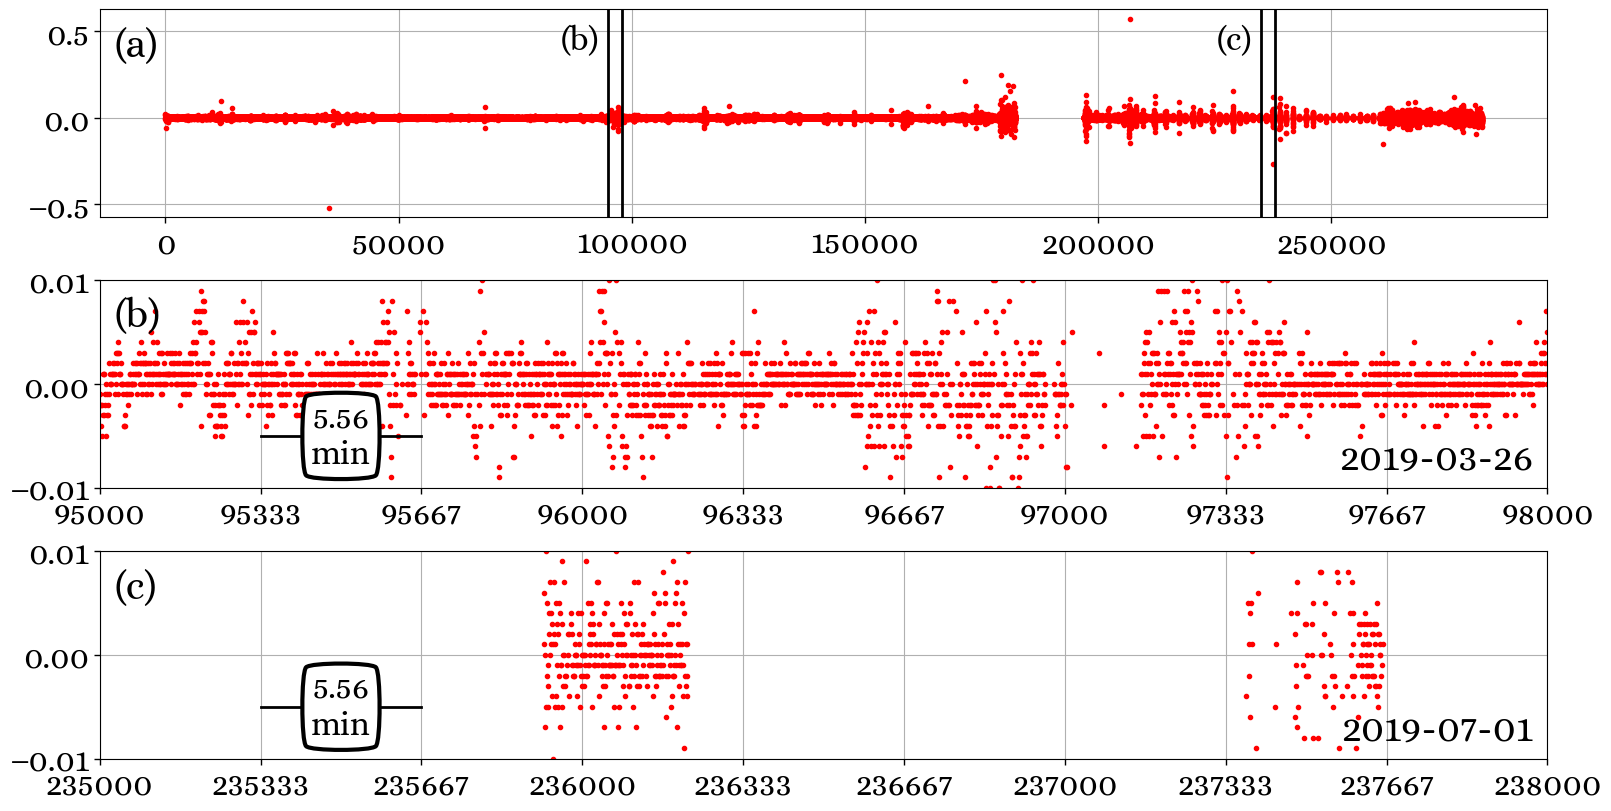

In [385]:
fig, ax = plt.subplots(3, 1, constrained_layout=True, figsize=(16, 8))

for i,(axs,xlim,ylim,l) in enumerate(zip(ax,[[0,280000],[95000,98000],[235000,238000]],[[-0.5,0.5],[-0.01,0.01],[-0.01,0.01]],["(a)","(b)","(c)"])):
    
    axs.plot(np.diff(ds20["SALINITY_QC_MEAN"]),c="r",lw=0,marker='.')
    axs.grid()
    if i > 0:
        ax[0].axvline(xlim[0],c='k',lw=2)
        ax[0].axvline(xlim[1],c='k',lw=2)
    
        ax[0].text(xlim[0]-2000,0.45,l,c='k',ha="right",va="center")
        xticks=np.linspace(xlim[0],xlim[1],10)
        axs.set(xticks=xticks,xlim=xlim,ylim=ylim)
        axs.text(xticks[1]+(xticks[1]-xticks[0])/2,-0.005,f"{((xticks[1]-xticks[0])/60).round(2)}\nmin",c='k',ha="center",va="center",bbox=dict(facecolor='w', alpha=1, ec='k', lw=3, boxstyle="round4"))
        axs.plot((xticks[1],xticks[2]),[-0.005,-0.005],lw=2,c='k')
        axs.set_title(ds20["time"][xlim][0].values.astype("datetime64[D]"),loc='right',y=0.01, x=0.99,va="bottom")

    axs.set_title(l,loc='left',y=0.7, x=0.01,va="bottom")
    #ax.plot(temp_test,sal_acc,lw=3,c='k', label="Accuracy")
#ax.scatter(ds20["TEMP_CTD_RBR_MEAN"][:-1],np.abs(np.diff(ds20["SALINITY_QC_MEAN"])),c='r')
#ax.set_yscale("log")
plt.show()

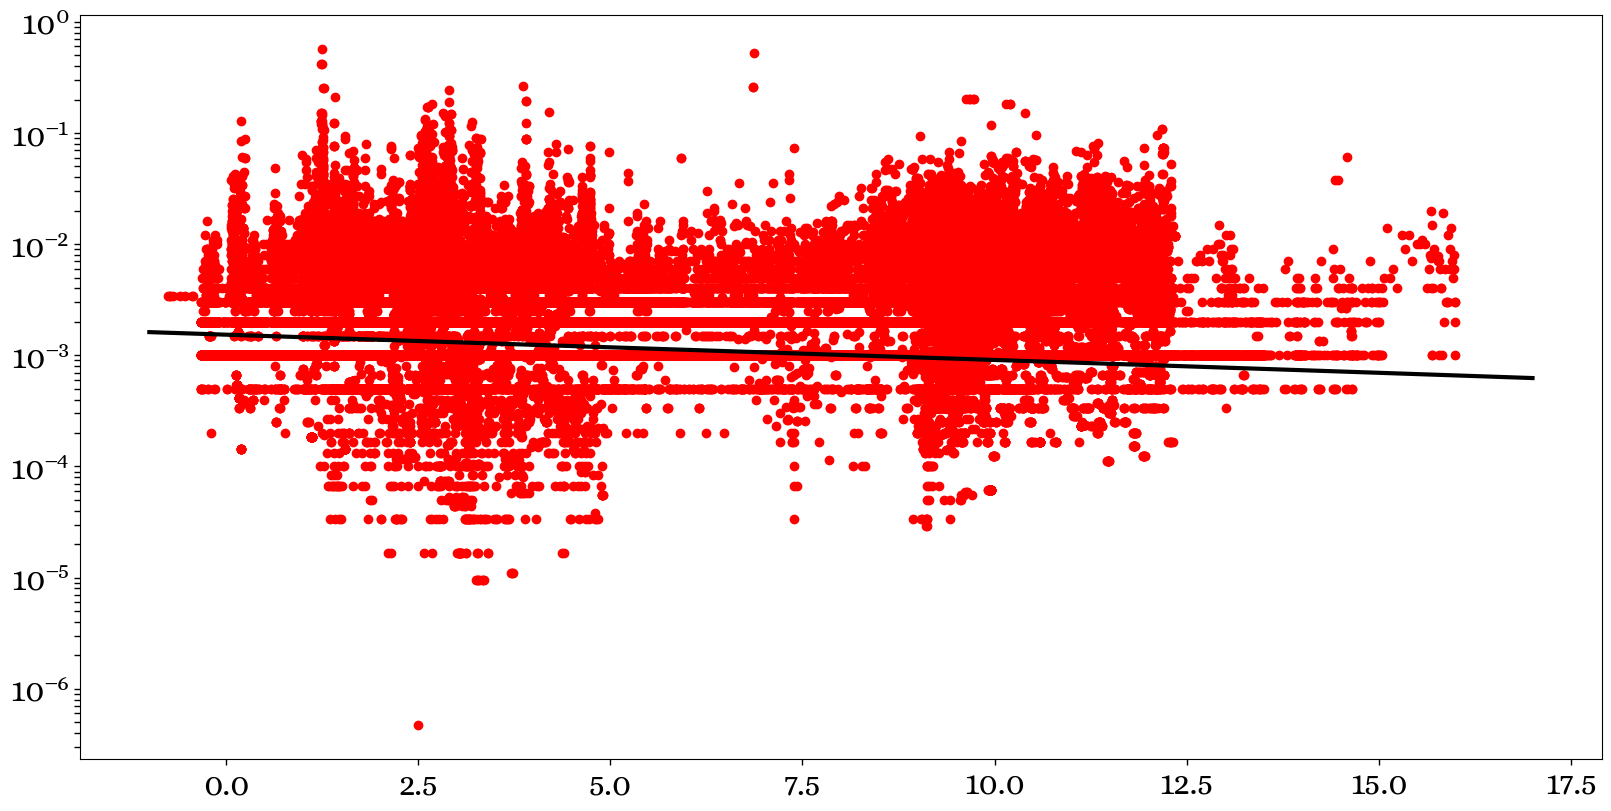

In [301]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(16, 8))

ax.plot(temp_test,sal_acc,lw=3,c='k', label="Accuracy")
ax.scatter(ds20["TEMP_CTD_RBR_MEAN"][:-1],np.abs(np.diff(ds20["SALINITY_QC_MEAN"])),c='r')
ax.set_yscale("log")

In [282]:
ds20

<xarray.Dataset>
Dimensions:                         (time: 282271)
Coordinates:
    latitude                        (time) float64 ...
    longitude                       (time) float64 ...
  * time                            (time) datetime64[ns] 2019-01-19T04:00:00...
    trajectory                      float32 1.02e+03
Data variables: (12/51)
    SOG                             (time) float64 ...
    COG                             (time) float64 ...
    HDG                             (time) float64 ...
    HDG_WING                        (time) float64 ...
    WING_ANGLE                      (time) float64 ...
    UWND_MEAN                       (time) float64 ...
    ...                              ...
    TEMP_O2_RBR_MEAN                (time) float64 ...
    TEMP_O2_RBR_STDDEV              (time) float64 ...
    CHLOR_RBR_MEAN                  (time) float64 ...
    CHLOR_RBR_STDDEV                (time) float64 ...
    SALINITY_QC_MEAN                (time) float64 34.66 34.68 34.67 ... nan nan
    SALINITY_QC_STDDEV              (time) float64 0.003 0.002 0.003 ... nan nan
Attributes: (12/38)
    title:                     Antarctica Circumnavigation Surface Data
    summary:                   This data set was collected from the first Sai...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    ...                        ...
    geospatial_lat_min:        -60.9862208
    geospatial_lat_max:        -46.4277568
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        -179.9986816
    geospatial_lon_max:        179.9997312
    geospatial_lon_units:      degrees_east

In [281]:
np.nanpercentile(np.diff(ds20["SALINITY_QC_MEAN"]),95)

0.0035999999999987153

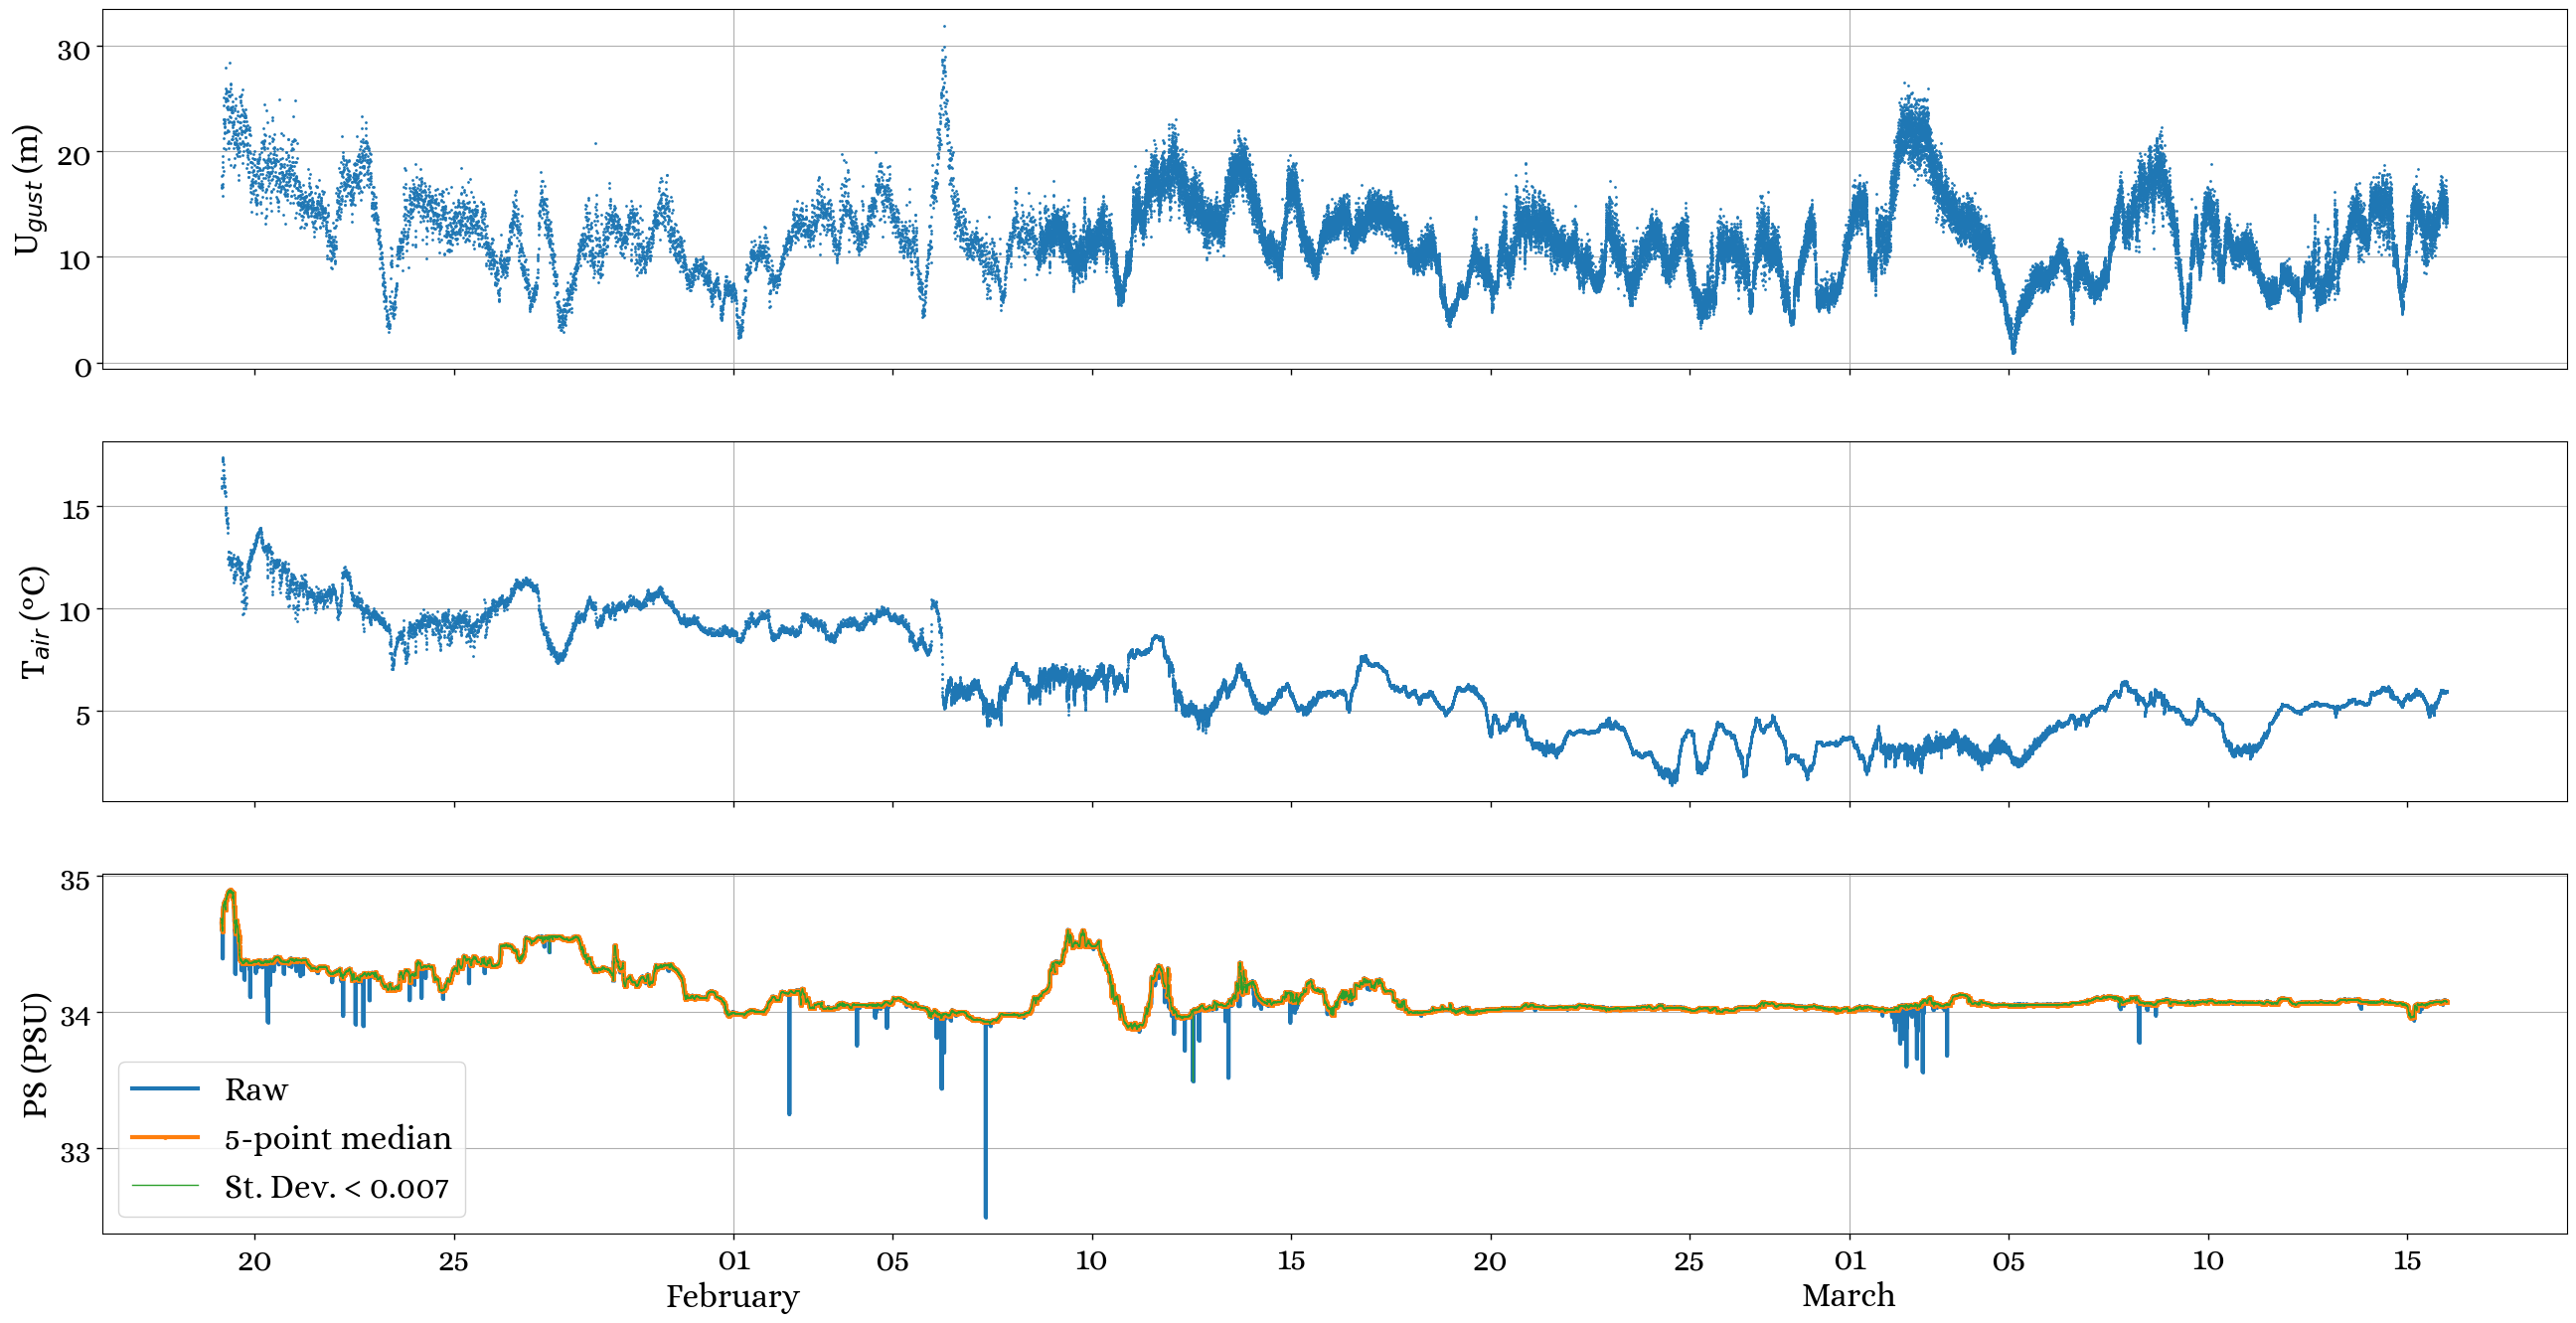

In [38]:
fig, ax = plt.subplots(3,1,figsize=(32,16),sharex=True)

interval = slice("2019-01-19","2019-03-15")

DS = ds20.sel(time=interval)

for axs,variable,l in zip(ax,["GUST_WND","TEMP_AIR","SAL_RBR"],["U$_{gust}$ (m)", "T$_{air}$ (°C)","PS (PSU)"]):
    
    ds_mean = DS[variable + "_MEAN"]
    ds_std  = DS[variable + "_STDDEV"]
    ds_time = DS["time"]
    
    axs.plot(ds_time,ds_mean,lw=3,label="Raw",c="C0",zorder=2,marker='.',ms=2,ls="-" if "SAL" in variable else "")
    
    #axs.fill_between(ds_time,ds_mean + ds_std,ds_mean - ds_std,fc='C0',alpha=0.25)
    
    if "SAL" in variable:
        axs.plot(ds_time,ds_mean.rolling(time=5,center=True).median("time"),
                 lw=3,label="5-point median",c="C1",zorder=2,marker='.',ms=5,ls="-")
        
        axs.plot(ds_time,ds_mean.where(ds_std<0.007),
                 lw=1,label="St. Dev. < 0.007",c="C2",zorder=2,marker='.',ms=0,ls="-")

    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

my_funcs.fix_xticks(ax,DS)
axs.legend(loc='lower left')

In [ ]:
DS

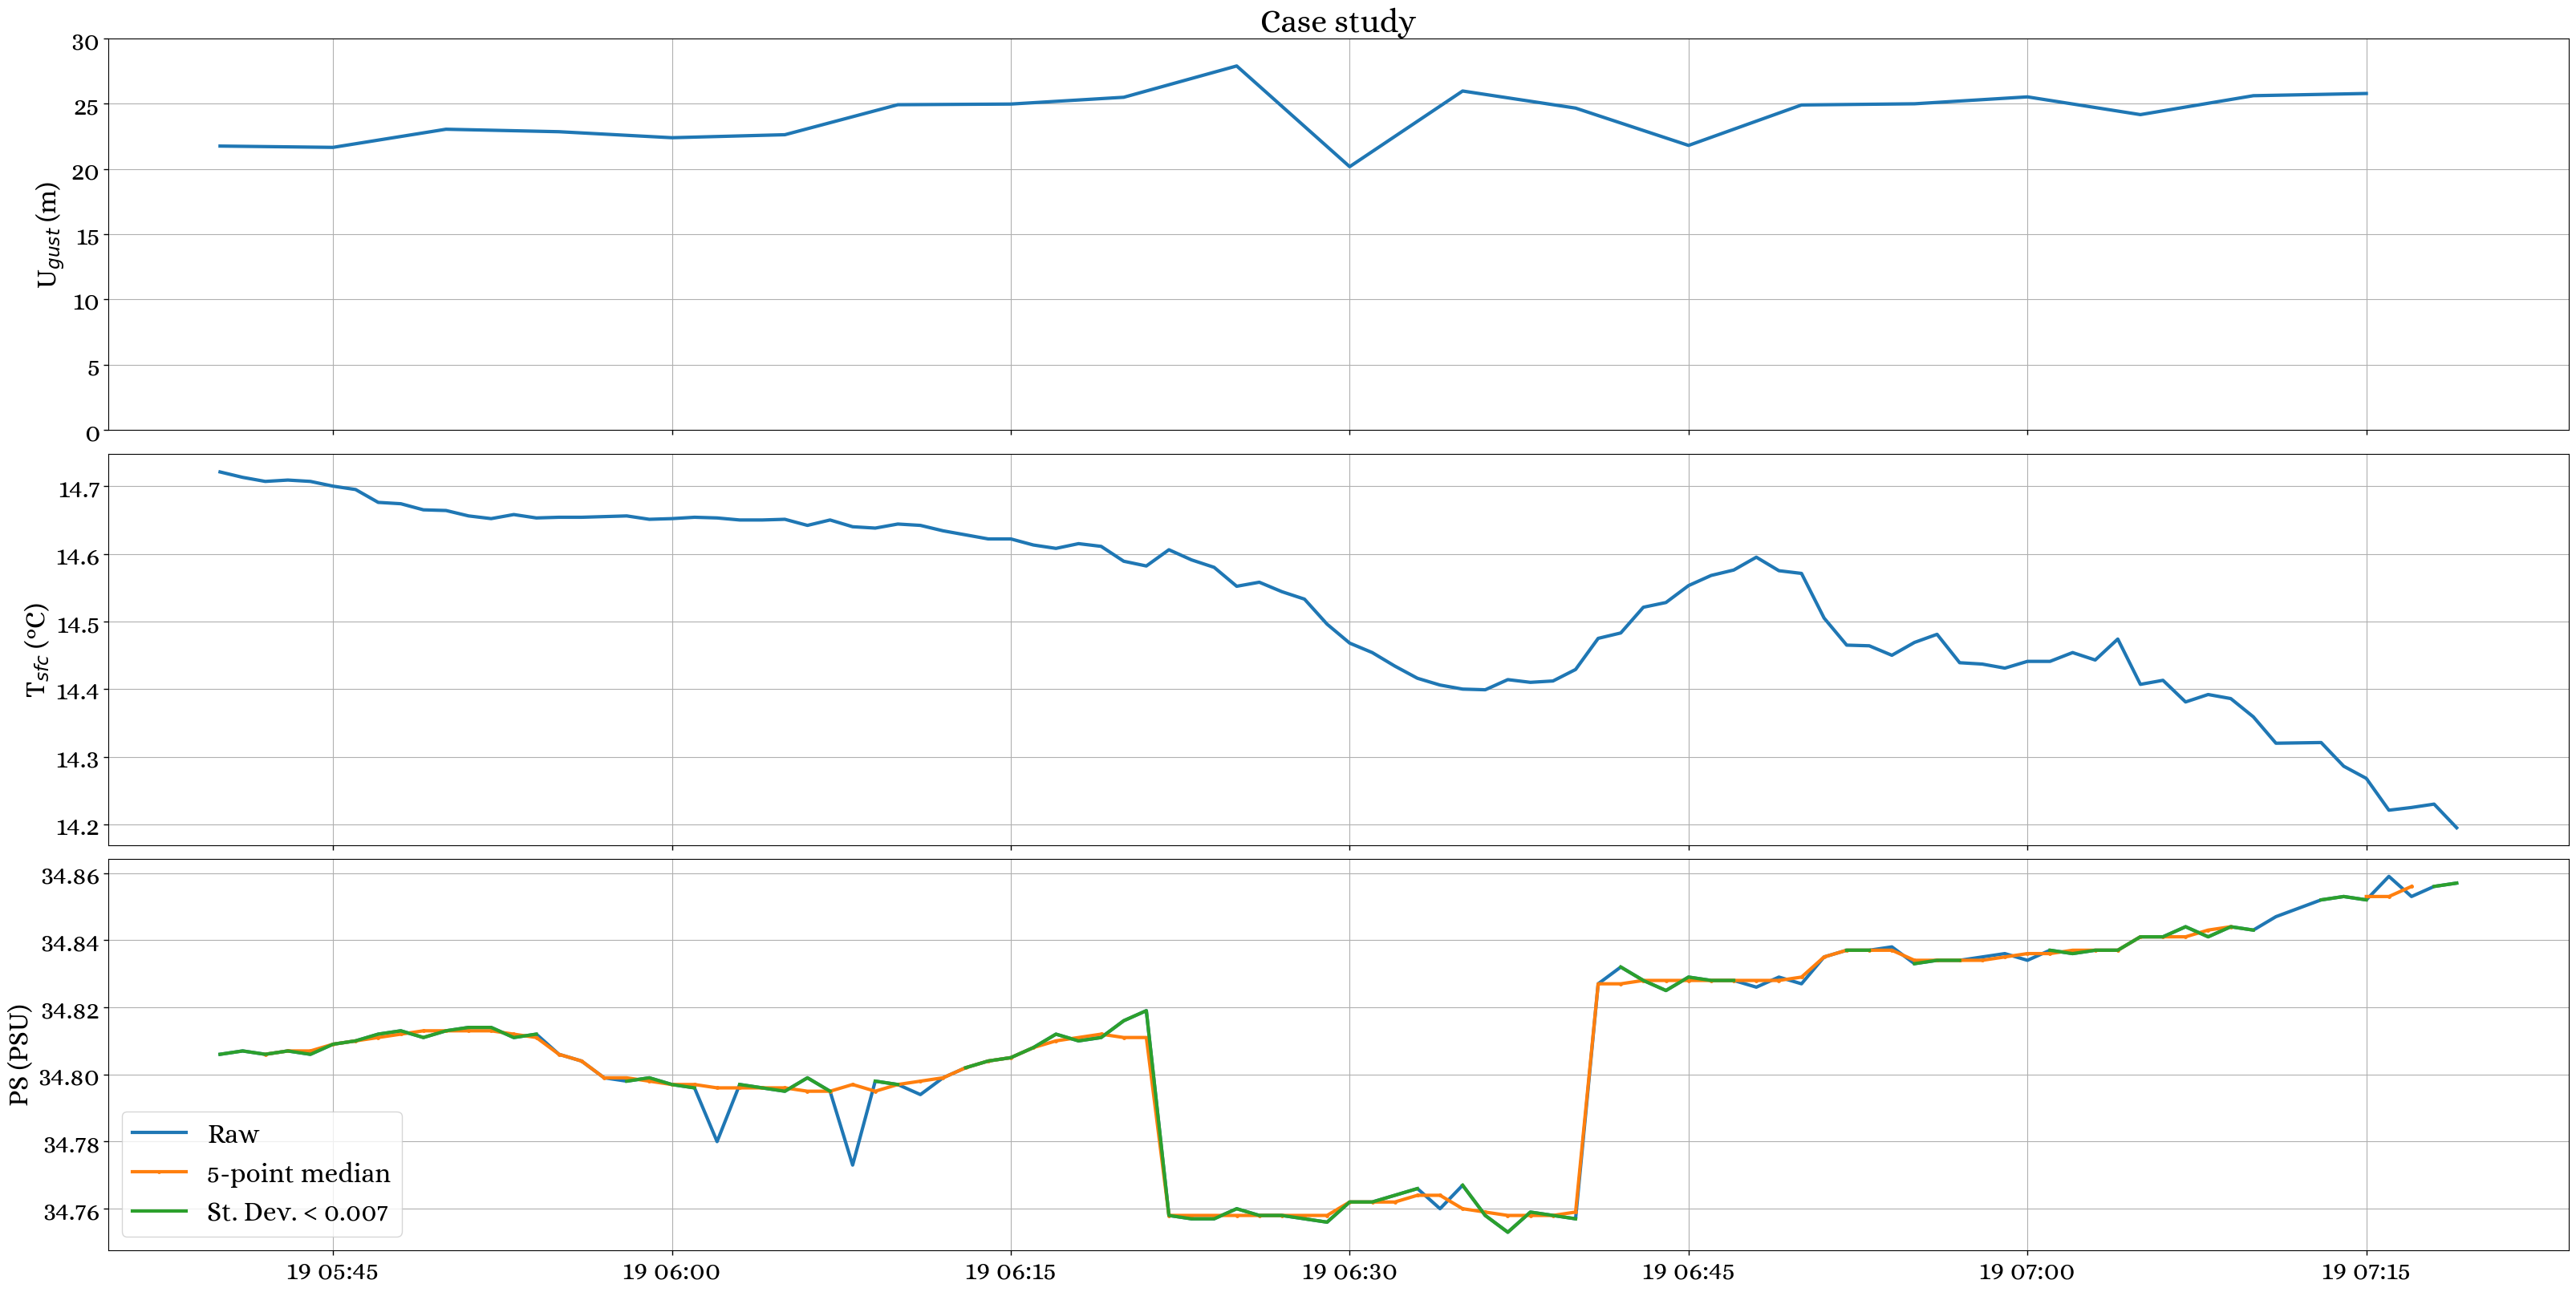

In [79]:
fig, ax = plt.subplots(3,1,figsize=(32,16),sharex=True, constrained_layout=True)

interval = slice("2019-01-19","2019-03-15")

DS = ds20#.sel(time=interval)

for axs,variable,l in zip(ax,["GUST_WND","TEMP_CTD_RBR","SAL_RBR"],["U$_{gust}$ (m)", "T$_{sfc}$ (°C)","PS (PSU)"]):
    
    ds_mean = DS[variable + "_MEAN"][100:100+100]
    msk = np.isfinite(ds_mean)
    ds_std  = DS[variable + "_STDDEV"][100:100+100]
    ds_time = DS["time"][100:100+100]
    
    axs.plot(ds_time[msk],ds_mean[msk],lw=3,label="Raw",c="C0",zorder=2,marker='',ms=20,ls="-" if "SAL" in variable else "-")
    
    #axs.fill_between(ds_time,ds_mean + ds_std,ds_mean - ds_std,fc='C0',alpha=0.25)
    
    if "SAL" in variable:
        axs.plot(ds_time,ds_mean.rolling(time=5,center=True).median("time"),
                 lw=3,label="5-point median",c="C1",zorder=2,marker='.',ms=5,ls="-")
        
        axs.plot(ds_time,ds_mean.where(ds_std<0.007),
                 lw=3,label="St. Dev. < 0.007",c="C2",zorder=2,marker='.',ms=0,ls="-")

    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

#my_funcs.fix_xticks(ax,DS["time"][100:100+100])a
ax[0].set(title="Case study",ylim=(0,30))
axs.legend(loc='lower left')

In [81]:
# Enable autoreload extension to automatically reload modules
%load_ext autoreload
%autoreload 1

# Import necessary modules and libraries
from AirSeaFluxCode import AirSeaFluxCode  # Import AirSeaFluxCode class from AirSeaFluxCode module
import xarray as xr  # Import xarray library with alias xr
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting
import numpy as np  # Import numpy library with alias np for numerical operations
from tqdm.notebook import tqdm_notebook as tqdm

import sys
sys.path.append("/Users/xedhjo/Documents/Projects/saildrone_fronts_paper/notebooks/")

# Import my_funcs module for interactive reloading
%aimport my_funcs

# Call update_params function from my_funcs module to update parameters
my_funcs.update_params(fontsize=24)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
ds = xr.open_dataset('/Users/xedhjo/Documents/Projects/QUICCHE/data/sailbuoy/PimPim/full/legato.nc')

In [89]:
# Select only the time when PimPim is in the water
ds = ds.sel(time=slice('2023-03-22T06:00:00','2023-05-23T05:00'))

In [90]:
ds

<xarray.Dataset>
Dimensions:                (time: 5344620)
Coordinates:
  * time                   (time) datetime64[ns] 2023-03-22T06:00:00 ... 2023...
Data variables:
    conductivity           (time) float64 ...
    temperature            (time) float64 ...
    pressure               (time) float64 ...
    sea pressure           (time) float64 ...
    depth                  (time) float64 ...
    salinity               (time) float64 ...
    measurement count      (time) int64 ...
    temperature.1          (time) float64 ...
    specific conductivity  (time) float64 ...
    speed of sound         (time) float64 ...
    density anomaly        (time) float64 ...

In [91]:
means = ds.resample(time="30s").mean("time")
stds  = ds.resample(time="30s").std("time")


KeyboardInterrupt



In [ ]:
sbmeans = means.sel(time=np.arange(means.time.values[0],means.time.values[-1],np.timedelta64(10,'m')))
sbstds = stds.sel(time=np.arange(stds.time.values[0],stds.time.values[-1],np.timedelta64(10,'m')))

In [112]:
np.nanpercentile(stds["salinity"],95)

0.02380567115529187

NameError: name 'sbmeans' is not defined

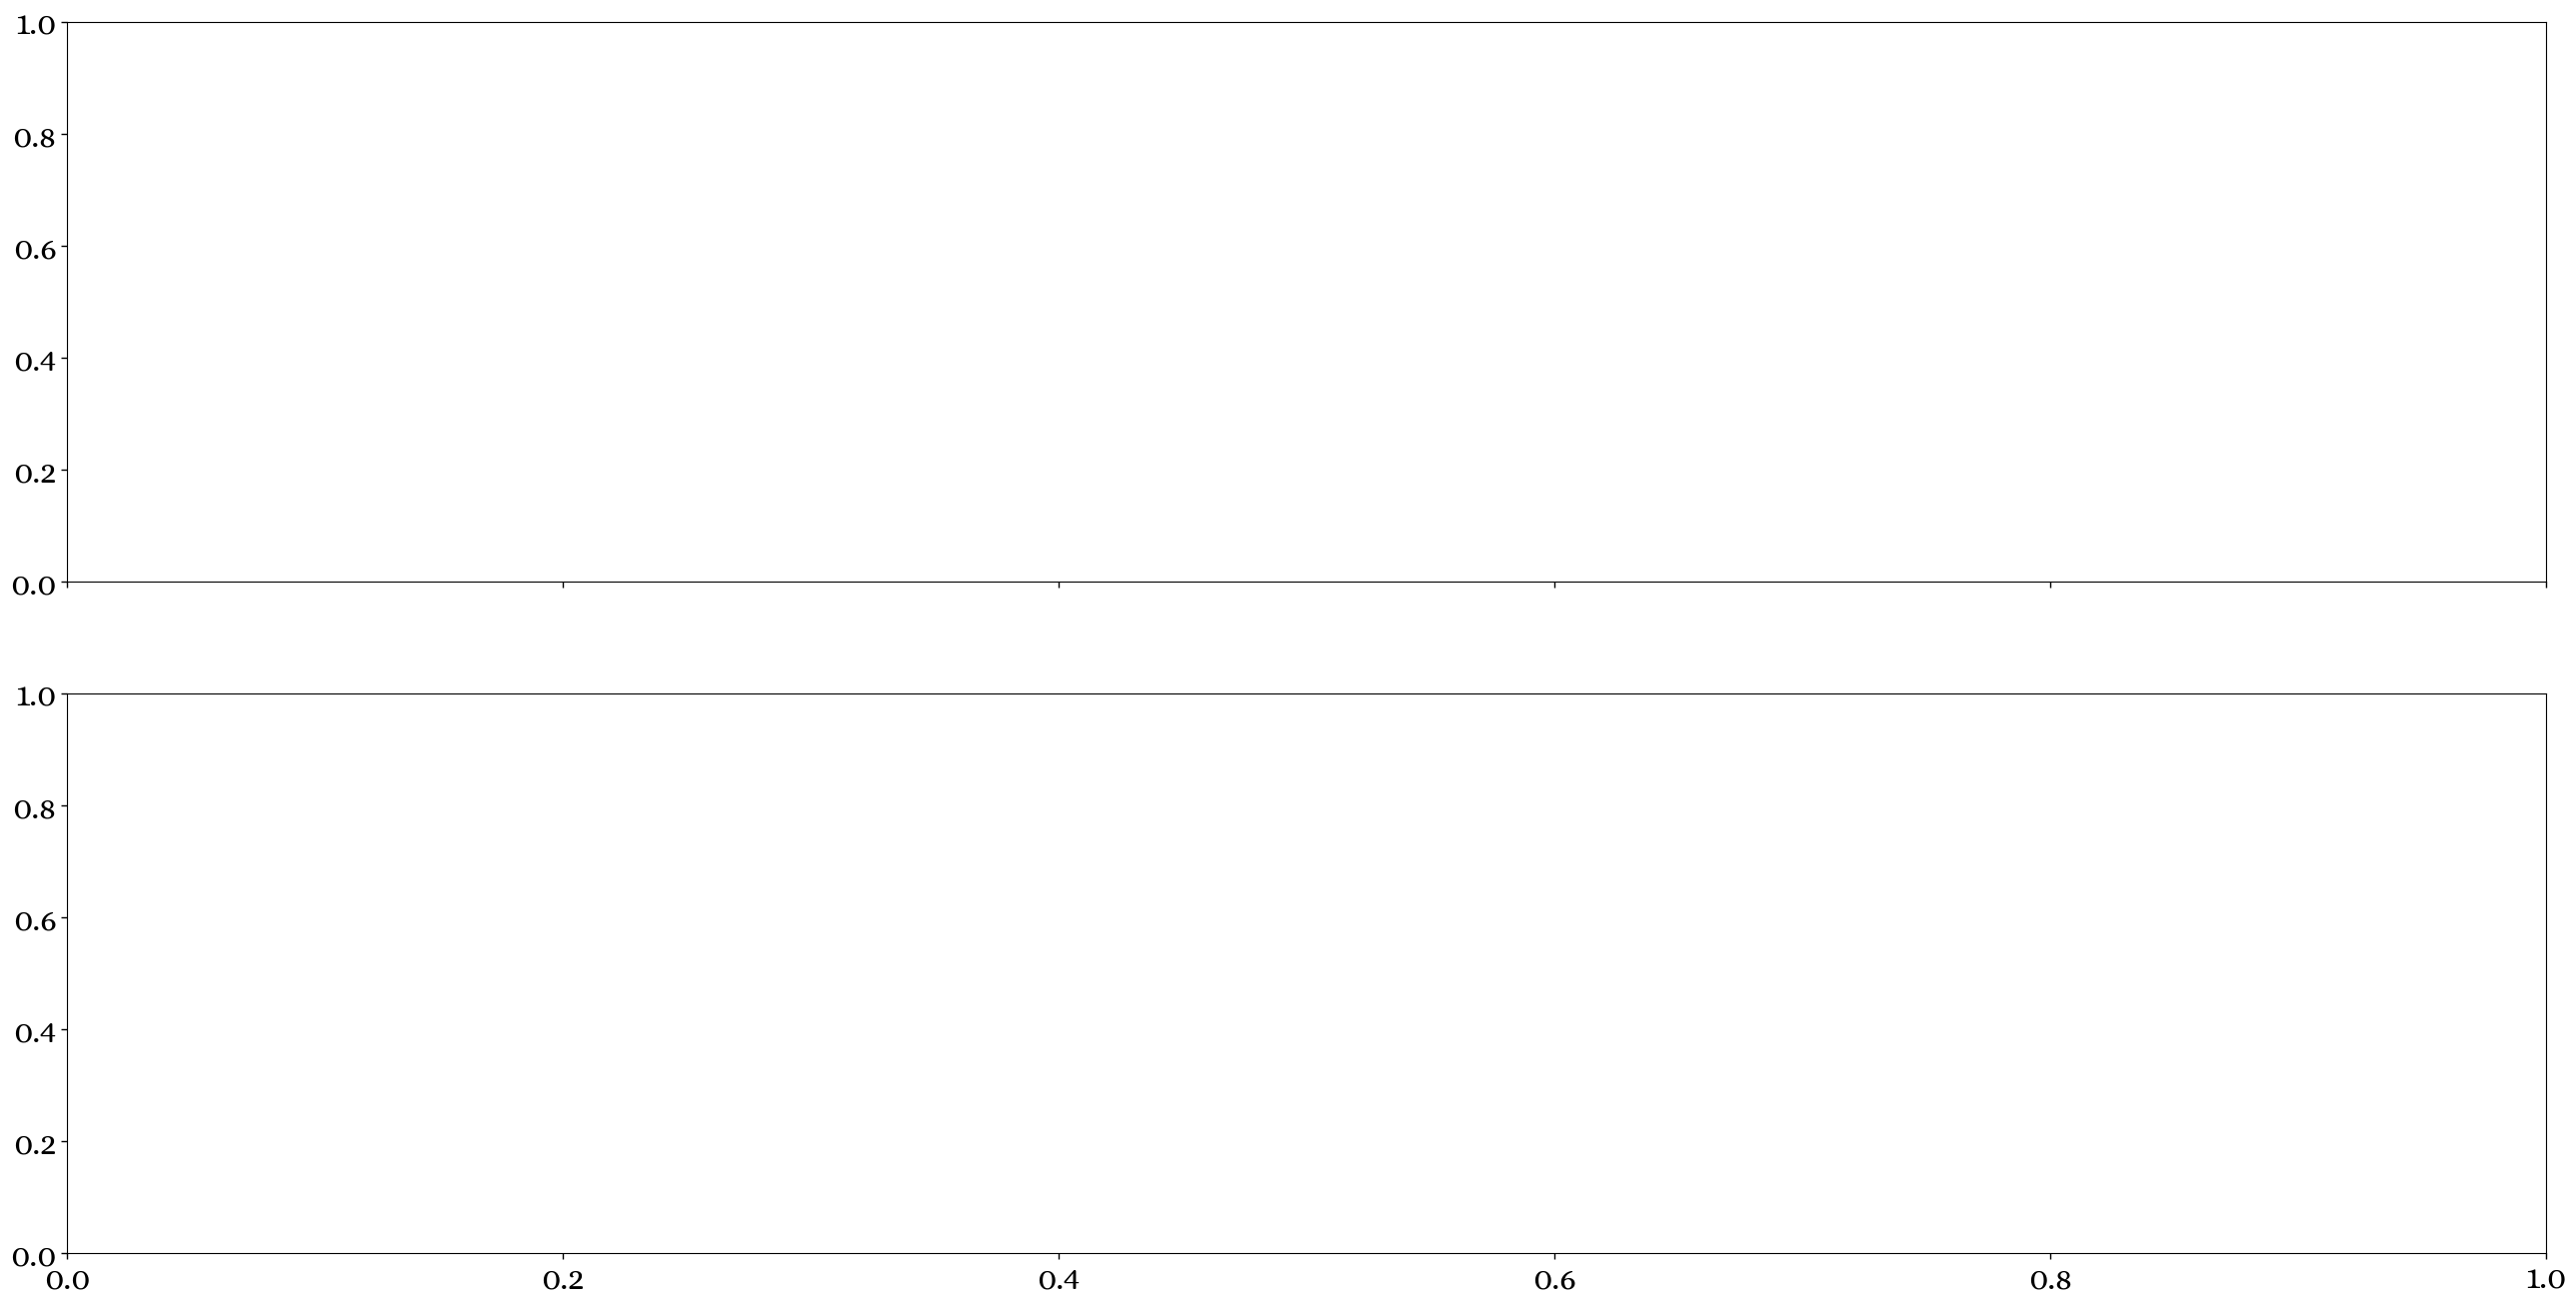

In [76]:
fig, ax = plt.subplots(2,1,figsize=(32,16),sharex=True)

for axs,variable,l in zip(ax,["temperature","salinity"],["T$_{subskin}$ (°C)","PS (PSU)"]):
    
    ds_mean = sbmeans[variable]
    ds_std  = sbstds[variable]
    ds_time = sbmeans["time"]
    
    axs.plot(ds_time,ds_mean,lw=3,label="Raw",c="C0",zorder=2)
    axs.fill_between(ds_time,ds_mean + ds_std,ds_mean - ds_std,fc='C1',alpha=0.25)

    #ds_mean.where(stds["salinity"] > np.nanpercentile(stds["salinity"],95)).plot(ax=axs,marker='.',c="C1",ls="")
    ds_mean.where(ds_std > np.nanpercentile(ds_std,95)).plot(ax=axs,marker='.',c="C1",ls="")
    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

my_funcs.fix_xticks(ax,sbmeans)
axs.legend(loc='lower left')

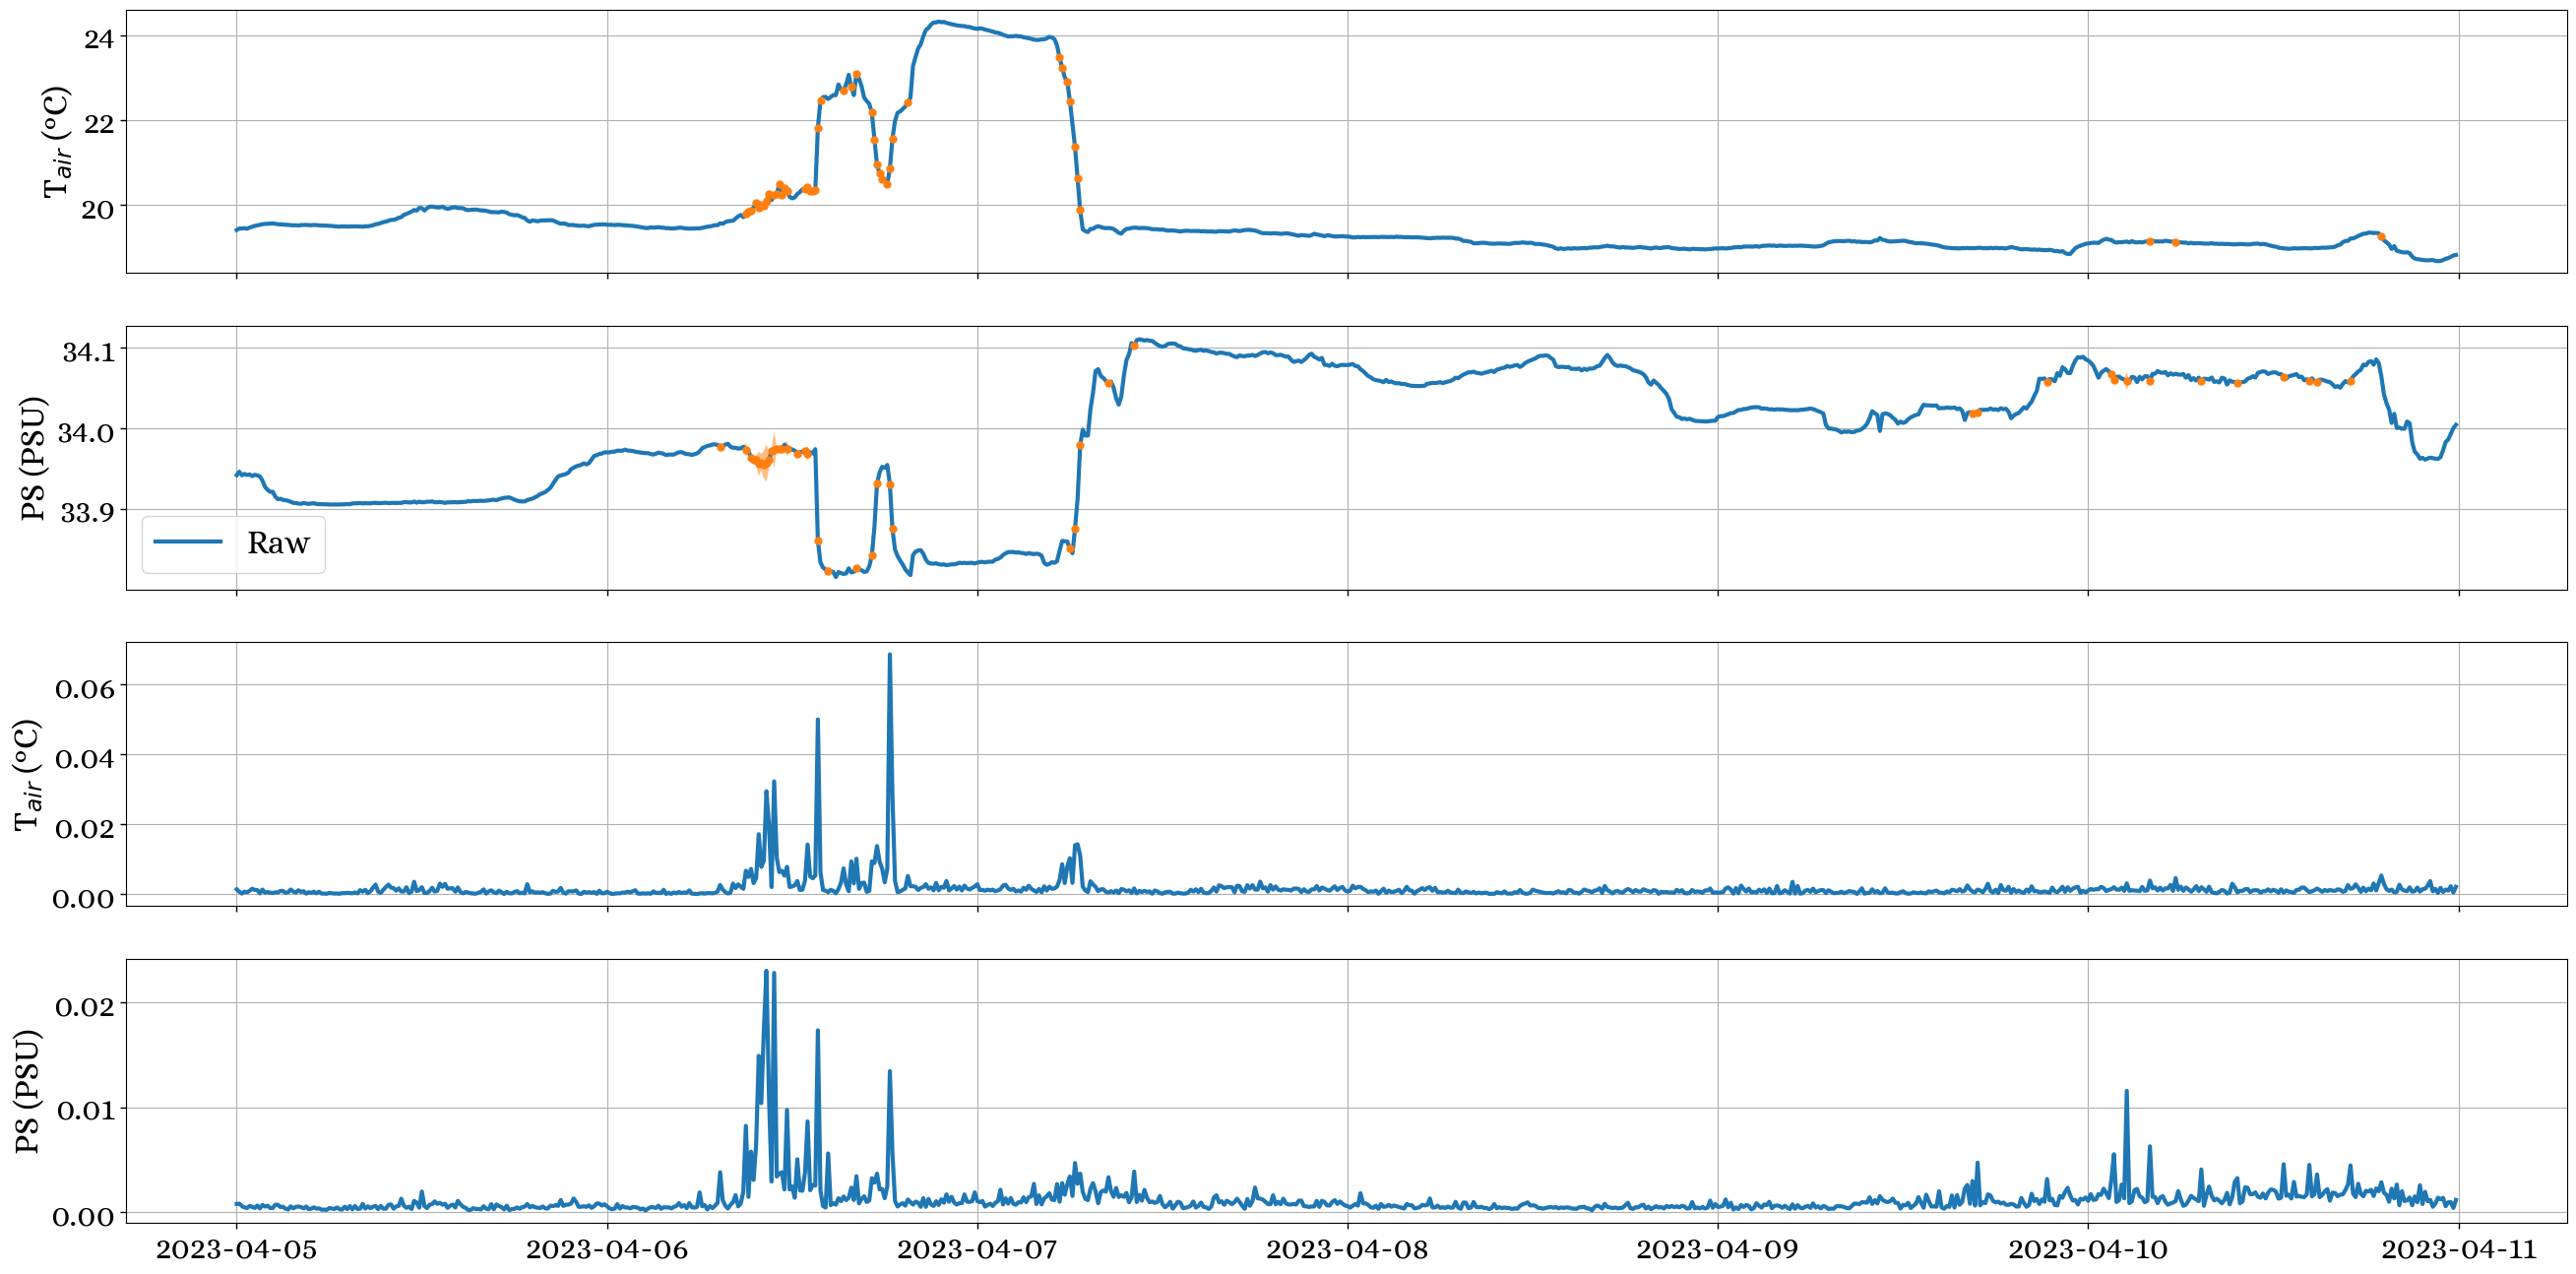

In [133]:
fig, ax = plt.subplots(4,1,figsize=(32,16),sharex=True)

interval = slice("2023-04-05","2023-04-10")
for axs, bxs, variable, l in zip(ax[:2],ax[2:],["temperature","salinity"],["T$_{air}$ (°C)","PS (PSU)"]):
    
    ds_mean = sbmeans[variable].sel(time=interval)
    ds_std  = sbstds[variable].sel(time=interval)
    ds_time = sbmeans["time"].sel(time=interval)
    
    axs.plot(ds_time,ds_mean,lw=3,label="Raw",c="C0",zorder=2)
    bxs.plot(ds_time,ds_std,lw=3,label="Raw",c="C0",zorder=2)
    axs.fill_between(ds_time,ds_mean + ds_std,ds_mean - ds_std,fc='C1',alpha=0.5)

    #ds_mean.where(stds["salinity"] > np.nanpercentile(stds["salinity"],95)).plot(ax=axs,marker='.',c="C1",ls="")
    ds_mean.where(ds_std > np.nanpercentile(ds_std,95)).plot(ax=axs,marker='.',c="C1",ls="",ms=10)
    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid() 
    bxs.set(title="", xlabel="",ylabel=l)
    bxs.grid() 
    
#my_funcs.fix_xticks(ax,sbmeans)
axs.legend(loc='lower left')

In [4]:
ds = np.diff(ds20["SAL_RBR_MEAN"])

In [5]:
ds

array([ 0.02 , -0.008, -0.004, ...,  0.001, -0.039,  0.043])

In [6]:
lim = np.nanpercentile(ds,95)

In [7]:
lim

0.006000000000000227

In [8]:
bad = np.abs(ds) > lim

In [9]:
idx = np.where(~((ds[:-1] < 0) & (ds[1:] > 0) & (bad[1:])))[0]+1

In [10]:
idx

array([     1,      2,      4, ..., 282266, 282267, 282268])

In [11]:
idx

array([     1,      2,      4, ..., 282266, 282267, 282268])

In [12]:
def qc_salinity(ds, variable, percentile, nsteps):
    
    idx = range(len(ds["time"]))
    
    for n in range(nsteps):
        dS = np.diff(ds[variable][idx])
        lim = np.nanpercentile(dS,percentile)
        bad = np.abs(dS) > lim
        idx = np.where(~((dS[:-1] < 0) & (dS[1:] > 0) & (bad[1:])))[0]+1
    
    return ds[variable][idx].interpolate_na("time")

In [63]:
def qc_salinity(ds, variable, percentile, nsteps):
    
    idx = range(len(ds["time"]))
    
    for n in range(nsteps):
        dS = np.diff(ds[variable][idx])
        lim = np.nanpercentile(dS,percentile)
        bad = np.abs(dS) > lim
        idx = np.where(~((dS[:-1] < 0) & (dS[1:] > 0) & (bad[1:])))[0]+1
    
    return ds[variable][idx].interpolate_na("time")

In [97]:
def detect_spikes_with_lag(dS, lag):
    """
    Detect spikes with lag based on the time difference of salinity.

    Parameters:
        dS (ndarray): Time difference of salinity.
        lag (int): Lag window size.

    Returns:
        ndarray: Boolean array indicating spike locations.
    """
    spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
    for i in range(len(dS)):
        if dS[i] < -threshold:  # Check for negative spike
            start_idx = max(0, i - lag)+1
            end_idx = min(len(dS), i + lag + 1)
            for j in range(i + 1, end_idx):  # Look ahead for positive spike within lag window
                if dS[j] > threshold:  # Check for positive spike
                    spikes[start_idx:j] = True  # Mark the spike region for removal
                    break
    return spikes[:-1]  # Remove the last element to match the length of dS

# Example usage
salinity = np.array([35, 35, 33, 33, 33, 35, 35, 35], dtype=float)  # Example salinity data
dS = np.diff(salinity)  # Compute time difference of salinity
threshold = 1#np.percentile(dS, 95)  # Calculate the 95th percentile of dS
lag = 5  # Lag window size

spikes_with_lag = detect_spikes_with_lag(dS, lag)
print("Spike indices with lag:", np.where(spikes_with_lag)[0])

# Output cleaned salinity array
cleaned_salinity = salinity.copy()
cleaned_salinity[np.concatenate(([False], spikes_with_lag))] = np.nan  # Adjust for the difference in dimensions
print("Cleaned salinity:", cleaned_salinity)


Spike indices with lag: [1 2 3]
Cleaned salinity: [35. 35. nan nan nan 35. 35. 35.]


In [201]:
def detect_spikes_with_lag(data, lag, percentile):
    """
    Detect spikes with lag based on the time difference of salinity.

    Parameters:
        data (ndarray): 1D array of the time series data.
        lag (int): Lag window size.

    Returns:
        ndarray: Boolean array indicating spike locations.
        ndarray: Cleaned time series data with spikes removed.
    """
    # Calculate time differences (dS)
    dS = np.diff(data)

    # Calculate the threshold based on a percentile of dS
    threshold = np.nanpercentile(np.abs(dS), percentile)
    
    spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
    for i in range(len(dS)):
        if (dS[i] <= -threshold) and (True in (dS[i:i+lag] >= threshold)):
            # Check if time difference is less than negative threshold and that there is an upspike within the allowed interval
            start_idx = i  # Start from the maximum possible index within the lag window
            end_idx = i + np.where((dS[i:i+lag] >= threshold) == True)[0][0]  # End at the current index
            spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal

    cleaned_data = data.copy()
    cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions

    return cleaned_data

In [315]:
def detect_spikes_with_lag(data, lag, percentile):
    """
    Detect spikes with lag based on the time difference of salinity.

    Parameters:
        data (ndarray): 1D array of the time series data.
        lag (int): Lag window size.
        percentile (float): Percentile for calculating the threshold.

    Returns:
        ndarray: Boolean array indicating spike locations.
        ndarray: Cleaned time series data with spikes removed.
    """
    # Calculate time differences (dS)
    dS = np.diff(data)

    # Calculate the threshold based on a percentile of dS
    threshold = np.nanpercentile(np.abs(dS), 95)

    spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
    i = 0
    while i < len(dS):
        if (dS[i] <= -threshold) & (len(np.where(dS[i:i+lag] >= threshold)[0]) > 0):
            # Check if time difference is less than negative threshold
            start_idx = i  # Start from the maximum possible index within the lag window

            # Find the maximum positive change within the lag window
            max_positive_change_idx = i + np.argmax(np.where(dS[i:i+lag] >= threshold)[0])
            end_idx = max_positive_change_idx + 1  # End at the maximum positive change index

            spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
            i = max_positive_change_idx + 1  # Move to the next index after the spike region
        else:
            i += 1  # Move to the next index

    cleaned_data = data.copy()
    cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions

    return cleaned_data

In [ ]:
# Calculate time differences (dS)
dS = np.diff(data)

# Calculate the threshold based on a percentile of dS
threshold = np.nanpercentile(np.abs(dS), percentile)

spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
i = 0
while i < len(dS):
    if dS[i] <= -threshold:
        # Check if time difference is less than negative threshold
        start_idx = i  # Start from the maximum possible index within the lag window

        # Find the maximum positive change within the lag window
        max_positive_change_idx = i + np.argmax(dS[i:i+lag] >= threshold)
        end_idx = max_positive_change_idx + 1  # End at the maximum positive change index

        spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
        i = max_positive_change_idx + 1  # Move to the next index after the spike region
    else:
        i += 1  # Move to the next index

cleaned_data = data.copy()
cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions



In [316]:
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 95)

<xarray.DataArray 'SAL_RBR_MEAN' (time: 282271)>
array([34.656, 34.676, 34.668, ..., 33.424,    nan, 33.428])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T04:00:00 ... 2019-08-03T04:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [ ]:
np.percentile(np.abs(np.diff(salinity)), 50)

2.0

In [ ]:
# Calculate time differences (dS)
dS = np.diff(ds20["SAL_RBR_MEAN"])

# Calculate the threshold based on a percentile of dS
threshold = np.nanpercentile(np.abs(dS), 95)
lag = 10


spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
for i in range(len(dS)):
    if (dS[i] <= -threshold) and (True in (dS[i:i+lag] >= threshold)):
        # Check if time difference is less than negative threshold and that there is an upspike within the allowed interval
        start_idx = i  # Start from the maximum possible index within the lag window
        end_idx = i + np.where((dS[i:i+lag] >= threshold) == True)[0][0]  # End at the current index
        spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
        
cleaned_data = ds20["SAL_RBR_MEAN"].copy()
cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions


In [ ]:
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).diff("time")

<xarray.DataArray 'SAL_RBR_MEAN' (time: 50)>
array([ 1.000e-03,  1.000e-03,  1.000e-03,  0.000e+00, -1.000e-03,
        0.000e+00, -1.000e-03,  1.000e-03,  0.000e+00, -1.000e-03,
       -2.105e+00,  3.500e-02,  1.490e-01, -8.000e-03,  3.800e-02,
       -6.000e-03,  2.200e-02,  6.300e-02, -2.400e-02,  2.200e-02,
        1.300e-02,  5.100e-02,  1.390e-01,  3.600e-02,  1.060e-01,
       -1.500e-02,  2.200e-02, -1.000e-02,  3.100e-02,  3.100e-02,
        1.300e-02,  6.800e-02, -4.600e-02,  2.300e-02,  4.000e-02,
       -2.200e-02,  4.700e-02,  3.600e-02,  7.300e-02,  1.700e-01,
        1.470e-01,  1.660e-01,  6.910e-01,  0.000e+00,  1.000e-03,
        1.000e-03,  0.000e+00,  1.000e-03,  0.000e+00,  2.000e-03])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-03-22T05:51:00 ... 2019-03-22T06:4...
    trajectory  float32 1.02e+03

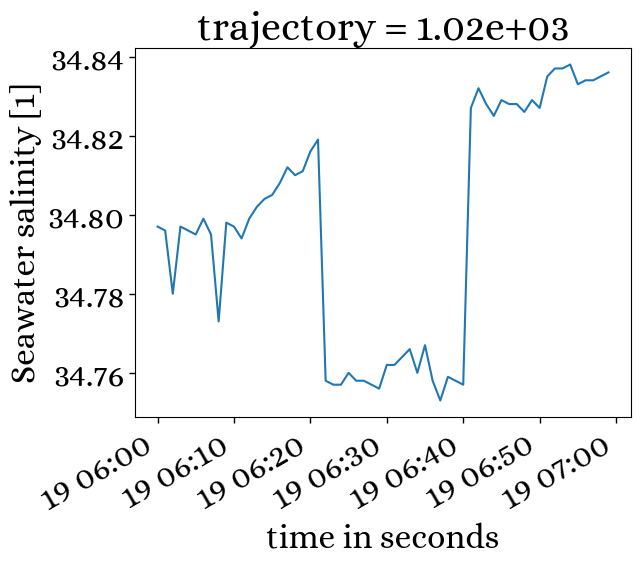

In [357]:
data[120:120+60].plot()

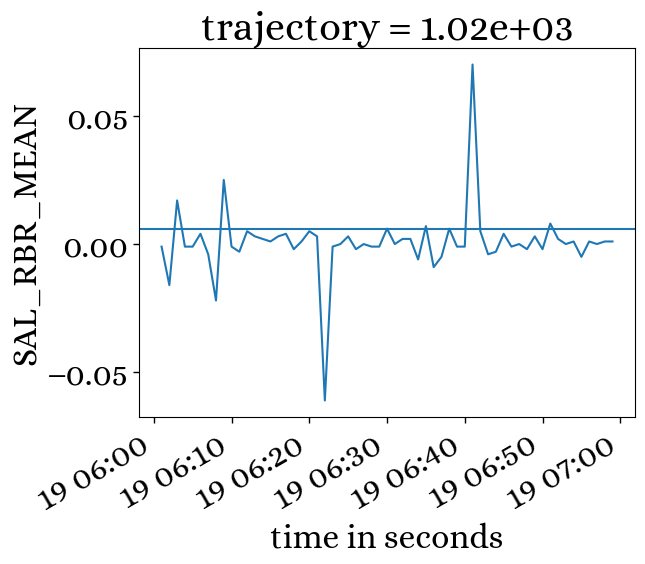

In [362]:
data[120:120+60].diff("time").plot()
plt.axhline(0.006)

In [375]:
np.where(np.diff(data)[120:120+60] > 0.006)[0][0]

2

In [376]:
np.where(np.diff(data)[120:120+60] < 0.006)[0][0]

0

In [385]:
data[100:100+60]

<xarray.DataArray 'SAL_RBR_MEAN' (time: 60)>
array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812, 34.813,
       34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806, 34.804, 34.799,
       34.798, 34.799, 34.797, 34.796, 34.78 , 34.797, 34.796, 34.795, 34.799,
       34.795, 34.773, 34.798, 34.797, 34.794, 34.799, 34.802, 34.804, 34.805,
       34.808, 34.812, 34.81 , 34.811, 34.816, 34.819, 34.758, 34.757, 34.757,
       34.76 , 34.758, 34.758, 34.757, 34.756, 34.762, 34.762, 34.764, 34.766,
       34.76 , 34.767, 34.758, 34.753, 34.759, 34.758])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T06:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

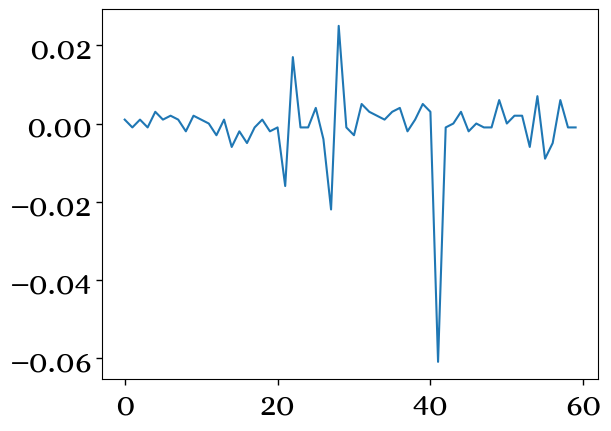

In [393]:
plt.plot(dS[100:100+60])

In [744]:
hanna = ds20[variable+"_MEAN"].where(ds20["SAL_RBR_STDDEV"]<0.01)[100:100+100]

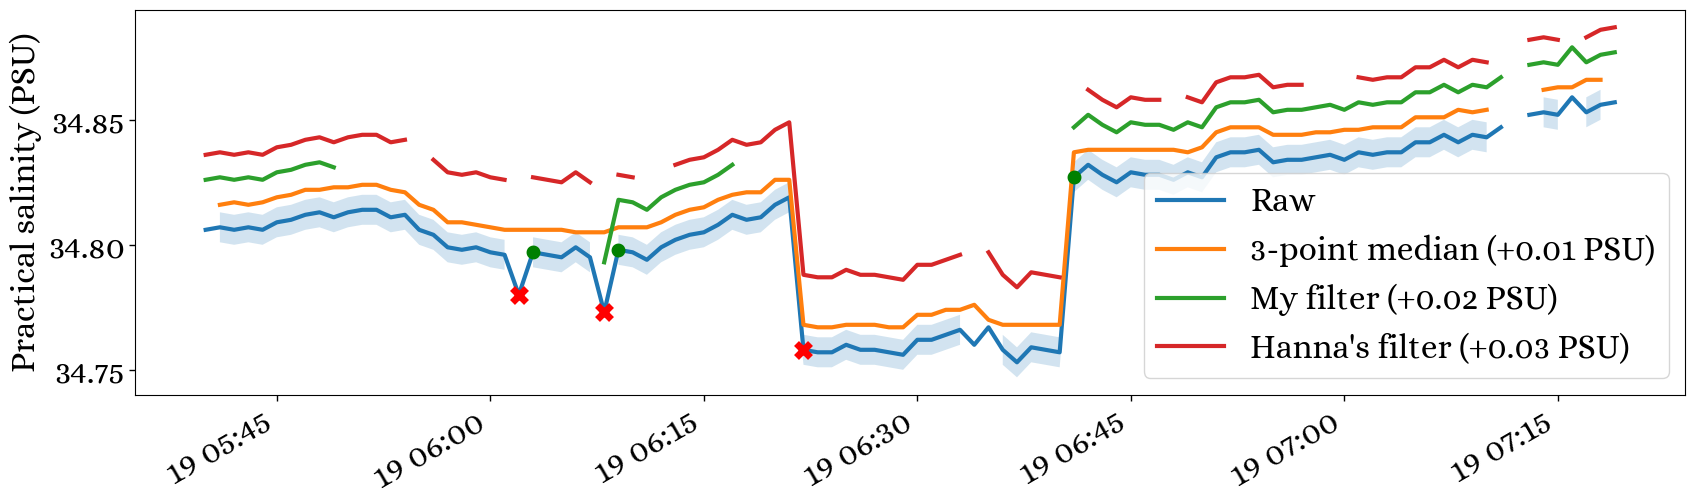

In [750]:
fig,ax = plt.subplots(figsize=(20,5))

data[100:100+100].plot(lw=3,label="Raw")
(data[100:100+100].rolling(time=3,center=True).median("time")+0.01).plot(lw=3,label="3-point median (+0.01 PSU)")
(cleaned_data+0.02).plot(lw=3,label="My filter (+0.02 PSU)")
#data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=3,center=True).median("time")) < 0.006).plot(lw=3,label="Stina's filter")

ax.fill_between(data[100:100+100]["time"],
                data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=3,center=True).median("time")) < 0.006)-0.006,
                data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=3,center=True).median("time")) < 0.006)+0.006,
                fc="C0",alpha=0.2)


dS = np.diff(data)
downspike = (np.where(dS[100:100+100] < -0.01)[0]+1)
upspike = (np.where(dS[100:100+100] > 0.01)[0]+1)

# ax.axhline(data[100:100+100][41]-0.01)
# ax.axhline(data[100:100+100][41]+0.01)


plt.plot(data["time"][100:100+100][downspike],data[100:100+100][downspike],marker="x",c="r",ls="",mew=5,ms=10)
plt.plot(data["time"][100:100+100][upspike],data[100:100+100][upspike],marker=".",c="g",ls="",mew=5,ms=10)

ax.plot(hanna.time,hanna+0.03,lw=3,label="Hanna's filter (+0.03 PSU)",zorder=3,c='C3',ls='-')


ax.set(title="", xlabel="",ylabel="Practical salinity (PSU)")
ax.legend()

In [ ]:
dist = np.insert(np.cumsum(gsw.distance(data.longitude,data.latitude)),0,0)

In [ ]:
(data["time"]-data["time"][0]).values.astype("timedelta64[m]")

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='timedelta64[m]')

In [ ]:
data["minutes"] = ("time"),(data["time"]-data["time"][0]).values.astype("timedelta64[m]")

In [558]:
range_threshold = 30
data_threshold  = 0.01

data = ds20["SAL_RBR_MEAN"].copy()
dS = np.diff(data)

downspike = (np.where(dS <= -data_threshold)[0]+1)
upspike = (np.where(dS >= data_threshold)[0]+1)



# Create a mask array with False values
mask = np.zeros(len(data), dtype=bool)

# Set True for indices between matched pairs of downspike and upspike
for down_idx in downspike:
    for up_idx in upspike:
        if down_idx + 1 <= up_idx <= down_idx + range_threshold:
            mask[down_idx:up_idx] = True
            break  # Exit the inner loop if a corresponding index is found

# Set the masked elements to NaN in your data array
clean_data = data.copy()
clean_data[mask] = np.nan


data["minutes"] = ("time"),((data["time"]-data["time"][0]).values.astype("timedelta64[m]")).astype(int)
clean_data["minutes"] = ("time"),((data["time"]-data["time"][0]).values.astype("timedelta64[m]")).astype(int)

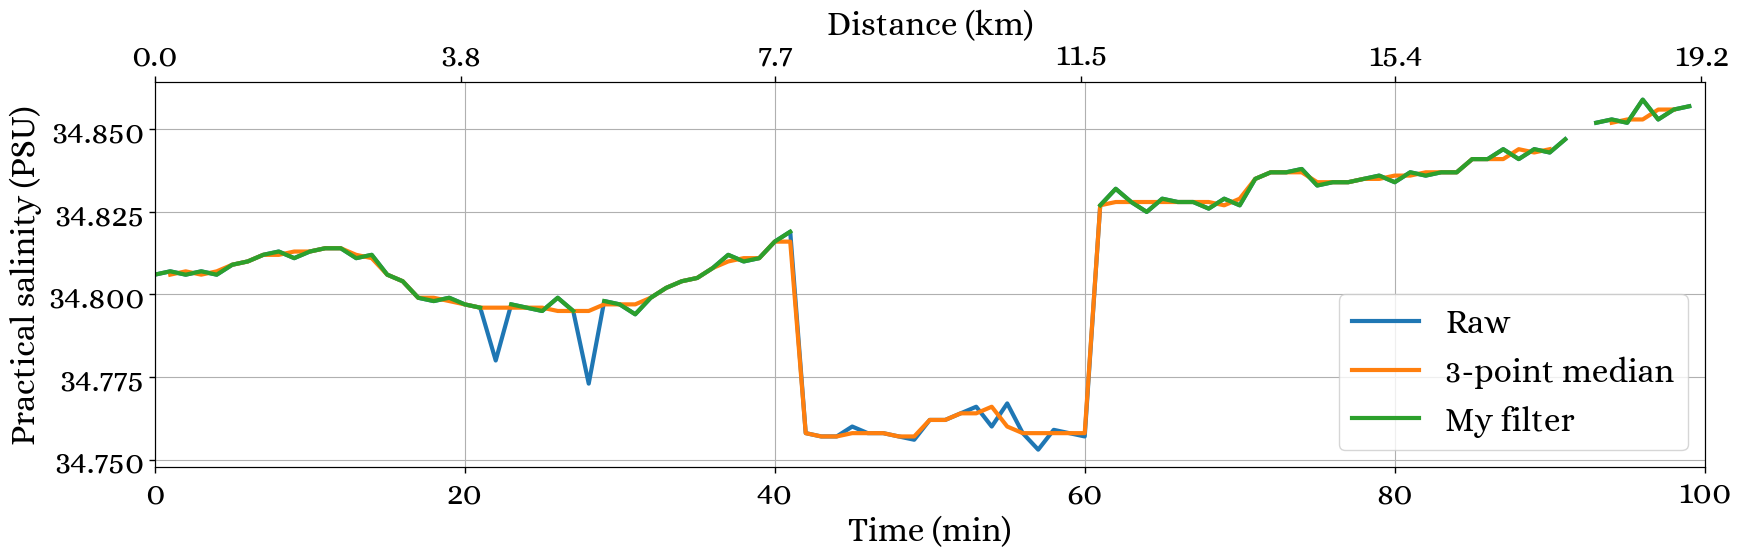

In [557]:
fig,ax = plt.subplots(figsize=(20,5))

data.plot(x="minutes",lw=3,label="Raw")
data.rolling(time=3,center=True).median("time").plot(x="minutes",lw=3,label="3-point median")
clean_data.plot(x="minutes",lw=3,label="My filter")

bx=ax.twiny()
bx.set(xlabel="Distance (km)",xlim=(0,np.nanmax(dist/1000)))
bx.set_xticks(np.linspace(0,np.nanmax(dist/1000),6).round(1))

ax.set_xlim(0,100)

ax.set(title="", xlabel="Time (min)",ylabel="Practical salinity (PSU)")
ax.legend()
ax.grid()

In [650]:
ds20

<xarray.Dataset>
Dimensions:                         (time: 282271)
Coordinates:
    latitude                        (time) float64 ...
    longitude                       (time) float64 ...
  * time                            (time) datetime64[ns] 2019-01-19T04:00:00...
    trajectory                      float32 1.02e+03
Data variables: (12/50)
    SOG                             (time) float64 ...
    COG                             (time) float64 ...
    HDG                             (time) float64 ...
    HDG_WING                        (time) float64 ...
    WING_ANGLE                      (time) float64 ...
    UWND_MEAN                       (time) float64 ...
    ...                              ...
    O2_SAT_RBR_STDDEV               (time) float64 ...
    TEMP_O2_RBR_MEAN                (time) float64 ...
    TEMP_O2_RBR_STDDEV              (time) float64 ...
    CHLOR_RBR_MEAN                  (time) float64 ...
    CHLOR_RBR_STDDEV                (time) float64 ...
    Salinity_QC                     (time) float64 34.66 34.68 34.67 ... nan nan
Attributes: (12/38)
    title:                     Antarctica Circumnavigation Surface Data
    summary:                   This data set was collected from the first Sai...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    ...                        ...
    geospatial_lat_min:        -60.9862208
    geospatial_lat_max:        -46.4277568
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        -179.9986816
    geospatial_lon_max:        179.9997312
    geospatial_lon_units:      degrees_east

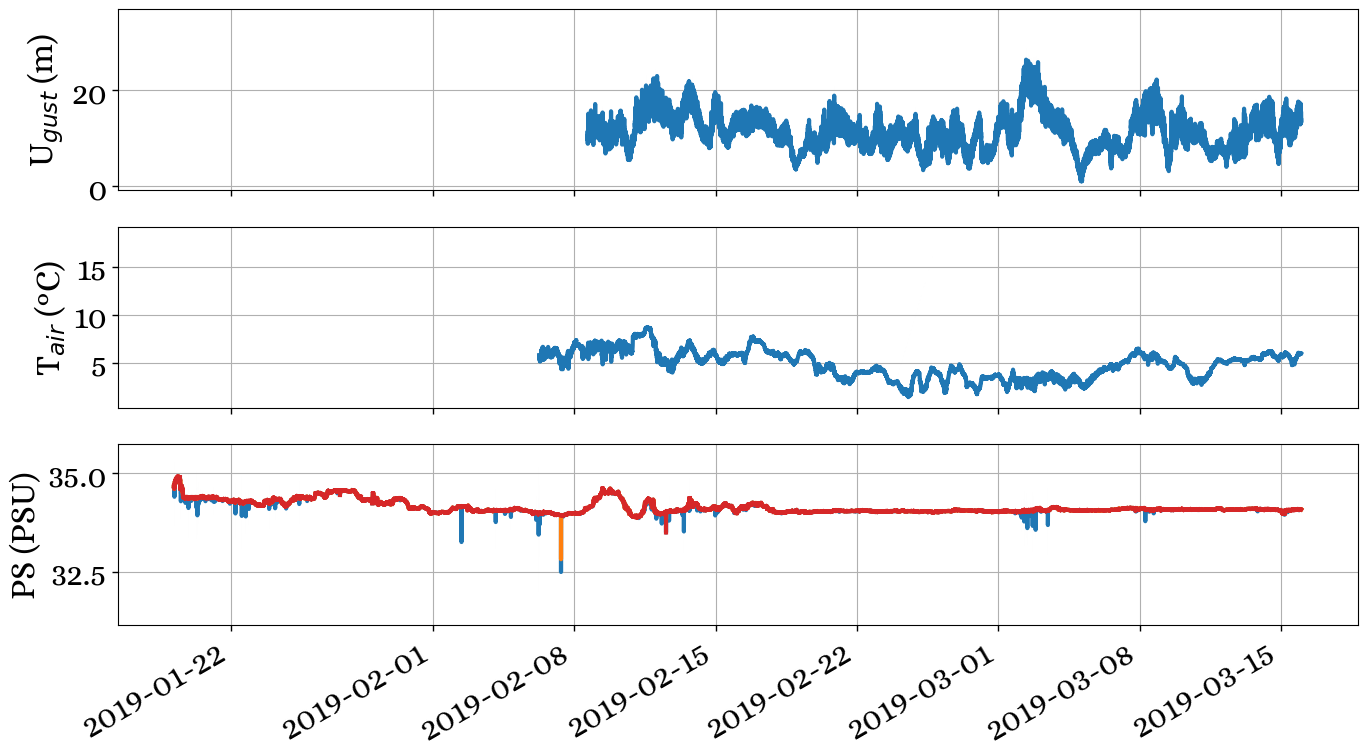

In [740]:
fig, ax = plt.subplots(3,1,figsize=(16,8),sharex=True)

interval = slice("2019-01-19","2019-03-15")

ds20["SAL_RBR_MEAN"].sel(time=interval).rolling(time=3,center=True).median("time").plot(lw=3,label="3-point median",ax=ax[2],zorder=3,c='C1')

for axs,variable,l in zip(ax,["GUST_WND","TEMP_AIR","SAL_RBR"],["U$_{gust}$ (m)", "T$_{air}$ (°C)","PS (PSU)"]):
    
    ds20[variable + "_MEAN"].sel(time=interval).plot(lw=3,label="Raw",ax=axs,c="C0",zorder=2)
    
    axs.fill_between(ds20["time"].sel(time=interval).values,
                    ds20[variable + "_MEAN"].sel(time=interval)+ds20[variable + "_STDDEV"].sel(time=interval),
                    ds20[variable + "_MEAN"].sel(time=interval)-ds20[variable + "_STDDEV"].sel(time=interval),
                    fc='C0',alpha=0.25)

    if "SAL" in variable:
        ds20[variable+"_MEAN"].sel(time=interval).rolling(time=5,center=True).median("time").plot(lw=3,label="5-point median",ax=axs,zorder=3,c='C1')
        ds20[variable+"_MEAN"].sel(time=interval).where(ds20["SAL_RBR_STDDEV"]<0.01).plot(lw=3,label="Hanna's filter",ax=axs,zorder=3,c='C3',ls='-')

    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

#axs.legend()

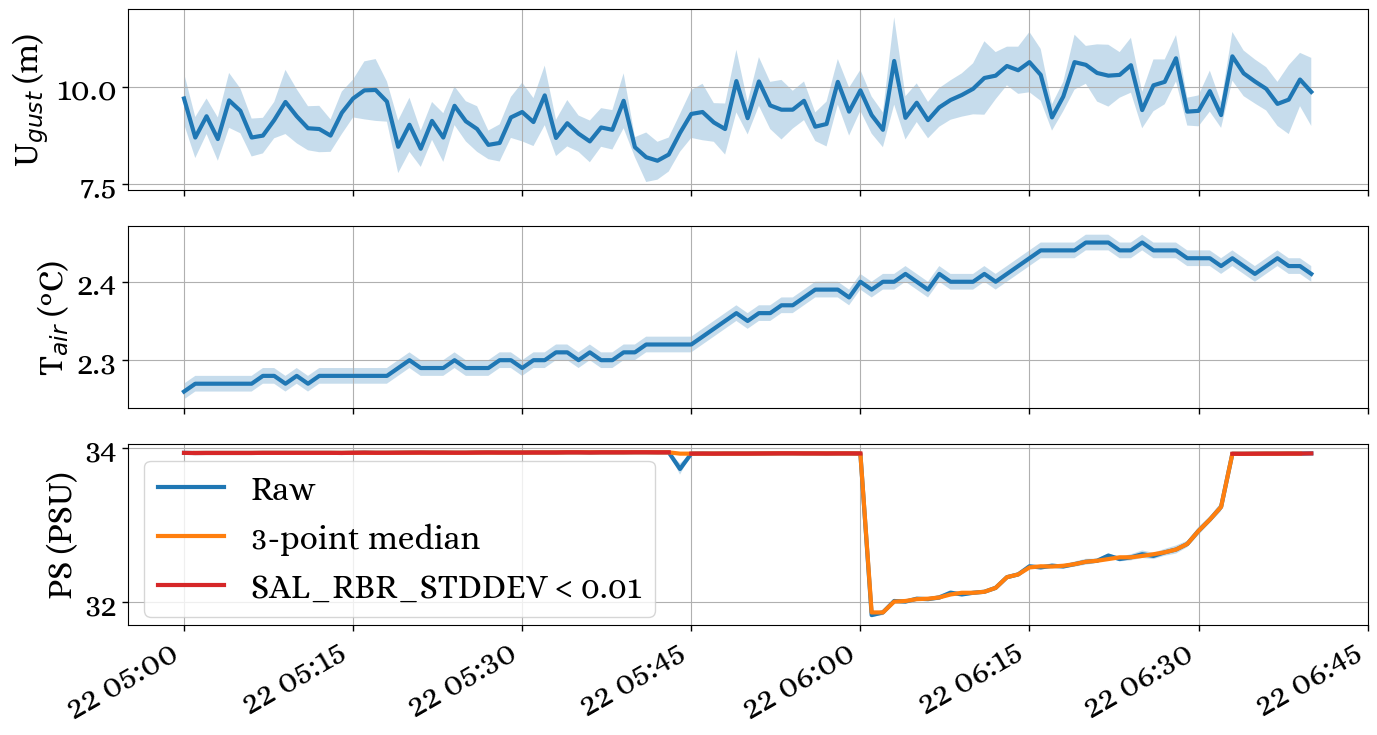

In [9]:
fig, ax = plt.subplots(3,1,figsize=(16,8),sharex=True)

interval = slice("2019-03-22 05:00","2019-03-22 06:40")

for i,(axs,variable,l) in enumerate(zip(ax,["GUST_WND","TEMP_AIR","SAL_RBR"],["U$_{gust}$ (m)", "T$_{air}$ (°C)","PS (PSU)"])):
    
    ds20[variable + "_MEAN"].sel(time=interval).plot(lw=3,label="Raw",ax=axs,c="C0",zorder=2)
    
    axs.fill_between(ds20["time"].sel(time=interval).values,
                    ds20[variable + "_MEAN"].sel(time=interval)+ds20[variable + "_STDDEV"].sel(time=interval),
                    ds20[variable + "_MEAN"].sel(time=interval)-ds20[variable + "_STDDEV"].sel(time=interval),
                    fc='C0',alpha=0.25)

    if "SAL" in variable:
        ds20[variable+"_MEAN"].sel(time=interval).rolling(time=3,center=True).median("time").plot(lw=3,label="3-point median",ax=axs,zorder=3,c='C1')
        ds20[variable+"_MEAN"].sel(time=interval).where(ds20["SAL_RBR_STDDEV"]<0.01).plot(lw=3,label="SAL_RBR_STDDEV < 0.01",ax=axs,zorder=3,c='C3',ls='-')

    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

axs.legend()



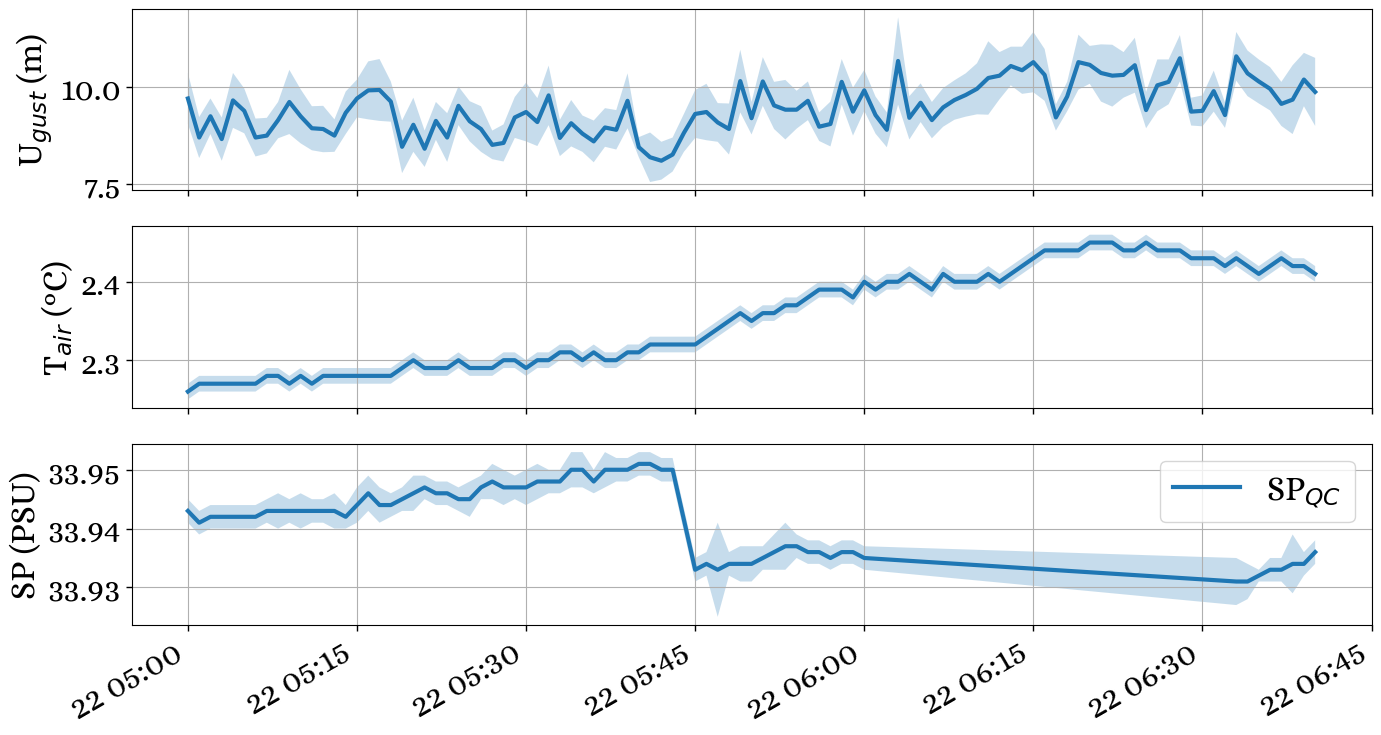

In [15]:
fig, ax = plt.subplots(3,1,figsize=(16,8),sharex=True)

interval = slice("2019-03-22 05:00","2019-03-22 06:40")

for i,(axs,variable,l) in enumerate(zip(ax,["GUST_WND","TEMP_AIR","SALINITY_QC"],["U$_{gust}$ (m)", "T$_{air}$ (°C)","SP (PSU)"])):
    
    ds20[variable + "_MEAN"].sel(time=interval).plot(lw=3,label="SP$_{QC}$" if "SAL" in variable else "Raw",ax=axs,c="C0",zorder=2)
    
    axs.fill_between(ds20["time"].sel(time=interval).values,
                    ds20[variable + "_MEAN"].sel(time=interval)+ds20[variable + "_STDDEV"].sel(time=interval),
                    ds20[variable + "_MEAN"].sel(time=interval)-ds20[variable + "_STDDEV"].sel(time=interval),
                    fc='C0',alpha=0.25)
    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

axs.legend()



In [ ]:
fig,ax = plt.subplots(1,2,constrained_layout=True,figsize=(16,8),sharey=True)


h1=ax.hist(np.diff(ds20["SAL_RBR_MEAN"]),bins=np.arange(-2,2.01,0.01),zorder=2, histtype="stepfilled", lw=2, ec="C0",label="Raw")
h2=ax.hist(np.diff(ds20["SALINITY_QC_MEAN"]),bins=np.arange(-2,2.01,0.01),zorder=2, histtype="stepfilled", lw=2, ec="C1",label="STD < 0.01")

h3=ax.hist(ds20["SAL_RBR_STDDEV"],bins=np.arange(0,2,0.01),zorder=2, histtype="stepfilled", lw=2, ec="C1",label="STD < 0.01")

ax.set_yscale("log")
ax.grid(zorder=1)
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()


In [115]:
matplotlib.patches.FancyBboxPatch?

Object `matplotlib.patches.FancyBboxPatch` not found.


In [443]:
pip install cotede

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [444]:
from cotede.qc import ProfileQC

In [456]:
tsg = ds20[['TEMP_CTD_RBR_MEAN', 'SAL_RBR_MEAN']]

In [519]:
pqc = ProfileQC(ds20, "TSG")

AssertionError: 

In [521]:
from cotede import datasets, qctests

In [533]:
sal_spike = qctests.Spike(ds20, "SAL_RBR_MEAN", cfg={"threshold": 2.0})
#print("The largest spike observed was: {:.3f}".format(np.nanmax(np.abs(sal_spike))))

In [534]:
sal_spike.flags

{'spike': array([0, 1, 1, ..., 1, 1, 0], dtype=int8)}

In [535]:
sal_spike.features

{'spike': array([   nan,  0.008, -0.004, ...,  0.001,  0.039,    nan])}

In [540]:
cfg = {
    'TEMP_CTD_RBR_MEAN':{
        'gradient': {'threshold': 1},
        'rate_of_change': {'threshold': 1}},
    'SAL_RBR_MEAN': {
        'rate_of_change': {'threshold': 0.007},
        'spike': {'threshold': 0.1},
        'gradient': {'threshold': 0.007}}
}

pqc = ProfileQC(ds20, cfg)

In [556]:
flags = ["No QC",
         "Good data",
         "Probably good data",
         "Probably bad data",
         "Bad data",
         "Missing data"]

flag_idx = [0,1,2,3,4,5]

In [555]:
pqc.flags['SAL_RBR_MEAN']['overall'][np.where(pqc.flags['SAL_RBR_MEAN']['overall'] == 9)[0]] = 5

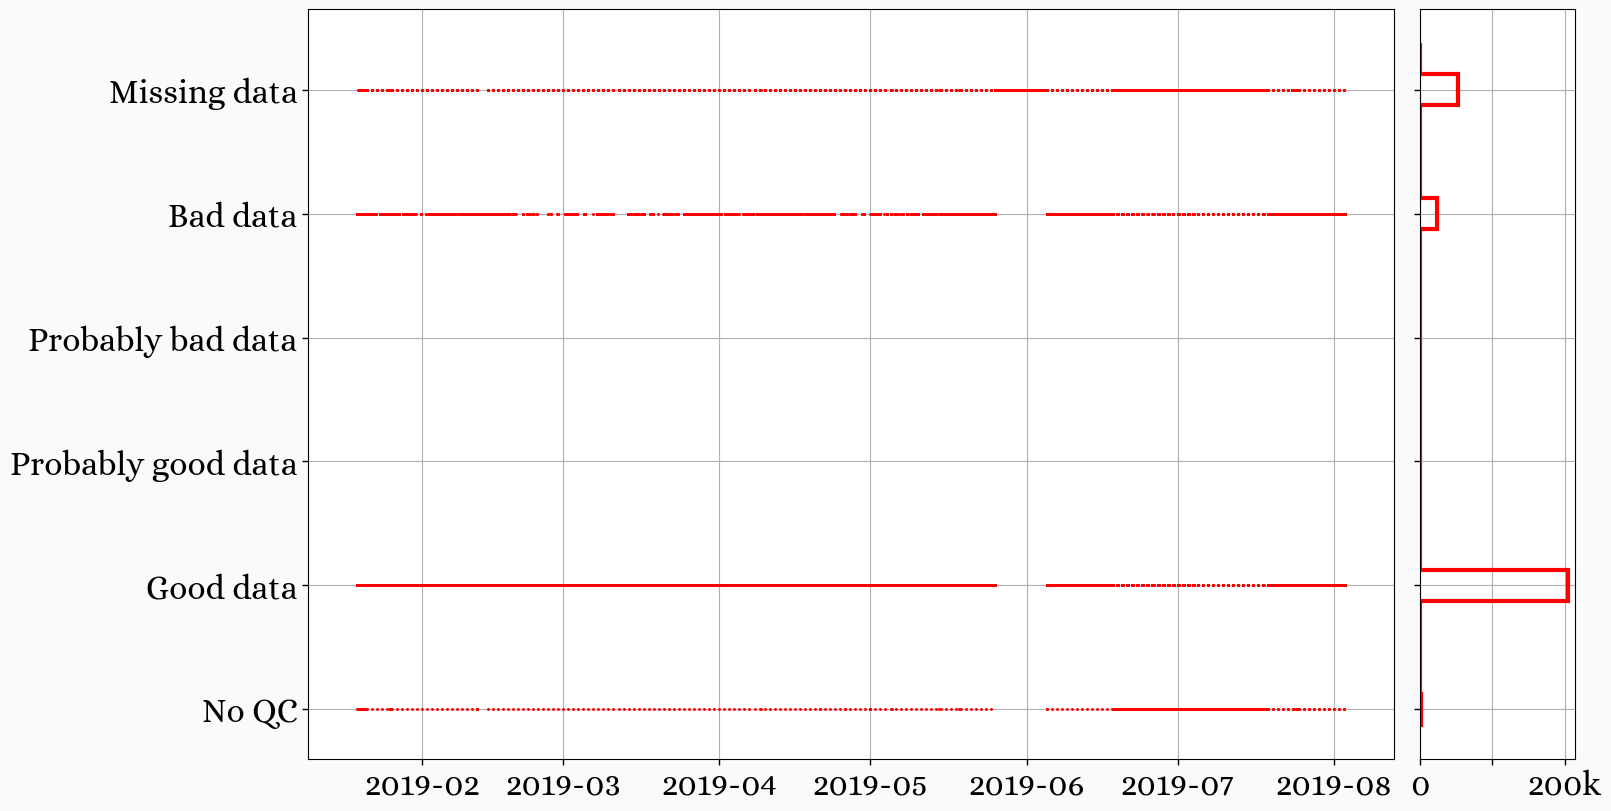

In [561]:
fig,ax = plt.subplots(1,2,figsize=(16,8),constrained_layout=True,width_ratios=[7,1],sharey=True)
fig.set_facecolor("#fafafa")

ax[0].plot(ds20["time"],pqc.flags['SAL_RBR_MEAN']['overall'], "s", ms=1, c="r")
ax[1].hist(pqc.flags['SAL_RBR_MEAN']['overall'], bins=np.arange(-0.125,5.5,0.25), histtype="step", orientation="horizontal", ec="r", lw=3)

ax[0].set_yticks(flag_idx,labels=flags)
ax[1].set_xticks([0,100000,200000],labels=["0","","200k"])
#ax[1].set_xticks([0,50000,100000,150000,200000],labels=["0","","","","200k"])
ax[0].grid()
ax[1].grid()

plt.show()

Text(0.5, 1.0, 'Salinity')

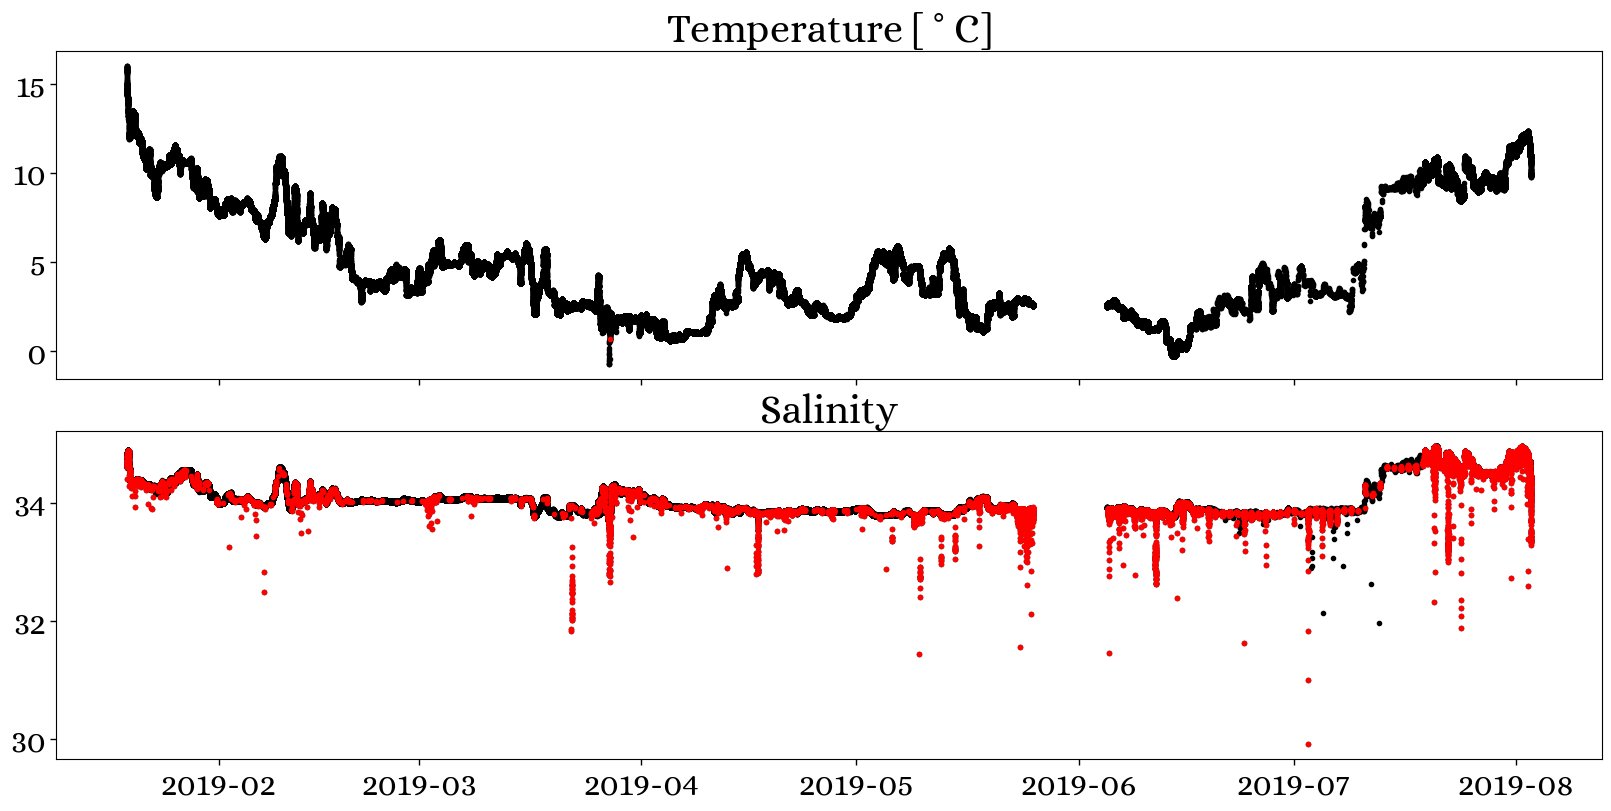

In [486]:
fig,ax = plt.subplots(2,1,constrained_layout=True,figsize=(16,8),sharex=True)

idx = pqc.flags['TEMP_CTD_RBR_MEAN']['overall'] > 1
ax[0].plot(ds20['time'], ds20['TEMP_CTD_RBR_MEAN'], '.', c="k")
ax[0].plot(pqc['time'][idx], pqc['TEMP_CTD_RBR_MEAN'][idx], '.', c="r")
ax[0].set_title('Temperature [$^\circ$C]')

idx = pqc.flags['SAL_RBR_MEAN']['overall'] > 1

ax[1].plot(ds20['time'], ds20['SAL_RBR_MEAN'], '.', c="k")
ax[1].plot(pqc['time'][idx], pqc['SAL_RBR_MEAN'][idx], '.', c="r")
ax[1].set_title('Salinity')


In [644]:
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm

# Example salinity data
salinity = ds20["SAL_RBR_MEAN"].values.copy()

# Set the threshold for going below salinity
below_threshold = 0.01

# Set the maximum number of steps to search for the next rise above threshold
max_steps = 60

# Create a mask array with False values
mask = np.zeros(len(salinity), dtype=bool)

# Iterate over the salinity data
for i in tqdm(range(len(salinity)), "Cleaning salinity"):
    # Check if the difference from the current value to the previous one is above the threshold
    if i > 0 and salinity[i-1] - salinity[i] > below_threshold:
        # Initialize a counter for steps below the threshold
        steps_below_threshold = 1
        
        # Continue iterating to find the next rise above threshold
        j = 1
        while j <= max_steps and i+j < len(salinity):
            if salinity[i-1] - salinity[i+j] > below_threshold*2:
                steps_below_threshold += 1
            else:
                break  # Break the loop if the difference rises above the threshold
            j += 1
        
        # Mask the data if we're below the threshold for too many steps
        if steps_below_threshold >= max_steps or (i + j) == len(salinity):
            mask[i:i+j+1] = True
        else:
            mask[i] = True  # Mask even if there's only one instance of a spike

# Set the masked elements to NaN in the data array
salinity[mask] = np.nan
ds20["Salinity_QC"] = ("time"), salinity

print("Salinity data with masked values below the threshold:\n", salinity)


Cleaning salinity:   0%|          | 0/282271 [00:00<?, ?it/s]

Salinity data with masked values below the threshold:
 [34.656 34.676 34.668 ...    nan    nan    nan]


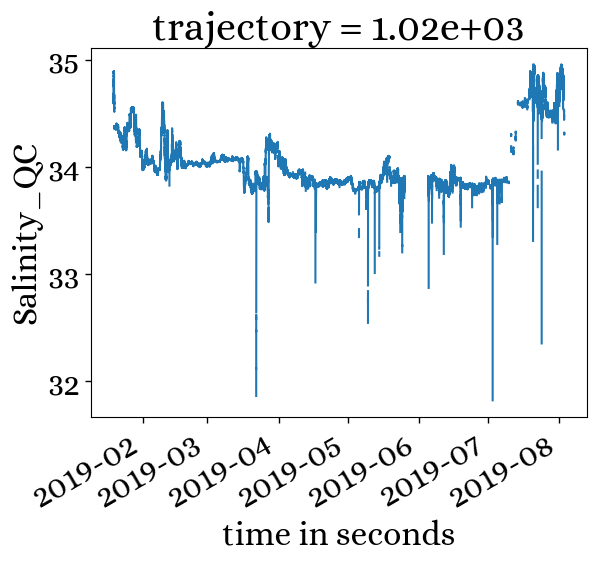

In [645]:
ds20["Salinity_QC"].plot()

In [563]:
data[downspike].sel(time=slice("2019-03-22 05:50","2019-03-22 06:40"))

<xarray.DataArray 'SAL_RBR_MEAN' (time: 5)>
array([31.83 , 32.099, 32.451, 32.56 , 32.601])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-03-22T06:01:00 ... 2019-03-22T06:2...
    trajectory  float32 1.02e+03
    minutes     (time) int64 89401 89409 89416 89423 89426
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [493]:
spike_periods = []
n=60
threshold = 0.006
for i in range(len(dS[100:100+100])):
    if dS[i] < -threshold:  # Check for negative spike
        next_spike_idx = None
        for j in range(i + 1, min(i + n + 1, len(dS[100:100+100]))):
            if (dS[100:100+100][j] > threshold and dS[100:100+100][i] < 0) or (dS[100:100+100][j] < -threshold and dS[100:100+100][i] > 0):
                next_spike_idx = j
                break

        if next_spike_idx is not None:
            spike_periods.append((i, next_spike_idx))

print("Spike periods:", spike_periods)

Spike periods: [(1, 22), (8, 22), (9, 14), (10, 14), (12, 22), (13, 14), (16, 22), (19, 22), (22, 27), (24, 28), (37, 49)]


In [498]:
dS[100:200] < -threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [496]:
dS[100:200]

array([ 0.001, -0.001,  0.001, -0.001,  0.003,  0.001,  0.002,  0.001,
       -0.002,  0.002,  0.001,  0.   , -0.003,  0.001, -0.006, -0.002,
       -0.005, -0.001,  0.001, -0.002, -0.001, -0.016,  0.017, -0.001,
       -0.001,  0.004, -0.004, -0.022,  0.025, -0.001, -0.003,  0.005,
        0.003,  0.002,  0.001,  0.003,  0.004, -0.002,  0.001,  0.005,
        0.003, -0.061, -0.001,  0.   ,  0.003, -0.002,  0.   , -0.001,
       -0.001,  0.006,  0.   ,  0.002,  0.002, -0.006,  0.007, -0.009,
       -0.005,  0.006, -0.001, -0.001,  0.07 ,  0.005, -0.004, -0.003,
        0.004, -0.001,  0.   , -0.002,  0.003, -0.002,  0.008,  0.002,
        0.   ,  0.001, -0.005,  0.001,  0.   ,  0.001,  0.001, -0.002,
        0.003, -0.001,  0.001,  0.   ,  0.004,  0.   ,  0.003, -0.003,
        0.003, -0.001,  0.004,    nan,    nan,  0.001, -0.001,  0.007,
       -0.006,  0.003,  0.001,  0.   ])

In [495]:
data[100:200].values

array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812,
       34.813, 34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806,
       34.804, 34.799, 34.798, 34.799, 34.797, 34.796, 34.78 , 34.797,
       34.796, 34.795, 34.799, 34.795, 34.773, 34.798, 34.797, 34.794,
       34.799, 34.802, 34.804, 34.805, 34.808, 34.812, 34.81 , 34.811,
       34.816, 34.819, 34.758, 34.757, 34.757, 34.76 , 34.758, 34.758,
       34.757, 34.756, 34.762, 34.762, 34.764, 34.766, 34.76 , 34.767,
       34.758, 34.753, 34.759, 34.758, 34.757, 34.827, 34.832, 34.828,
       34.825, 34.829, 34.828, 34.828, 34.826, 34.829, 34.827, 34.835,
       34.837, 34.837, 34.838, 34.833, 34.834, 34.834, 34.835, 34.836,
       34.834, 34.837, 34.836, 34.837, 34.837, 34.841, 34.841, 34.844,
       34.841, 34.844, 34.843, 34.847,    nan, 34.852, 34.853, 34.852,
       34.859, 34.853, 34.856, 34.857])

In [475]:
cleaned_data = data[100:100+100].copy()

for start_idx, end_idx in spike_periods:
    cleaned_data[start_idx+1:end_idx+1] = np.nan  # Mark the spike region for removal


In [476]:
cleaned_data

<xarray.DataArray 'SAL_RBR_MEAN' (time: 100)>
array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812, 34.813,
       34.811,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan, 34.773, 34.798, 34.797, 34.794, 34.799, 34.802, 34.804, 34.805,
       34.808, 34.812,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan, 34.827, 34.832,
       34.828, 34.825, 34.829, 34.828, 34.828, 34.826, 34.829, 34.827, 34.835,
       34.837, 34.837, 34.838, 34.833, 34.834, 34.834, 34.835, 34.836, 34.834,
       34.837, 34.836, 34.837, 34.837, 34.841, 34.841, 34.844, 34.841, 34.844,
       34.843, 34.847,    nan, 34.852, 34.853, 34.852, 34.859, 34.853, 34.856,
       34.857])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T07:1...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [ ]:
data

In [431]:
dS = np.diff(data)
downspike = (np.where(dS[100:100+100] < -0.006)[0]+1)
upspike = (np.where(dS[100:100+100] > 0.006)[0]+1)


In [454]:
data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=5,center=True).median("time")) < 0.006)

<xarray.DataArray 'SAL_RBR_MEAN' (time: 100)>
array([   nan,    nan, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812,
       34.813, 34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806,
       34.804, 34.799, 34.798, 34.799, 34.797, 34.796,    nan, 34.797,
       34.796, 34.795, 34.799, 34.795,    nan, 34.798, 34.797, 34.794,
       34.799, 34.802, 34.804, 34.805, 34.808, 34.812, 34.81 , 34.811,
       34.816,    nan, 34.758, 34.757, 34.757, 34.76 , 34.758, 34.758,
       34.757, 34.756, 34.762, 34.762, 34.764, 34.766, 34.76 ,    nan,
       34.758, 34.753, 34.759, 34.758, 34.757, 34.827, 34.832, 34.828,
       34.825, 34.829, 34.828, 34.828, 34.826, 34.829, 34.827, 34.835,
       34.837, 34.837, 34.838, 34.833, 34.834, 34.834, 34.835, 34.836,
       34.834, 34.837, 34.836, 34.837, 34.837, 34.841, 34.841, 34.844,
       34.841, 34.844,    nan,    nan,    nan,    nan,    nan, 34.852,
          nan, 34.853,    nan,    nan])
Coordinates:
    latitude    (time) float64 -46.71 -46.71 -46.71 ... -46.76 -46.76 -46.76
    longitude   (time) float64 168.7 168.7 168.7 168.7 ... 168.9 168.9 168.9
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T07:1...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [ ]:
max_positive_change_idx = i + np.argmax(np.where((dS[i:i+n] >= threshold) & (dS[i:i+n] <= -dS[i]))[0])

In [438]:
downspike

array([15, 22, 28, 42, 54, 56, 97])

In [433]:
upspike

array([23, 29, 50, 55, 58, 61, 71, 96])

In [436]:
dS[100:100+100]

array([ 0.001, -0.001,  0.001, -0.001,  0.003,  0.001,  0.002,  0.001,
       -0.002,  0.002,  0.001,  0.   , -0.003,  0.001, -0.006, -0.002,
       -0.005, -0.001,  0.001, -0.002, -0.001, -0.016,  0.017, -0.001,
       -0.001,  0.004, -0.004, -0.022,  0.025, -0.001, -0.003,  0.005,
        0.003,  0.002,  0.001,  0.003,  0.004, -0.002,  0.001,  0.005,
        0.003, -0.061, -0.001,  0.   ,  0.003, -0.002,  0.   , -0.001,
       -0.001,  0.006,  0.   ,  0.002,  0.002, -0.006,  0.007, -0.009,
       -0.005,  0.006, -0.001, -0.001,  0.07 ,  0.005, -0.004, -0.003,
        0.004, -0.001,  0.   , -0.002,  0.003, -0.002,  0.008,  0.002,
        0.   ,  0.001, -0.005,  0.001,  0.   ,  0.001,  0.001, -0.002,
        0.003, -0.001,  0.001,  0.   ,  0.004,  0.   ,  0.003, -0.003,
        0.003, -0.001,  0.004,    nan,    nan,  0.001, -0.001,  0.007,
       -0.006,  0.003,  0.001,  0.   ])

In [434]:
data[100:100+100][15]

<xarray.DataArray 'SAL_RBR_MEAN' ()>
array(34.806)
Coordinates:
    latitude    float64 ...
    longitude   float64 ...
    time        datetime64[ns] 2019-01-19T05:55:00
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

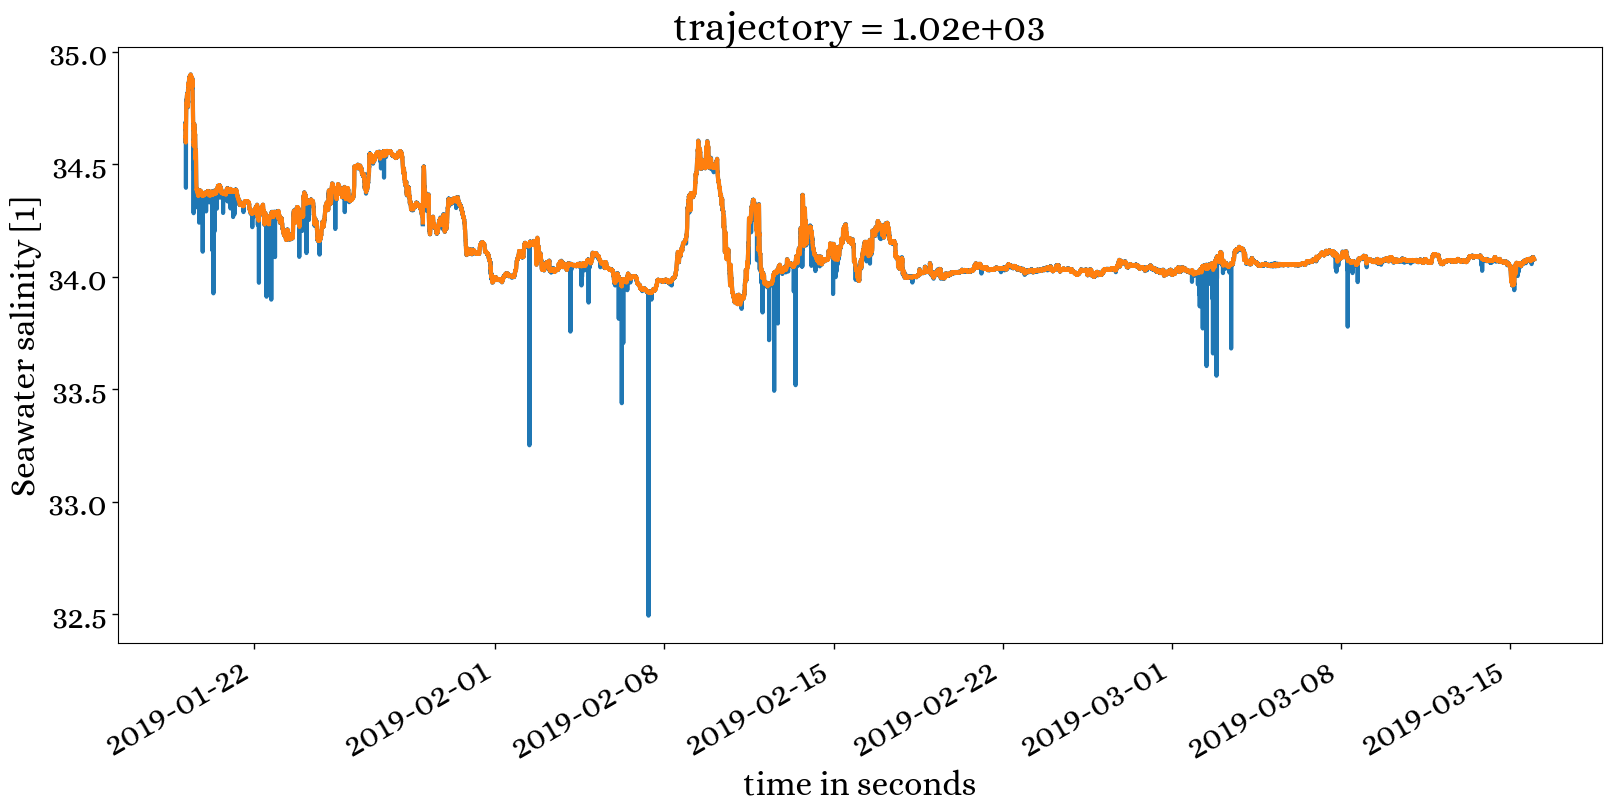

In [739]:
fig, ax = plt.subplots(1,1,figsize=(16,8),constrained_layout=True)

ds20["SAL_RBR_MEAN"].sel(time=interval).plot(ax=ax,lw=3,label="Raw")
ds20["SAL_RBR_MEAN"].rolling(time=5,center=True).median("time").sel(time=interval).plot(ax=ax,lw=3,label="5-point median")

# ds20["SAL_RBR_MEAN"].where(ds20["SAL_RBR_MEAN"].values - ds20["SAL_RBR_MEAN"].rolling(time=5,center=True).median("time").values < 0.001).sel(time=interval).plot(ax=ax,lw=3,label="Stina's way")

In [415]:
cleaned_data

<xarray.DataArray 'SAL_RBR_MEAN' (time: 282271)>
array([34.656, 34.676, 34.668, ..., 33.424,    nan, 33.428])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T04:00:00 ... 2019-08-03T04:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [395]:
data[100:100+60]

<xarray.DataArray 'SAL_RBR_MEAN' (time: 60)>
array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812, 34.813,
       34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806, 34.804, 34.799,
       34.798, 34.799, 34.797, 34.796, 34.78 , 34.797, 34.796, 34.795, 34.799,
       34.795, 34.773, 34.798, 34.797, 34.794, 34.799, 34.802, 34.804, 34.805,
       34.808, 34.812, 34.81 , 34.811, 34.816, 34.819, 34.758, 34.757, 34.757,
       34.76 , 34.758, 34.758, 34.757, 34.756, 34.762, 34.762, 34.764, 34.766,
       34.76 , 34.767, 34.758, 34.753, 34.759, 34.758])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T06:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [399]:
dS[100:100+60]

array([ 0.001, -0.001,  0.001, -0.001,  0.003,  0.001,  0.002,  0.001,
       -0.002,  0.002,  0.001,  0.   , -0.003,  0.001, -0.006, -0.002,
       -0.005, -0.001,  0.001, -0.002, -0.001, -0.016,  0.017, -0.001,
       -0.001,  0.004, -0.004, -0.022,  0.025, -0.001, -0.003,  0.005,
        0.003,  0.002,  0.001,  0.003,  0.004, -0.002,  0.001,  0.005,
        0.003, -0.061, -0.001,  0.   ,  0.003, -0.002,  0.   , -0.001,
       -0.001,  0.006,  0.   ,  0.002,  0.002, -0.006,  0.007, -0.009,
       -0.005,  0.006, -0.001, -0.001])

In [403]:
dS[100:100+60] < -0.006

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False])

In [401]:
(34.758 - 34.819)# < 0.006

-0.06099999999999994

In [ ]:
data[507:507+60]

In [364]:
np.where(((data[507:507+60] - data[507]).values) > 0.006)[0][0]

3

In [373]:
np.where(np.diff(data)[507:507+60] > 0.006)[0][0]

1

In [374]:
np.where(np.diff(data)[507:507+60] > 0.006)[0][0]

1

In [367]:
data[508]

<xarray.DataArray 'SAL_RBR_MEAN' ()>
array(34.475)
Coordinates:
    latitude    float64 ...
    longitude   float64 ...
    time        datetime64[ns] 2019-01-19T12:28:00
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

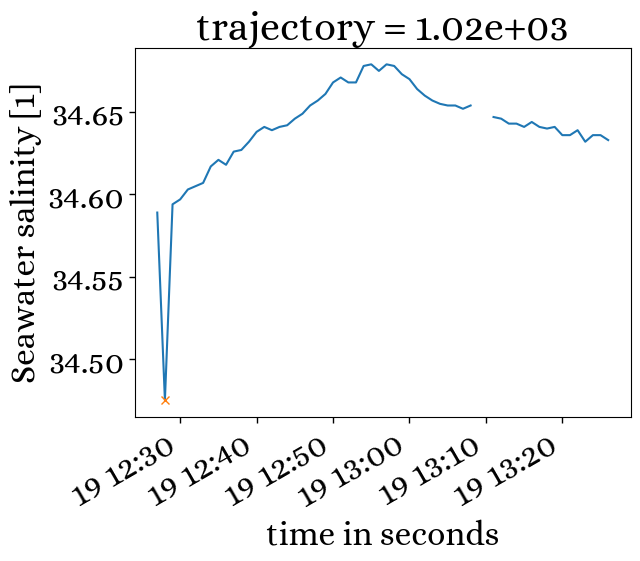

In [368]:
data[507:507+60].plot()
plt.plot(data["time"][508],data[508],marker="x")

In [ ]:
np.abs((data[507:507+60] - data[507]).values) > 0.006

In [313]:
# Calculate time differences (dS)
data = ds20["SAL_RBR_MEAN"]
dS = np.diff(data)

# Calculate the threshold based on a percentile of dS
threshold = np.nanpercentile(np.abs(dS), 95)
lag = 5

spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
i = 0
while i < len(dS):
    if (dS[i] <= -threshold) & (len(np.where(dS[i:i+lag] >= threshold)[0]) > 0):
        # Check if time difference is less than negative threshold
        start_idx = i  # Start from the maximum possible index within the lag window

        # Find the maximum positive change within the lag window
        max_positive_change_idx = i + np.argmax(np.where(dS[i:i+lag] >= threshold)[0])
        end_idx = max_positive_change_idx+1  # End at the maximum positive change index

        spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
        i = max_positive_change_idx + 1  # Move to the next index after the spike region
    else:
        i += 1  # Move to the next index

cleaned_data = data.copy()
cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions

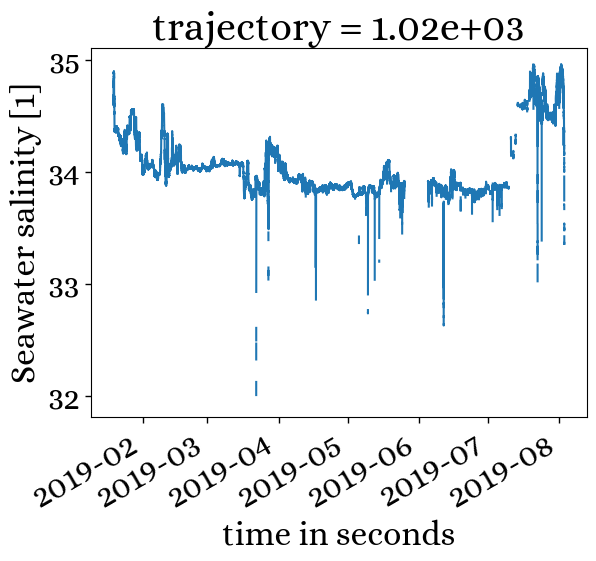

In [314]:
cleaned_data.plot()

In [286]:
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 60, 99).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot()

ValueError: attempt to get argmax of an empty sequence

In [238]:
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 99).sel(time="2019-04-17 05").diff("time") > threshold

<xarray.DataArray 'SAL_RBR_MEAN' (time: 59)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-04-17T05:01:00 ... 2019-04-17T05:5...
    trajectory  float32 1.02e+03

[Text(0.5, 0, ''), Text(0.5, 1.0, '')]

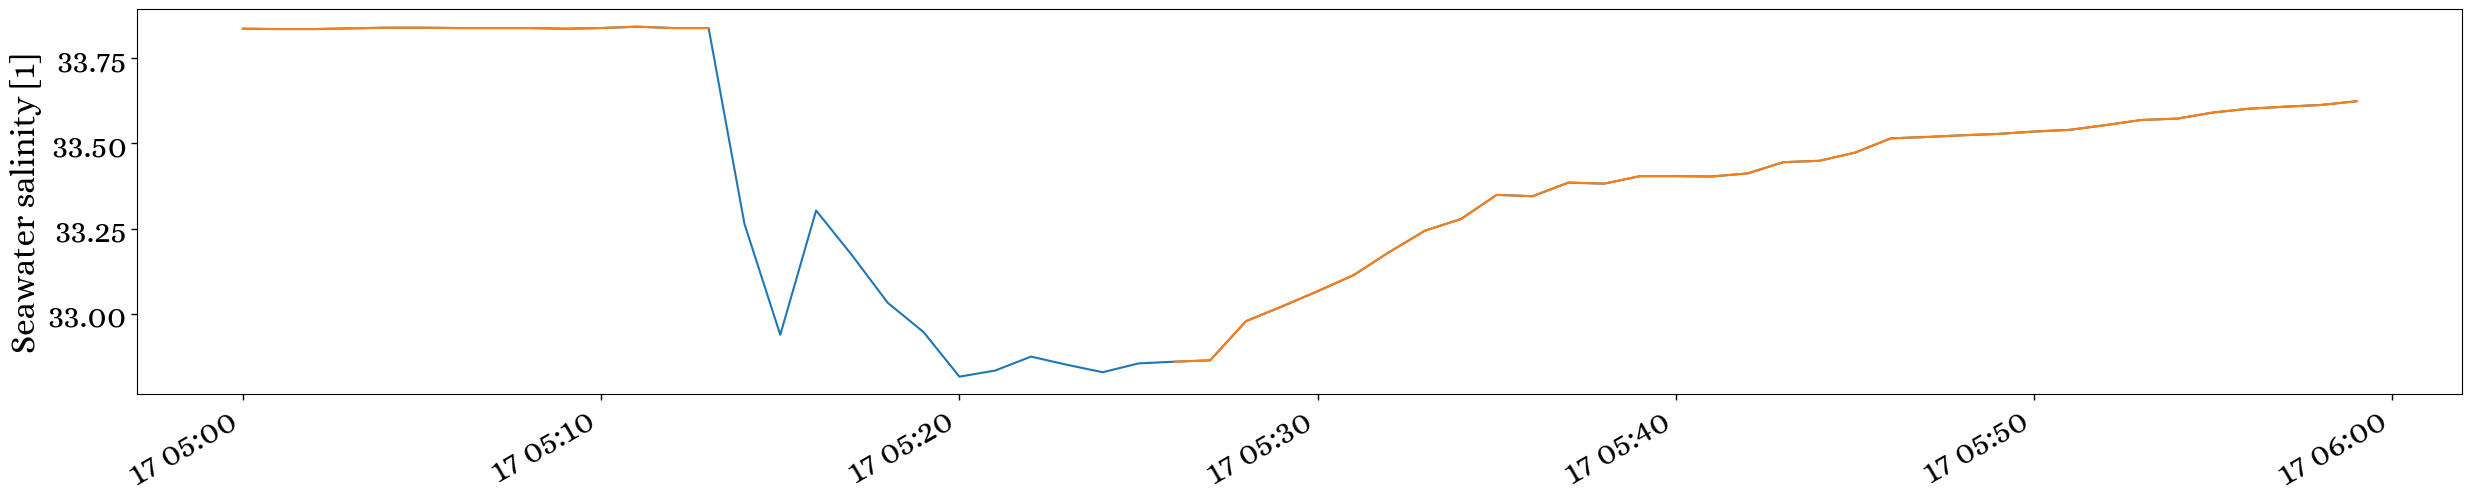

In [320]:
fig,ax = plt.subplots(figsize=(30,5))
ds20["SAL_RBR_MEAN"].sel(time="2019-04-17 05").plot()
#detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 99).sel(time="2019-04-17 05").interpolate_na("time").plot()
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 95).sel(time="2019-04-17 05").plot()
ax.set(xlabel="",title="")
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 15, 95).sel(time="2019-04-17 05").plot()

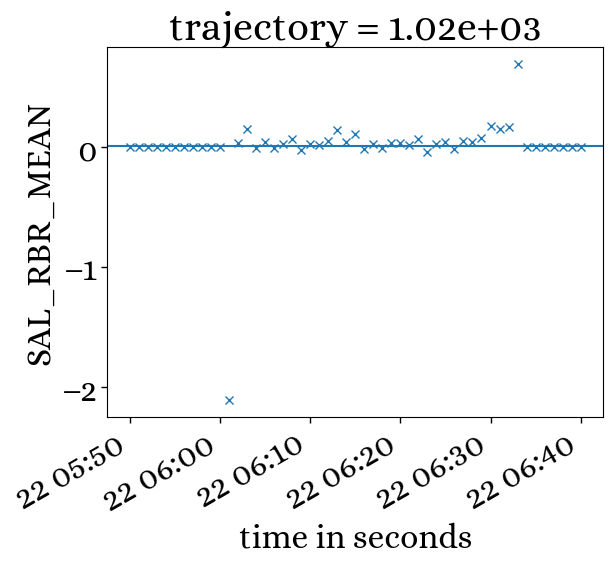

In [234]:
ds20["SAL_RBR_MEAN"].diff("time").sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot(marker='x',ls="")
plt.axhline(np.nanpercentile(ds20["SAL_RBR_MEAN"].diff("time"),95))

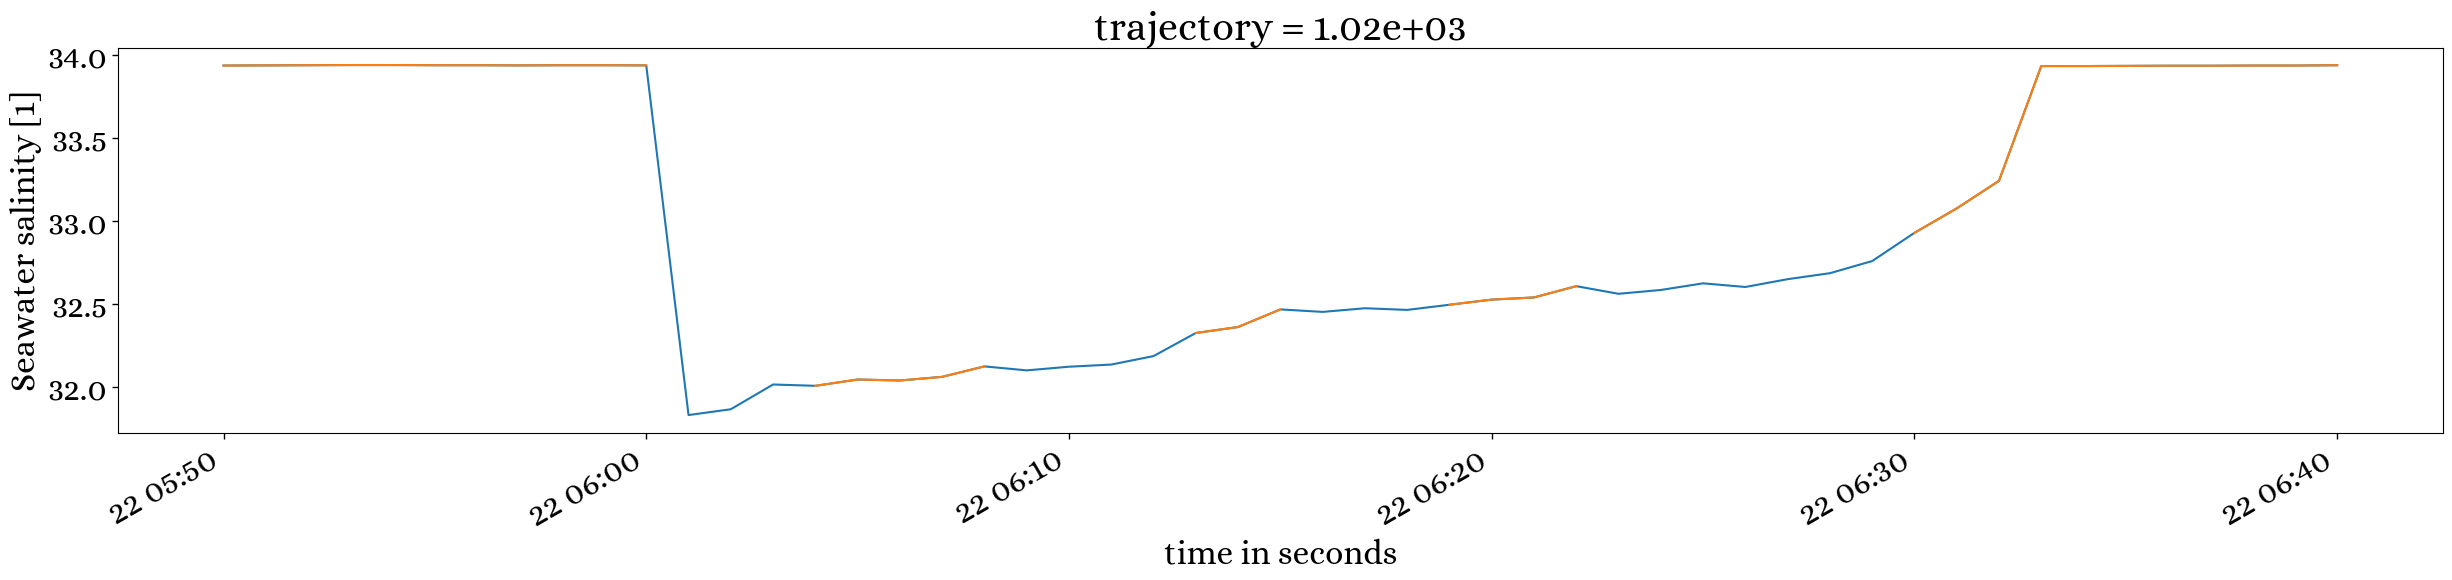

In [322]:
fig,ax = plt.subplots(figsize=(30,5))
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot()
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 60, 95).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).interpolate_na("time").plot()
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 95).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot()
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 15, 95).sel(time="2019-04-17 05").plot()

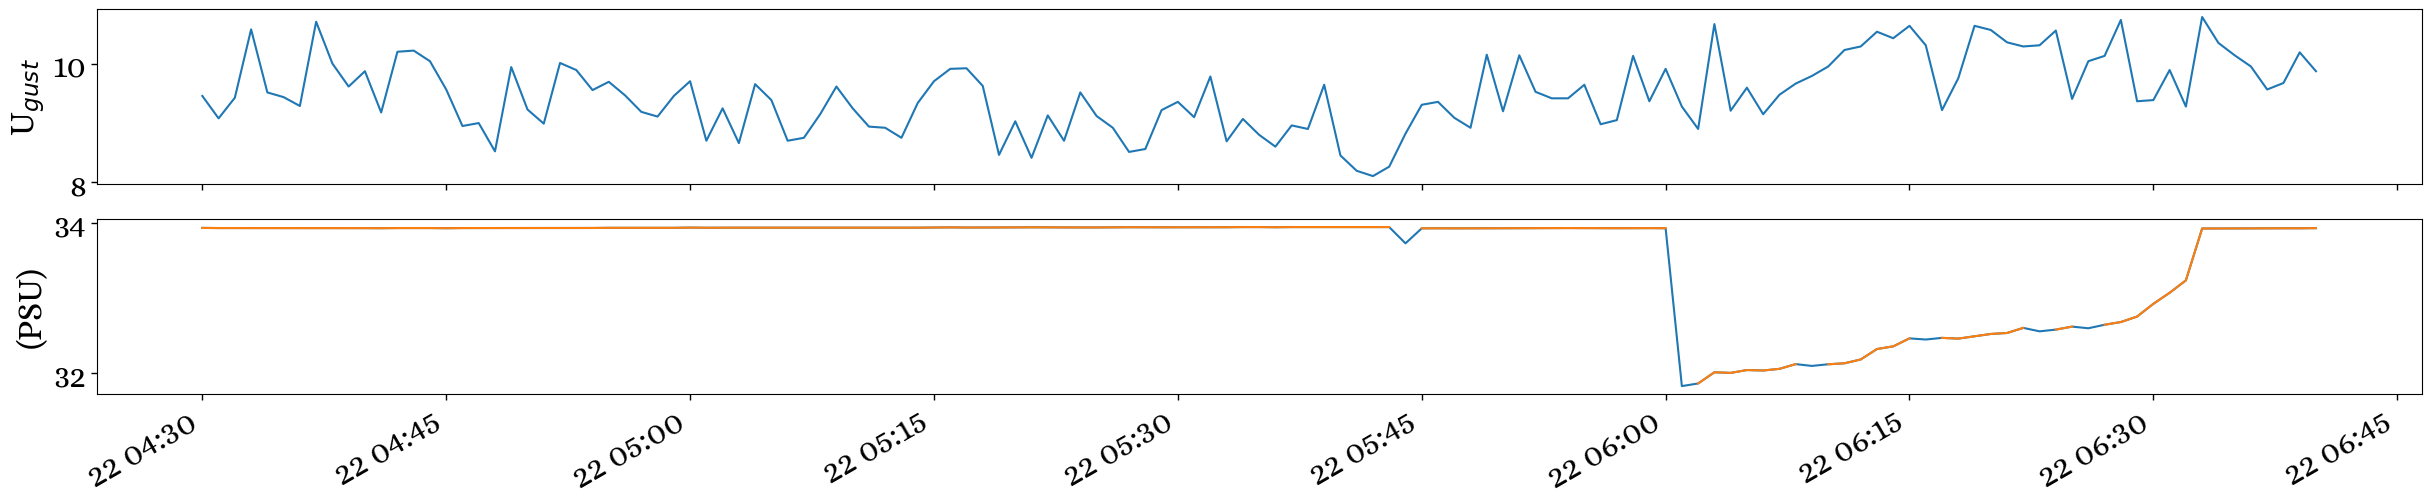

In [332]:
fig,ax = plt.subplots(2,1,figsize=(30,5),sharex=True)

ds20["GUST_WND_MEAN"].sel(time=slice("2019-03-22 04:30","2019-03-22 06:40")).plot(ax=ax[0])

ds20["SAL_RBR_MEAN"].sel(time=slice("2019-03-22 04:30","2019-03-22 06:40")).plot(ax=ax[1])
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 60, 95).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).interpolate_na("time").plot()
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 2, 99).sel(time=slice("2019-03-22 04:30","2019-03-22 06:40")).plot(ax=ax[1])
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 15, 95).sel(time="2019-04-17 05").plot()

for axs,y in zip(ax,[r"U$_{gust}$", "(PSU)"]):
    axs.set(title="",xlabel="",ylabel=y)

In [133]:
spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
for i in range(len(dS)):
    if (dS[i] < -threshold) & (True in (dS[i:i+lag] > threshold)): # Check if time difference is less than negative threshold and that there is an upspike within the allowed interval
        start_idx = i  # Start from the maximum possible index within the lag window
        end_idx = i + np.where((dS[i:i+lag] > threshold) == True)[0][0]  # End at the current index
        spikes[start_idx:end_idx] = True  # Mark the spike region for removal

In [128]:
for i in range(len(dS)):
    if (dS[i] < -threshold) & (True in (dS[i:i+5] > threshold)):
        print(i,"Start of spike")
        print(i+np.where((dS[i:i+5] > threshold) == True)[0][0],"End of spike")
        

2 Start of spike
5 End of spike


In [141]:
# Example usage
salinity = np.array([35, 35, 33, 33, 35, 33, 35, 35], dtype=float)  # Example salinity data
dS = np.diff(salinity)  # Compute time difference of salinity
threshold = 1#np.percentile(dS, 95)  # Calculate the 95th percentile of dS
lag = 5  # Lag window size

spikes_with_lag = detect_spikes_with_lag(dS, lag, 1)
print("Spike indices with lag:", np.where(spikes_with_lag)[0])

# Output cleaned salinity array
cleaned_salinity = salinity.copy()
cleaned_salinity[np.concatenate(([False], spikes_with_lag))] = np.nan  # Adjust for the difference in dimensions
print("Cleaned salinity:", cleaned_salinity)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 8

In [106]:
dS

array([ 0.,  0., -2.,  0.,  0.,  2.,  0.])

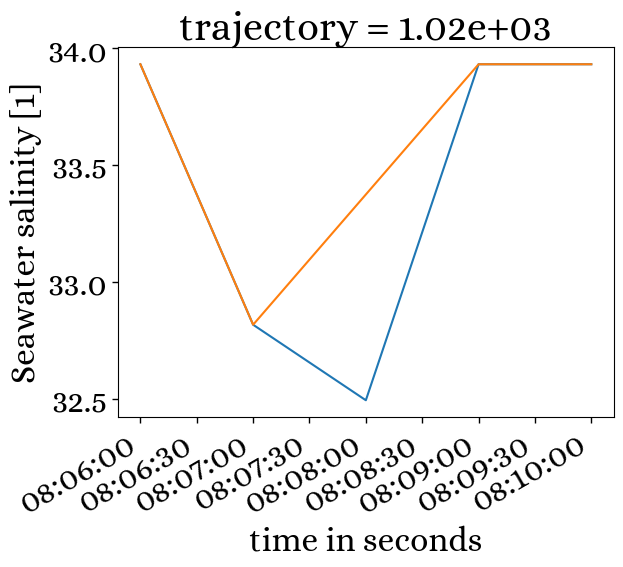

In [70]:
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).plot()
qc_salinity(ds20,"SAL_RBR_MEAN",95,1).sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).plot()

In [58]:
one   = qc_salinity(ds20,"SAL_RBR_MEAN",95)
two   = qc_salinity(one,"SAL_RBR_MEAN",95)
three = qc_salinity(two,"SAL_RBR_MEAN",95)
four  = qc_salinity(three,"SAL_RBR_MEAN",95)
five  = qc_salinity(four,"SAL_RBR_MEAN",95)

KeyError: 'SAL_RBR_MEAN'

In [57]:
ds20

<xarray.Dataset>
Dimensions:                         (time: 282271)
Coordinates:
    latitude                        (time) float64 ...
    longitude                       (time) float64 ...
  * time                            (time) datetime64[ns] 2019-01-19T04:00:00...
    trajectory                      float32 1.02e+03
Data variables: (12/49)
    SOG                             (time) float64 1.762 1.361 ... 3.646 3.824
    COG                             (time) float64 119.8 118.8 ... 318.2 314.0
    HDG                             (time) float64 108.2 104.8 ... 317.3 312.8
    HDG_WING                        (time) float64 107.1 103.7 ... 107.3 107.3
    WING_ANGLE                      (time) float64 -1.1 -1.1 0.0 ... 147.8 151.5
    UWND_MEAN                       (time) float64 13.7 nan nan ... nan nan nan
    ...                              ...
    O2_SAT_RBR_MEAN                 (time) float64 96.29 96.24 ... 96.11 96.05
    O2_SAT_RBR_STDDEV               (time) float64 0.09 0.04 0.04 ... 0.07 0.09
    TEMP_O2_RBR_MEAN                (time) float64 15.68 15.67 ... 9.876 9.871
    TEMP_O2_RBR_STDDEV              (time) float64 0.002 0.002 ... 0.006 0.012
    CHLOR_RBR_MEAN                  (time) float64 1.505 1.534 ... 69.34 52.6
    CHLOR_RBR_STDDEV                (time) float64 0.0268 0.1127 ... 1.73 1.385
Attributes: (12/38)
    title:                     Antarctica Circumnavigation Surface Data
    summary:                   This data set was collected from the first Sai...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    ...                        ...
    geospatial_lat_min:        -60.9862208
    geospatial_lat_max:        -46.4277568
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        -179.9986816
    geospatial_lon_max:        179.9997312
    geospatial_lon_units:      degrees_east

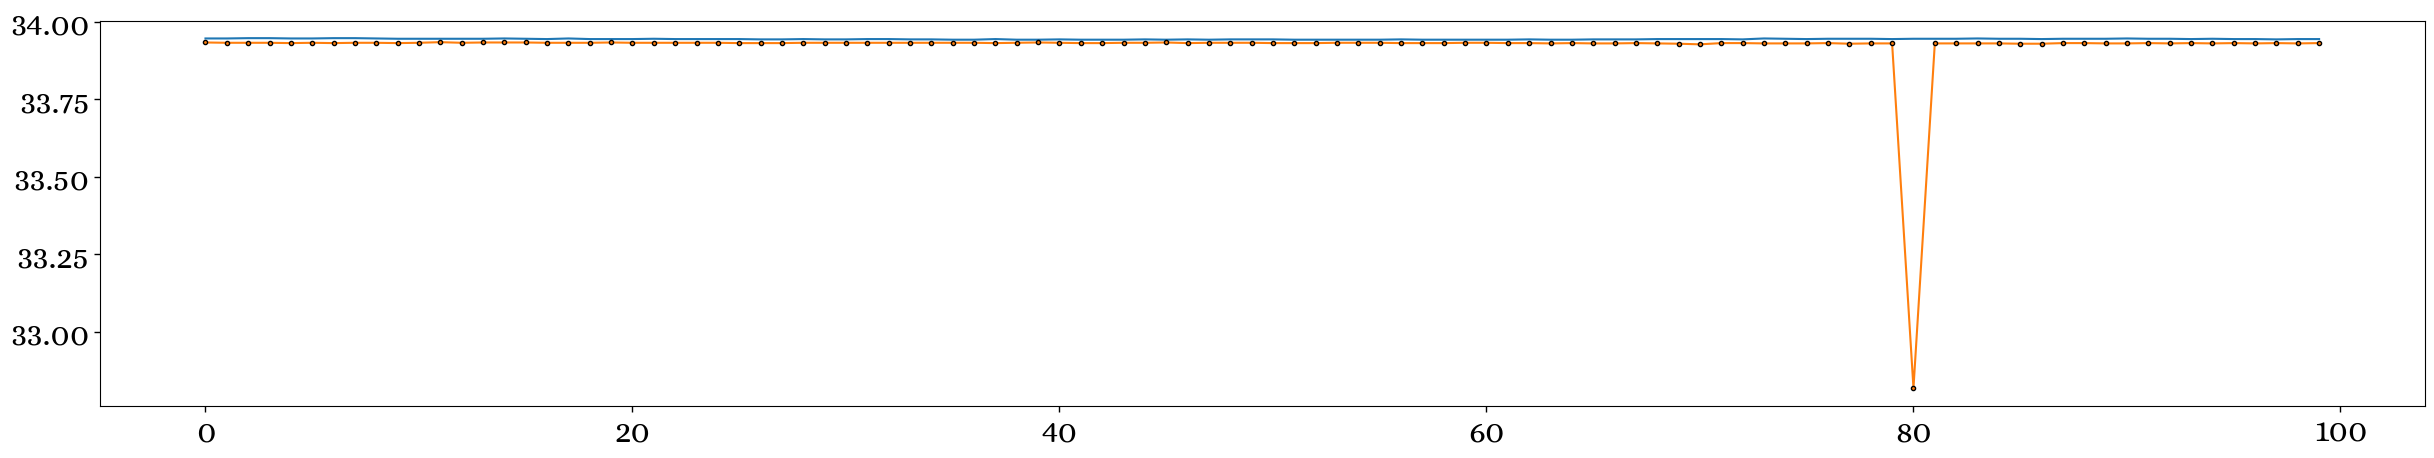

In [34]:
#ds20["SAL_RBR_MEAN"][:100000].plot()
plt.figure(figsize=(30,5))
plt.plot(ds20["SAL_RBR_MEAN"][27300:27400].values)
plt.plot(ds20["SAL_RBR_MEAN"][idx][27300:27400].values,marker='.',mec='k')

TypeError: No numeric data to plot.

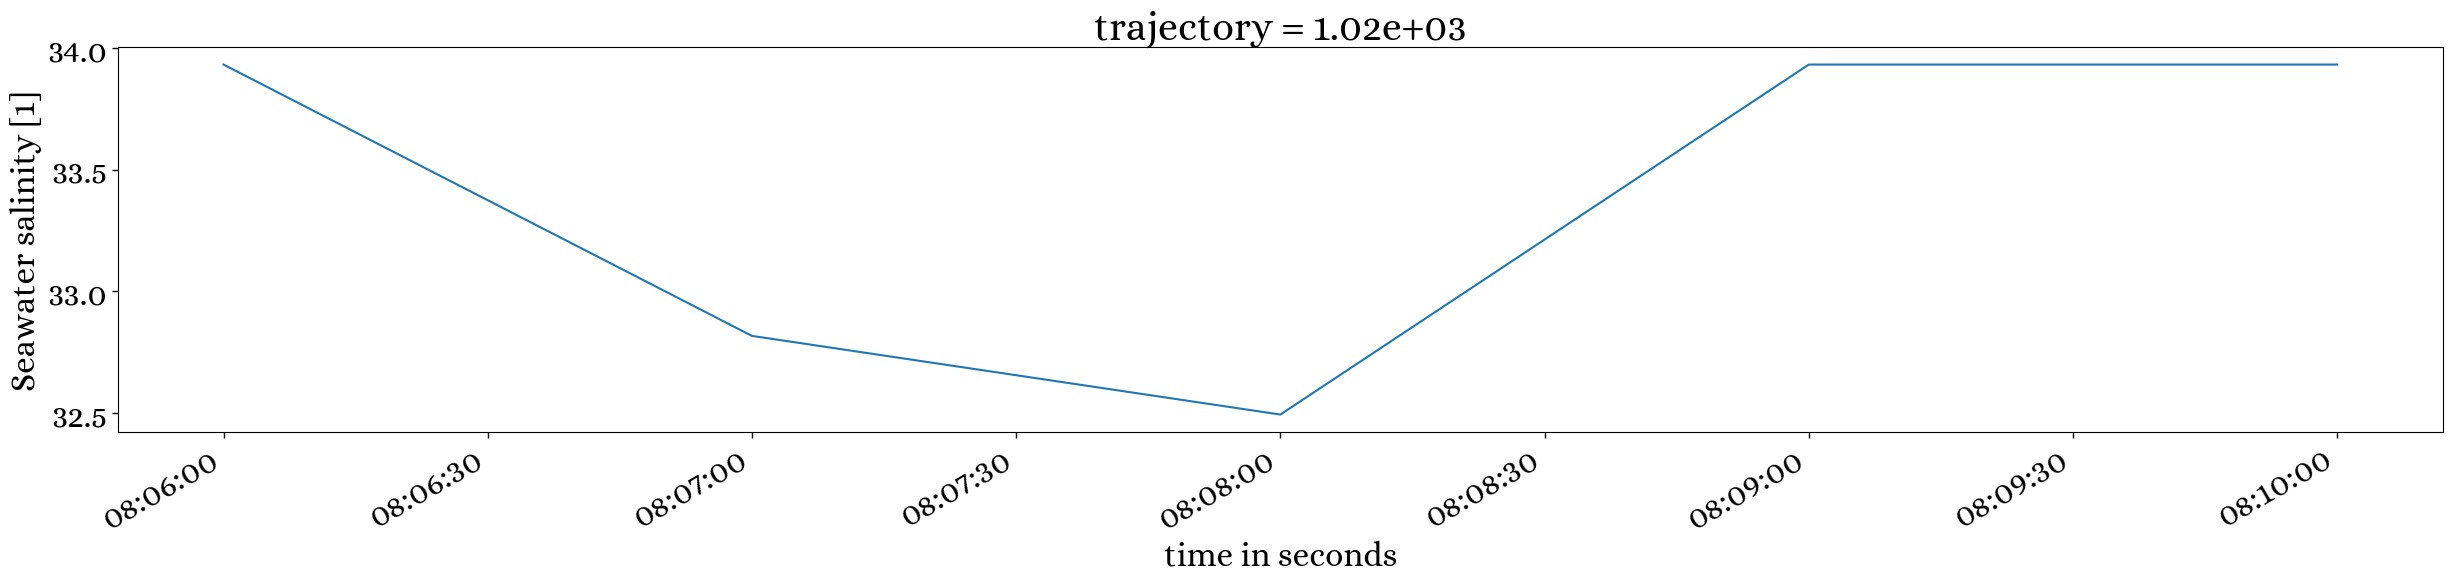

In [59]:
plt.figure(figsize=(30,5))
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).plot()
ds20["SAL_RBR_MEAN"][idx].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).resample(time="1min").mean("time").interpolate_na("time").plot()

In [ ]:
def qc_salinity(ds,variable,percentile):
    
    dS = np.diff(ds[variable])
    lim = np.nanpercentile(dS,percentile)
    bad = np.abs(ds) > lim
    idx = np.where(~((ds[:-1] < 0) & (ds[1:] > 0) & (bad[1:])))[0]+1
    
    
    

In [43]:
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).values

array([33.931, 32.817, 32.494, 33.931, 33.931])

In [54]:
ds20["SAL_RBR_MEAN"][idx].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).resample(time="1min").mean("time").interpolate_na("time").values

array([33.931, 32.817, 33.374, 33.931, 33.931])

In [60]:
def find_spike_indices(ds, variable, percentile):
    dS = np.diff(ds[variable])
    lim = np.nanpercentile(dS, percentile)
    bad = np.abs(dS) > lim
    
    spike_indices = []
    start_idx = None
    
    for i in range(len(dS)):
        if bad[i]:
            if start_idx is None:
                start_idx = i
        elif start_idx is not None:
            spike_indices.append(start_idx + 1)  # Adding 1 to account for np.diff()
            start_idx = None
    
    if start_idx is not None:
        spike_indices.append(start_idx + 1)  # Adding 1 to account for np.diff() for the last spike
    
    return spike_indices

idx = find_spike_indices(ds20, "SAL_RBR_MEAN", 95)
#print("Spike indices:", idx)

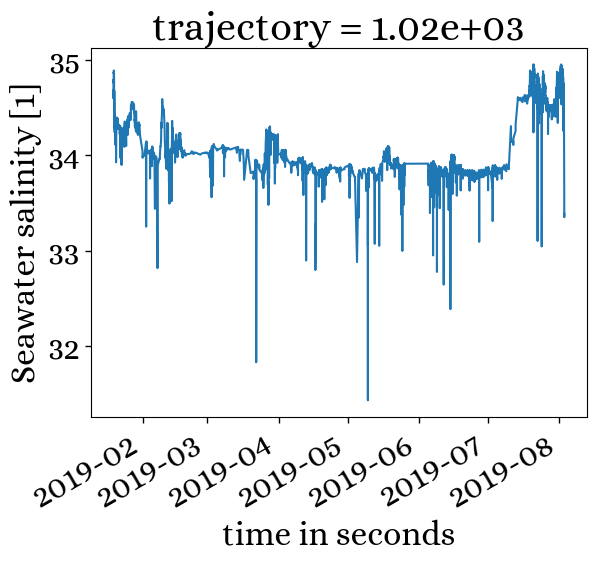

In [63]:
ds20["SAL_RBR_MEAN"][idx].plot()

In [64]:
def find_spike_indices(ds, variable, percentile):
    dS = np.diff(ds[variable])
    lim = np.nanpercentile(dS, percentile)
    bad = np.abs(dS) > lim
    #idx = np.where(~((dS[:-1] < 0) & (dS[1:] > 0) & (bad[1:])))[0] + 1
    
    spike_indices = []
    start_idx = None
    
    for i, val in enumerate(idx):
        if start_idx is None:
            start_idx = val
        elif len(spike_indices) == 0 or val - spike_indices[-1] > 1:
            spike_indices.append(start_idx)
            start_idx = val
        elif i == len(idx) - 1:
            spike_indices.append(start_idx)
        else:
            continue
    
    return spike_indices

idx = find_spike_indices(ds20, "SAL_RBR_MEAN", 95)
#print("Spike indices:", idx)

In [76]:
import numpy as np

def detect_spikes(data, threshold):
    """
    Detect spikes in a time series data based on a threshold.
    
    Parameters:
        data (ndarray): 1D array of the time series data.
        threshold (float): Threshold for detecting spikes.
    
    Returns:
        ndarray: Boolean array indicating spike locations.
    """
    differences = np.diff(data)
    sign_changes = np.sign(differences[:-1]) != np.sign(differences[1:])
    return np.abs(differences[1:]) > threshold, sign_changes

def remove_spikes(data, spikes, sign_changes):
    """
    Remove spikes from the time series data.
    
    Parameters:
        data (ndarray): 1D array of the time series data.
        spikes (ndarray): Boolean array indicating spike locations.
        sign_changes (ndarray): Boolean array indicating sign changes.
    
    Returns:
        ndarray: Cleaned time series data with spikes removed.
    """
    cleaned_data = data.copy()
    # Iterate over the spikes and remove the corresponding values if there's a sign change
    for i in range(len(spikes)):
        if spikes[i] and sign_changes[i]:
            cleaned_data[i+1] = np.nan  # Set the spike value to NaN
    return cleaned_data

In [78]:
# Example usage
salinity = np.array([33.931, 30, 30, 33.931, 33.931])
threshold = 1.0  # Adjust the threshold as needed

spikes, sign_changes = detect_spikes(salinity, threshold)
cleaned_salinity = remove_spikes(salinity, spikes, sign_changes, threshold)

print("Spike indices:", np.where(spikes)[0])
print("Raw salinity:", salinity)
print("Cleaned salinity:", cleaned_salinity)


Spike indices: [1]
Raw salinity: [33.931 30.    30.    33.931 33.931]
Cleaned salinity: [   nan    nan 30.    33.931 33.931]


In [49]:
ds = np.diff(ds20["SAL_RBR_MEAN"])

In [50]:
ds

array([ 0.02 , -0.008, -0.004, ...,  0.001, -0.039,  0.043])

In [51]:
lim = np.nanpercentile(ds,95)

In [52]:
lim

0.006000000000000227

In [7]:
bad = np.abs(ds) > lim

In [17]:
idx = np.where(~((ds[:-1] < 0) & (ds[1:] > 0) & (bad[1:])))[0]+1

In [13]:
idx

array([     1,      2,      4, ..., 282266, 282267, 282268])

In [ ]:
idx

array([     1,      2,      4, ..., 282266, 282267, 282268])

In [ ]:
def qc_salinity(ds, variable, percentile, nsteps):
    
    idx = range(len(ds["time"]))
    
    for n in range(nsteps):
        dS = np.diff(ds[variable][idx])
        lim = np.nanpercentile(dS,percentile)
        bad = np.abs(dS) > lim
        idx = np.where(~((dS[:-1] < 0) & (dS[1:] > 0) & (bad[1:])))[0]+1
    
    return ds[variable][idx].interpolate_na("time")

In [63]:
def qc_salinity(ds, variable, percentile, nsteps):
    
    idx = range(len(ds["time"]))
    
    for n in range(nsteps):
        dS = np.diff(ds[variable][idx])
        lim = np.nanpercentile(dS,percentile)
        bad = np.abs(dS) > lim
        idx = np.where(~((dS[:-1] < 0) & (dS[1:] > 0) & (bad[1:])))[0]+1
    
    return ds[variable][idx].interpolate_na("time")

In [97]:
def detect_spikes_with_lag(dS, lag):
    """
    Detect spikes with lag based on the time difference of salinity.

    Parameters:
        dS (ndarray): Time difference of salinity.
        lag (int): Lag window size.

    Returns:
        ndarray: Boolean array indicating spike locations.
    """
    spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
    for i in range(len(dS)):
        if dS[i] < -threshold:  # Check for negative spike
            start_idx = max(0, i - lag)+1
            end_idx = min(len(dS), i + lag + 1)
            for j in range(i + 1, end_idx):  # Look ahead for positive spike within lag window
                if dS[j] > threshold:  # Check for positive spike
                    spikes[start_idx:j] = True  # Mark the spike region for removal
                    break
    return spikes[:-1]  # Remove the last element to match the length of dS

# Example usage
salinity = np.array([35, 35, 33, 33, 33, 35, 35, 35], dtype=float)  # Example salinity data
dS = np.diff(salinity)  # Compute time difference of salinity
threshold = 1#np.percentile(dS, 95)  # Calculate the 95th percentile of dS
lag = 5  # Lag window size

spikes_with_lag = detect_spikes_with_lag(dS, lag)
print("Spike indices with lag:", np.where(spikes_with_lag)[0])

# Output cleaned salinity array
cleaned_salinity = salinity.copy()
cleaned_salinity[np.concatenate(([False], spikes_with_lag))] = np.nan  # Adjust for the difference in dimensions
print("Cleaned salinity:", cleaned_salinity)


Spike indices with lag: [1 2 3]
Cleaned salinity: [35. 35. nan nan nan 35. 35. 35.]


In [201]:
def detect_spikes_with_lag(data, lag, percentile):
    """
    Detect spikes with lag based on the time difference of salinity.

    Parameters:
        data (ndarray): 1D array of the time series data.
        lag (int): Lag window size.

    Returns:
        ndarray: Boolean array indicating spike locations.
        ndarray: Cleaned time series data with spikes removed.
    """
    # Calculate time differences (dS)
    dS = np.diff(data)

    # Calculate the threshold based on a percentile of dS
    threshold = np.nanpercentile(np.abs(dS), percentile)
    
    spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
    for i in range(len(dS)):
        if (dS[i] <= -threshold) and (True in (dS[i:i+lag] >= threshold)):
            # Check if time difference is less than negative threshold and that there is an upspike within the allowed interval
            start_idx = i  # Start from the maximum possible index within the lag window
            end_idx = i + np.where((dS[i:i+lag] >= threshold) == True)[0][0]  # End at the current index
            spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal

    cleaned_data = data.copy()
    cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions

    return cleaned_data

In [315]:
def detect_spikes_with_lag(data, lag, percentile):
    """
    Detect spikes with lag based on the time difference of salinity.

    Parameters:
        data (ndarray): 1D array of the time series data.
        lag (int): Lag window size.
        percentile (float): Percentile for calculating the threshold.

    Returns:
        ndarray: Boolean array indicating spike locations.
        ndarray: Cleaned time series data with spikes removed.
    """
    # Calculate time differences (dS)
    dS = np.diff(data)

    # Calculate the threshold based on a percentile of dS
    threshold = np.nanpercentile(np.abs(dS), 95)

    spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
    i = 0
    while i < len(dS):
        if (dS[i] <= -threshold) & (len(np.where(dS[i:i+lag] >= threshold)[0]) > 0):
            # Check if time difference is less than negative threshold
            start_idx = i  # Start from the maximum possible index within the lag window

            # Find the maximum positive change within the lag window
            max_positive_change_idx = i + np.argmax(np.where(dS[i:i+lag] >= threshold)[0])
            end_idx = max_positive_change_idx + 1  # End at the maximum positive change index

            spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
            i = max_positive_change_idx + 1  # Move to the next index after the spike region
        else:
            i += 1  # Move to the next index

    cleaned_data = data.copy()
    cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions

    return cleaned_data

In [ ]:
# Calculate time differences (dS)
dS = np.diff(data)

# Calculate the threshold based on a percentile of dS
threshold = np.nanpercentile(np.abs(dS), percentile)

spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
i = 0
while i < len(dS):
    if dS[i] <= -threshold:
        # Check if time difference is less than negative threshold
        start_idx = i  # Start from the maximum possible index within the lag window

        # Find the maximum positive change within the lag window
        max_positive_change_idx = i + np.argmax(dS[i:i+lag] >= threshold)
        end_idx = max_positive_change_idx + 1  # End at the maximum positive change index

        spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
        i = max_positive_change_idx + 1  # Move to the next index after the spike region
    else:
        i += 1  # Move to the next index

cleaned_data = data.copy()
cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions



In [316]:
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 95)

<xarray.DataArray 'SAL_RBR_MEAN' (time: 282271)>
array([34.656, 34.676, 34.668, ..., 33.424,    nan, 33.428])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T04:00:00 ... 2019-08-03T04:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [ ]:
np.percentile(np.abs(np.diff(salinity)), 50)

2.0

In [ ]:
# Calculate time differences (dS)
dS = np.diff(ds20["SAL_RBR_MEAN"])

# Calculate the threshold based on a percentile of dS
threshold = np.nanpercentile(np.abs(dS), 95)
lag = 10


spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
for i in range(len(dS)):
    if (dS[i] <= -threshold) and (True in (dS[i:i+lag] >= threshold)):
        # Check if time difference is less than negative threshold and that there is an upspike within the allowed interval
        start_idx = i  # Start from the maximum possible index within the lag window
        end_idx = i + np.where((dS[i:i+lag] >= threshold) == True)[0][0]  # End at the current index
        spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
        
cleaned_data = ds20["SAL_RBR_MEAN"].copy()
cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions


In [ ]:
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).diff("time")

<xarray.DataArray 'SAL_RBR_MEAN' (time: 50)>
array([ 1.000e-03,  1.000e-03,  1.000e-03,  0.000e+00, -1.000e-03,
        0.000e+00, -1.000e-03,  1.000e-03,  0.000e+00, -1.000e-03,
       -2.105e+00,  3.500e-02,  1.490e-01, -8.000e-03,  3.800e-02,
       -6.000e-03,  2.200e-02,  6.300e-02, -2.400e-02,  2.200e-02,
        1.300e-02,  5.100e-02,  1.390e-01,  3.600e-02,  1.060e-01,
       -1.500e-02,  2.200e-02, -1.000e-02,  3.100e-02,  3.100e-02,
        1.300e-02,  6.800e-02, -4.600e-02,  2.300e-02,  4.000e-02,
       -2.200e-02,  4.700e-02,  3.600e-02,  7.300e-02,  1.700e-01,
        1.470e-01,  1.660e-01,  6.910e-01,  0.000e+00,  1.000e-03,
        1.000e-03,  0.000e+00,  1.000e-03,  0.000e+00,  2.000e-03])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-03-22T05:51:00 ... 2019-03-22T06:4...
    trajectory  float32 1.02e+03

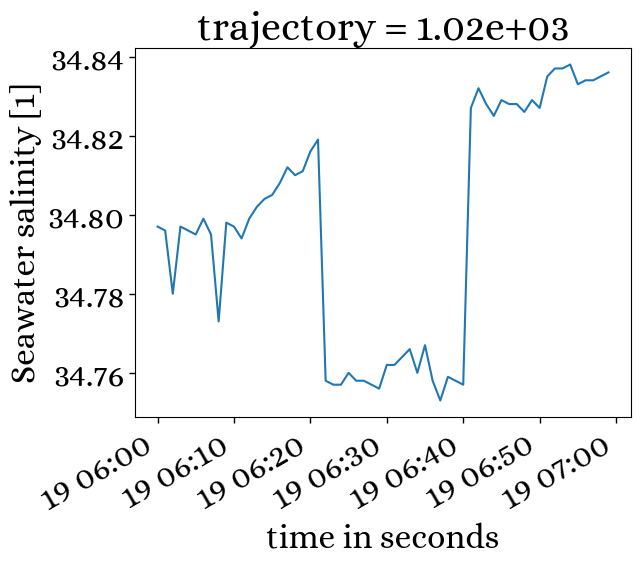

In [357]:
data[120:120+60].plot()

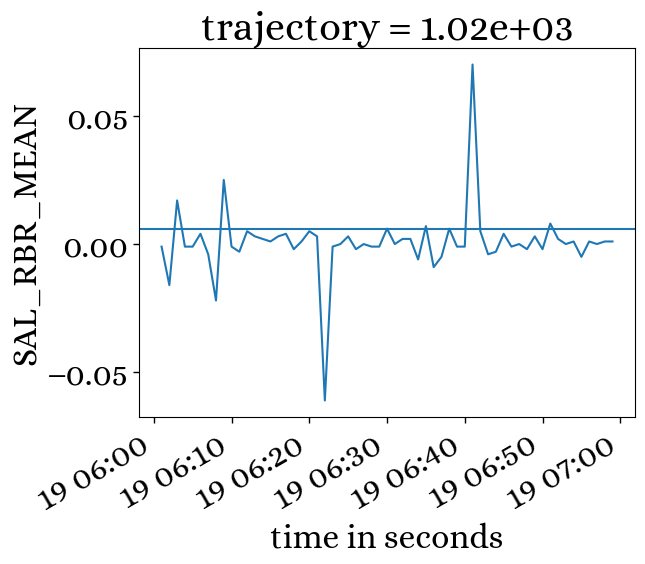

In [362]:
data[120:120+60].diff("time").plot()
plt.axhline(0.006)

In [375]:
np.where(np.diff(data)[120:120+60] > 0.006)[0][0]

2

In [376]:
np.where(np.diff(data)[120:120+60] < 0.006)[0][0]

0

In [385]:
data[100:100+60]

<xarray.DataArray 'SAL_RBR_MEAN' (time: 60)>
array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812, 34.813,
       34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806, 34.804, 34.799,
       34.798, 34.799, 34.797, 34.796, 34.78 , 34.797, 34.796, 34.795, 34.799,
       34.795, 34.773, 34.798, 34.797, 34.794, 34.799, 34.802, 34.804, 34.805,
       34.808, 34.812, 34.81 , 34.811, 34.816, 34.819, 34.758, 34.757, 34.757,
       34.76 , 34.758, 34.758, 34.757, 34.756, 34.762, 34.762, 34.764, 34.766,
       34.76 , 34.767, 34.758, 34.753, 34.759, 34.758])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T06:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

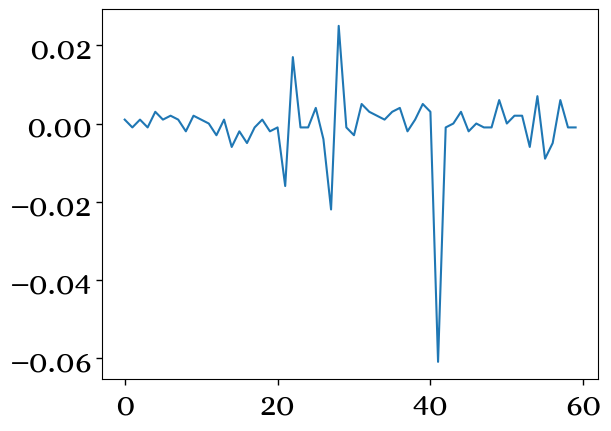

In [393]:
plt.plot(dS[100:100+60])

In [744]:
hanna = ds20[variable+"_MEAN"].where(ds20["SAL_RBR_STDDEV"]<0.01)[100:100+100]

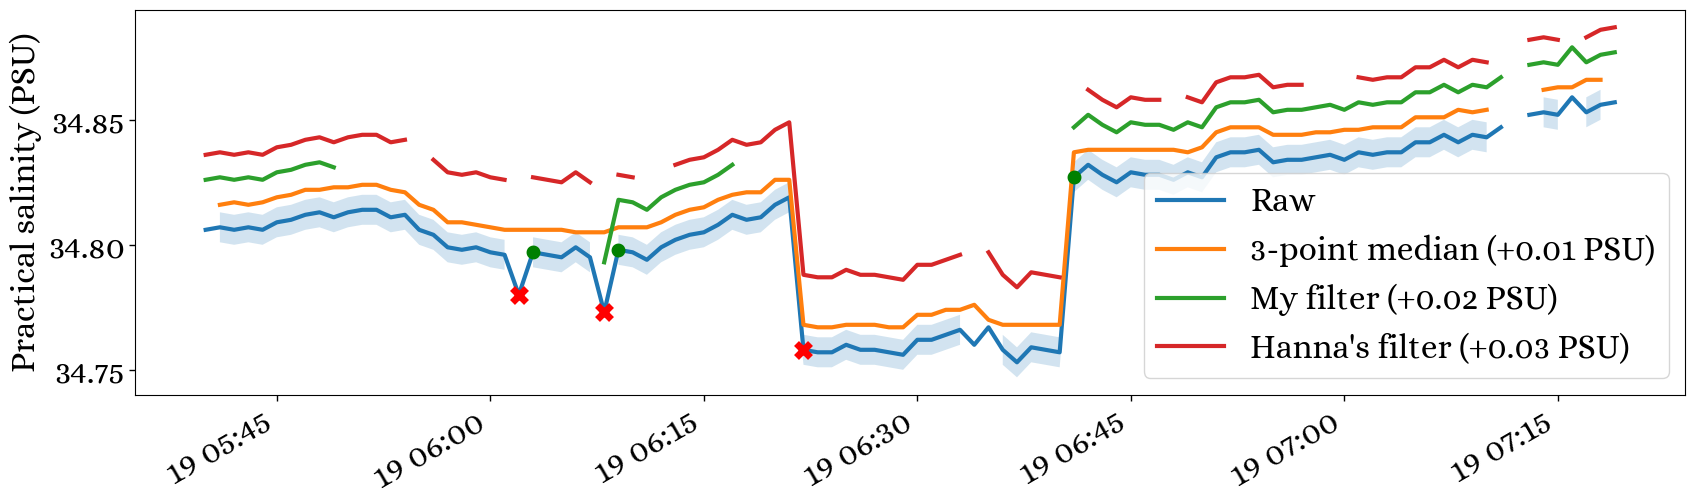

In [750]:
fig,ax = plt.subplots(figsize=(20,5))

data[100:100+100].plot(lw=3,label="Raw")
(data[100:100+100].rolling(time=3,center=True).median("time")+0.01).plot(lw=3,label="3-point median (+0.01 PSU)")
(cleaned_data+0.02).plot(lw=3,label="My filter (+0.02 PSU)")
#data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=3,center=True).median("time")) < 0.006).plot(lw=3,label="Stina's filter")

ax.fill_between(data[100:100+100]["time"],
                data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=3,center=True).median("time")) < 0.006)-0.006,
                data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=3,center=True).median("time")) < 0.006)+0.006,
                fc="C0",alpha=0.2)


dS = np.diff(data)
downspike = (np.where(dS[100:100+100] < -0.01)[0]+1)
upspike = (np.where(dS[100:100+100] > 0.01)[0]+1)

# ax.axhline(data[100:100+100][41]-0.01)
# ax.axhline(data[100:100+100][41]+0.01)


plt.plot(data["time"][100:100+100][downspike],data[100:100+100][downspike],marker="x",c="r",ls="",mew=5,ms=10)
plt.plot(data["time"][100:100+100][upspike],data[100:100+100][upspike],marker=".",c="g",ls="",mew=5,ms=10)

ax.plot(hanna.time,hanna+0.03,lw=3,label="Hanna's filter (+0.03 PSU)",zorder=3,c='C3',ls='-')


ax.set(title="", xlabel="",ylabel="Practical salinity (PSU)")
ax.legend()

In [ ]:
dist = np.insert(np.cumsum(gsw.distance(data.longitude,data.latitude)),0,0)

In [ ]:
(data["time"]-data["time"][0]).values.astype("timedelta64[m]")

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='timedelta64[m]')

In [ ]:
data["minutes"] = ("time"),(data["time"]-data["time"][0]).values.astype("timedelta64[m]")

In [558]:
range_threshold = 30
data_threshold  = 0.01

data = ds20["SAL_RBR_MEAN"].copy()
dS = np.diff(data)

downspike = (np.where(dS <= -data_threshold)[0]+1)
upspike = (np.where(dS >= data_threshold)[0]+1)



# Create a mask array with False values
mask = np.zeros(len(data), dtype=bool)

# Set True for indices between matched pairs of downspike and upspike
for down_idx in downspike:
    for up_idx in upspike:
        if down_idx + 1 <= up_idx <= down_idx + range_threshold:
            mask[down_idx:up_idx] = True
            break  # Exit the inner loop if a corresponding index is found

# Set the masked elements to NaN in your data array
clean_data = data.copy()
clean_data[mask] = np.nan


data["minutes"] = ("time"),((data["time"]-data["time"][0]).values.astype("timedelta64[m]")).astype(int)
clean_data["minutes"] = ("time"),((data["time"]-data["time"][0]).values.astype("timedelta64[m]")).astype(int)

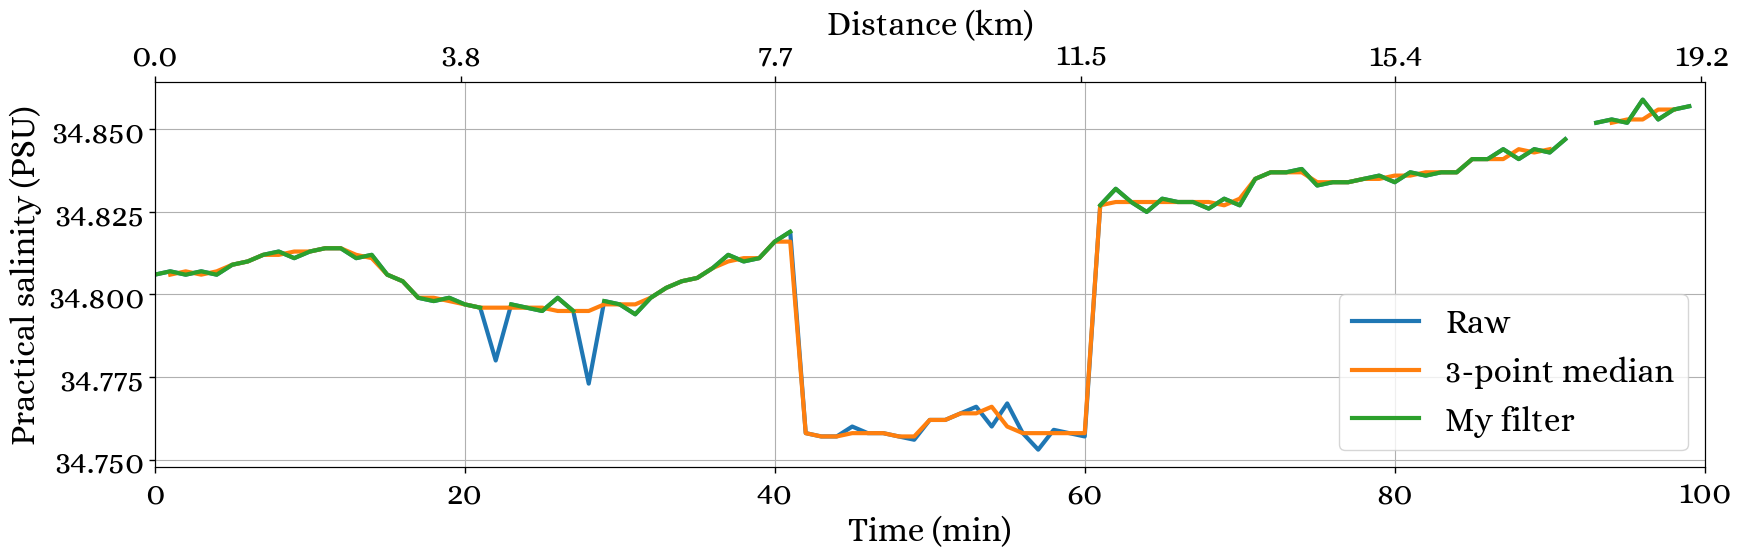

In [557]:
fig,ax = plt.subplots(figsize=(20,5))

data.plot(x="minutes",lw=3,label="Raw")
data.rolling(time=3,center=True).median("time").plot(x="minutes",lw=3,label="3-point median")
clean_data.plot(x="minutes",lw=3,label="My filter")

bx=ax.twiny()
bx.set(xlabel="Distance (km)",xlim=(0,np.nanmax(dist/1000)))
bx.set_xticks(np.linspace(0,np.nanmax(dist/1000),6).round(1))

ax.set_xlim(0,100)

ax.set(title="", xlabel="Time (min)",ylabel="Practical salinity (PSU)")
ax.legend()
ax.grid()

In [650]:
ds20

<xarray.Dataset>
Dimensions:                         (time: 282271)
Coordinates:
    latitude                        (time) float64 ...
    longitude                       (time) float64 ...
  * time                            (time) datetime64[ns] 2019-01-19T04:00:00...
    trajectory                      float32 1.02e+03
Data variables: (12/50)
    SOG                             (time) float64 ...
    COG                             (time) float64 ...
    HDG                             (time) float64 ...
    HDG_WING                        (time) float64 ...
    WING_ANGLE                      (time) float64 ...
    UWND_MEAN                       (time) float64 ...
    ...                              ...
    O2_SAT_RBR_STDDEV               (time) float64 ...
    TEMP_O2_RBR_MEAN                (time) float64 ...
    TEMP_O2_RBR_STDDEV              (time) float64 ...
    CHLOR_RBR_MEAN                  (time) float64 ...
    CHLOR_RBR_STDDEV                (time) float64 ...
    Salinity_QC                     (time) float64 34.66 34.68 34.67 ... nan nan
Attributes: (12/38)
    title:                     Antarctica Circumnavigation Surface Data
    summary:                   This data set was collected from the first Sai...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    ...                        ...
    geospatial_lat_min:        -60.9862208
    geospatial_lat_max:        -46.4277568
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        -179.9986816
    geospatial_lon_max:        179.9997312
    geospatial_lon_units:      degrees_east

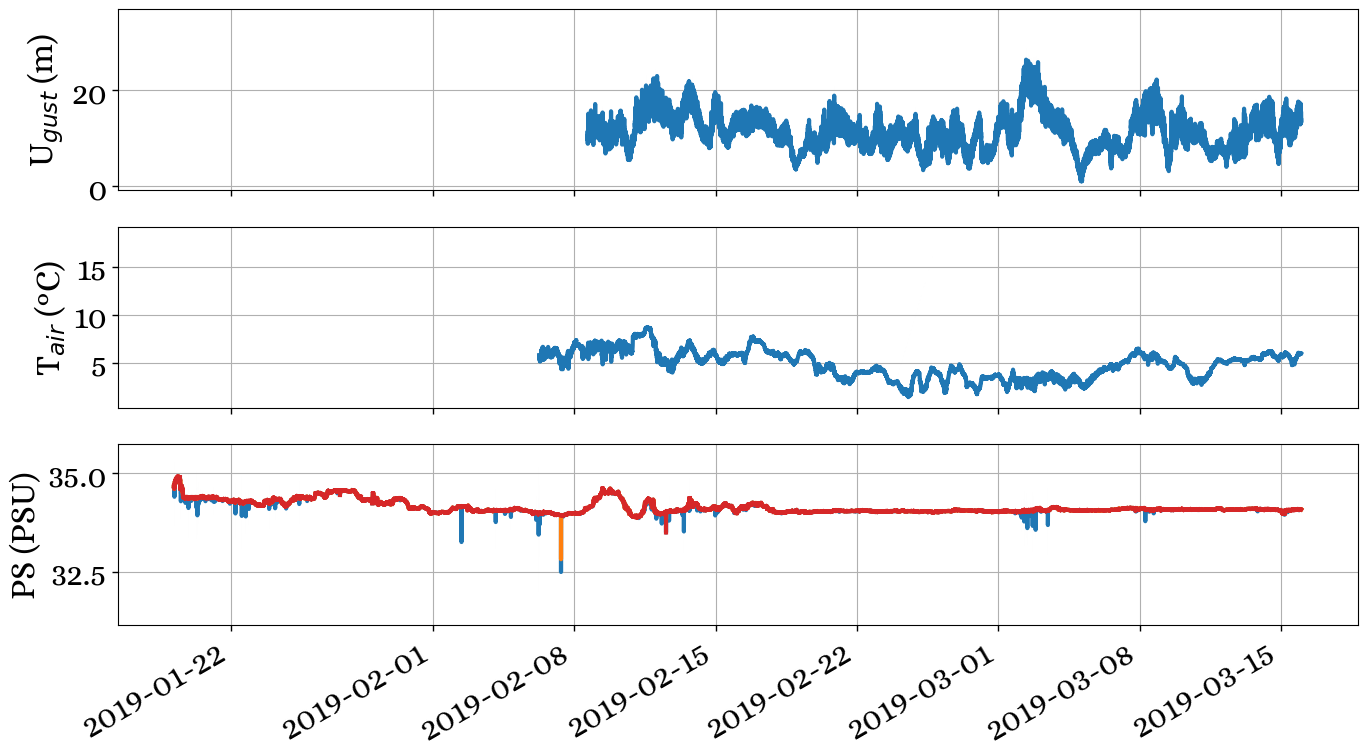

In [740]:
fig, ax = plt.subplots(3,1,figsize=(16,8),sharex=True)

interval = slice("2019-01-19","2019-03-15")

ds20["SAL_RBR_MEAN"].sel(time=interval).rolling(time=3,center=True).median("time").plot(lw=3,label="3-point median",ax=ax[2],zorder=3,c='C1')

for axs,variable,l in zip(ax,["GUST_WND","TEMP_AIR","SAL_RBR"],["U$_{gust}$ (m)", "T$_{air}$ (°C)","PS (PSU)"]):
    
    ds20[variable + "_MEAN"].sel(time=interval).plot(lw=3,label="Raw",ax=axs,c="C0",zorder=2)
    
    axs.fill_between(ds20["time"].sel(time=interval).values,
                    ds20[variable + "_MEAN"].sel(time=interval)+ds20[variable + "_STDDEV"].sel(time=interval),
                    ds20[variable + "_MEAN"].sel(time=interval)-ds20[variable + "_STDDEV"].sel(time=interval),
                    fc='C0',alpha=0.25)

    if "SAL" in variable:
        ds20[variable+"_MEAN"].sel(time=interval).rolling(time=5,center=True).median("time").plot(lw=3,label="5-point median",ax=axs,zorder=3,c='C1')
        ds20[variable+"_MEAN"].sel(time=interval).where(ds20["SAL_RBR_STDDEV"]<0.01).plot(lw=3,label="Hanna's filter",ax=axs,zorder=3,c='C3',ls='-')

    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

#axs.legend()

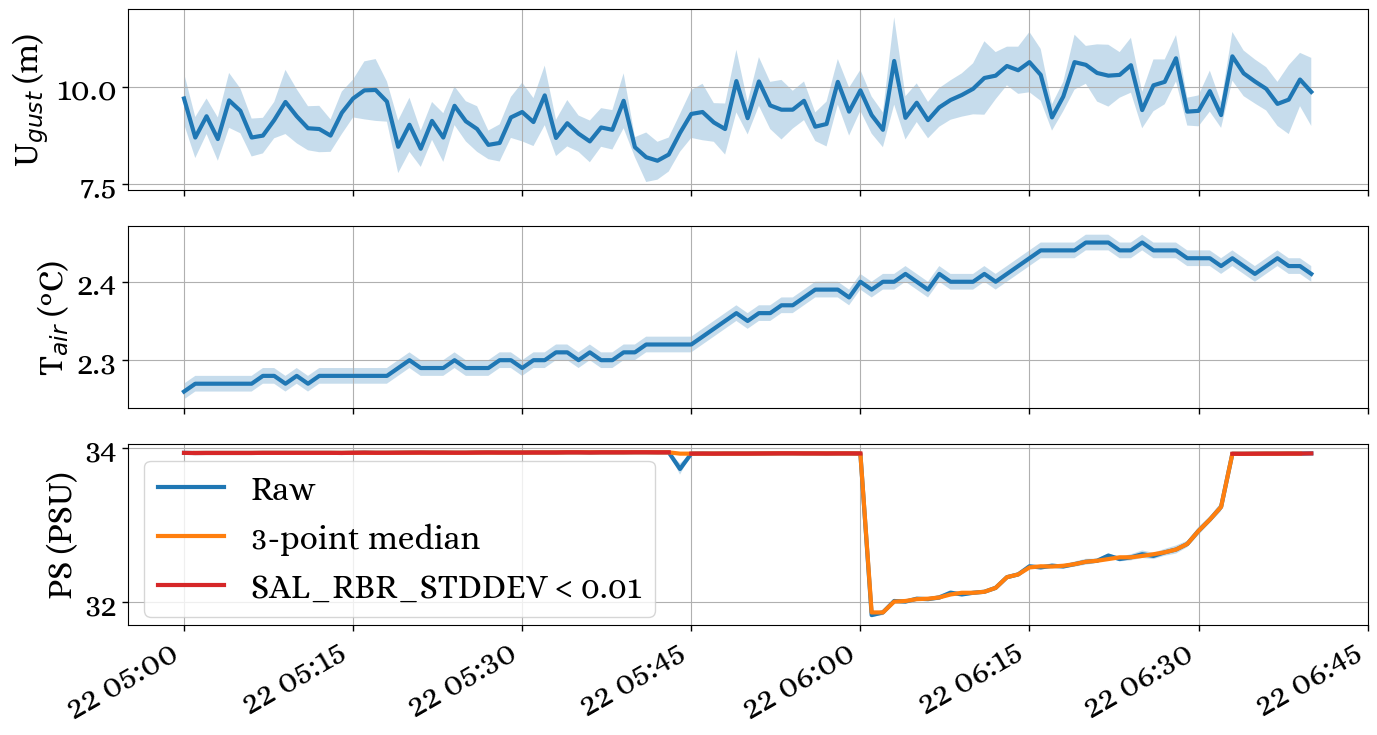

In [9]:
fig, ax = plt.subplots(3,1,figsize=(16,8),sharex=True)

interval = slice("2019-03-22 05:00","2019-03-22 06:40")

for i,(axs,variable,l) in enumerate(zip(ax,["GUST_WND","TEMP_AIR","SAL_RBR"],["U$_{gust}$ (m)", "T$_{air}$ (°C)","PS (PSU)"])):
    
    ds20[variable + "_MEAN"].sel(time=interval).plot(lw=3,label="Raw",ax=axs,c="C0",zorder=2)
    
    axs.fill_between(ds20["time"].sel(time=interval).values,
                    ds20[variable + "_MEAN"].sel(time=interval)+ds20[variable + "_STDDEV"].sel(time=interval),
                    ds20[variable + "_MEAN"].sel(time=interval)-ds20[variable + "_STDDEV"].sel(time=interval),
                    fc='C0',alpha=0.25)

    if "SAL" in variable:
        ds20[variable+"_MEAN"].sel(time=interval).rolling(time=3,center=True).median("time").plot(lw=3,label="3-point median",ax=axs,zorder=3,c='C1')
        ds20[variable+"_MEAN"].sel(time=interval).where(ds20["SAL_RBR_STDDEV"]<0.01).plot(lw=3,label="SAL_RBR_STDDEV < 0.01",ax=axs,zorder=3,c='C3',ls='-')

    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

axs.legend()



In [50]:
ds20["SALINITY_QC_MEAN"] = ds20["SAL_RBR_MEAN"].where(ds20["SAL_RBR_STDDEV"]<np.nanpercentile(ds20['SAL_RBR_STDDEV'].values,95).round(3)).interpolate_na("time")
ds20["SALINITY_QC_STDDEV"] = ds20["SAL_RBR_STDDEV"].where(ds20["SAL_RBR_STDDEV"]<np.nanpercentile(ds20['SAL_RBR_STDDEV'].values,95).round(3)).interpolate_na("time")

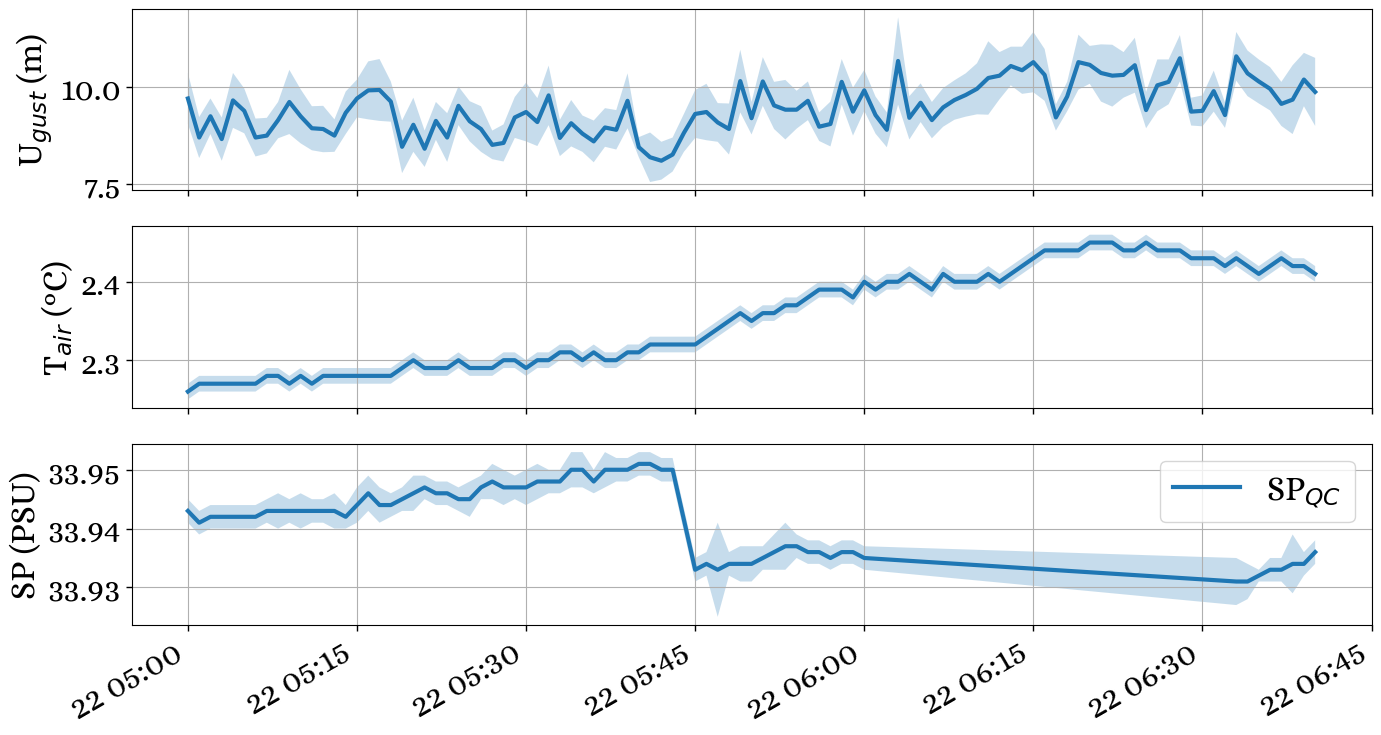

In [15]:
fig, ax = plt.subplots(3,1,figsize=(16,8),sharex=True)

interval = slice("2019-03-22 05:00","2019-03-22 06:40")

for i,(axs,variable,l) in enumerate(zip(ax,["GUST_WND","TEMP_AIR","SALINITY_QC"],["U$_{gust}$ (m)", "T$_{air}$ (°C)","SP (PSU)"])):
    
    ds20[variable + "_MEAN"].sel(time=interval).plot(lw=3,label="SP$_{QC}$" if "SAL" in variable else "Raw",ax=axs,c="C0",zorder=2)
    
    axs.fill_between(ds20["time"].sel(time=interval).values,
                    ds20[variable + "_MEAN"].sel(time=interval)+ds20[variable + "_STDDEV"].sel(time=interval),
                    ds20[variable + "_MEAN"].sel(time=interval)-ds20[variable + "_STDDEV"].sel(time=interval),
                    fc='C0',alpha=0.25)
    
    axs.set(title="", xlabel="",ylabel=l)
    axs.grid()    

axs.legend()



In [ ]:
fig,ax = plt.subplots(1,2,constrained_layout=True,figsize=(16,8),sharey=True)


h1=ax.hist(np.diff(ds20["SAL_RBR_MEAN"]),bins=np.arange(-2,2.01,0.01),zorder=2, histtype="stepfilled", lw=2, ec="C0",label="Raw")
h2=ax.hist(np.diff(ds20["SALINITY_QC_MEAN"]),bins=np.arange(-2,2.01,0.01),zorder=2, histtype="stepfilled", lw=2, ec="C1",label="STD < 0.01")

h3=ax.hist(ds20["SAL_RBR_STDDEV"],bins=np.arange(0,2,0.01),zorder=2, histtype="stepfilled", lw=2, ec="C1",label="STD < 0.01")

ax.set_yscale("log")
ax.grid(zorder=1)
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()


In [115]:
matplotlib.patches.FancyBboxPatch?

Object `matplotlib.patches.FancyBboxPatch` not found.


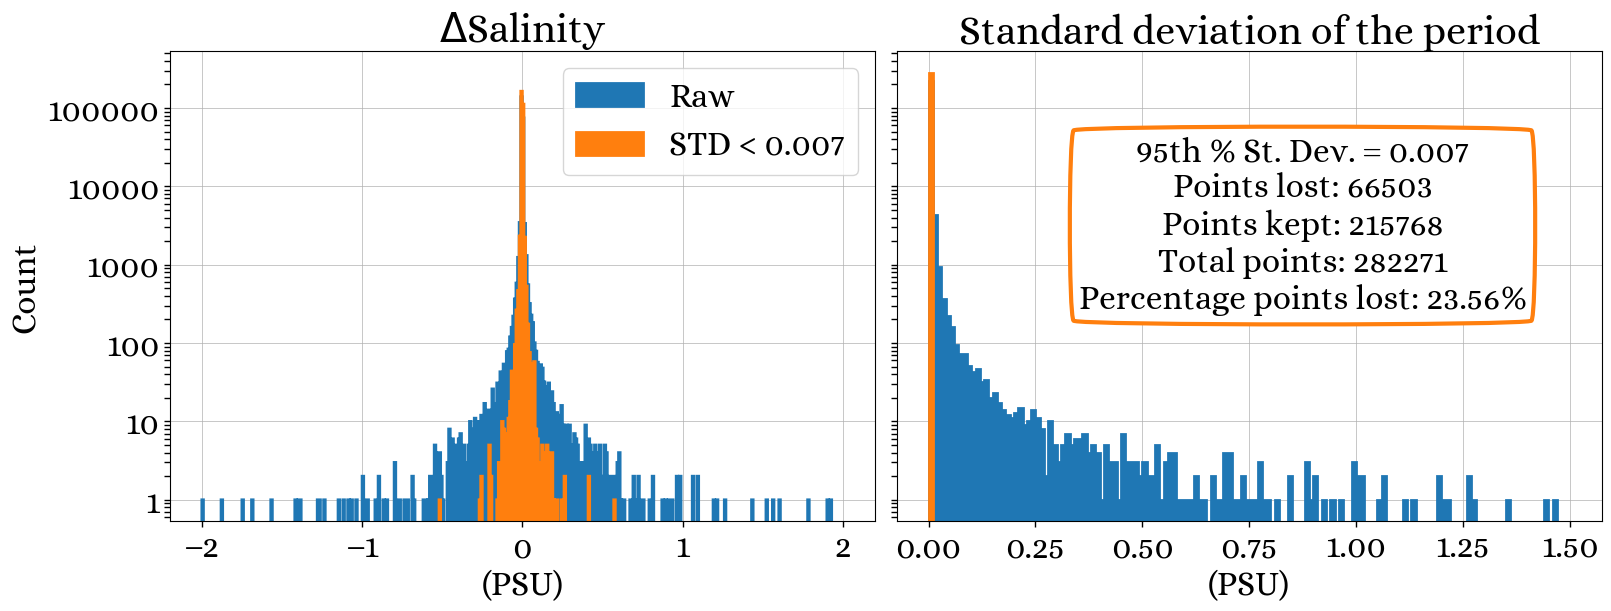

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Create subplots with constrained layout and shared y-axis
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(16, 6), sharey=True)

# Data and labels for plotting
data = [(np.diff(ds20["SAL_RBR_MEAN"]), np.diff(ds20["SALINITY_QC_MEAN"])),
        (ds20["SAL_RBR_STDDEV"], ds20["SALINITY_QC_STDDEV"])]
colors = ['C0', 'C1']
labels = [['Raw', f'STD < {np.nanpercentile(ds20["SAL_RBR_STDDEV"].values, 95):.3f}'], ['Raw St.Dev', 'QC St.Dev']]
bins = [np.arange(-2, 2.01, 0.01), np.arange(0, 1.51, 0.01)]
titles = [r'$\Delta$Salinity', 'Standard deviation of the period']
xlabels = ['(PSU)', '(PSU)']
ylabels = ['Count', '']

# Loop through subplots and data, plotting histograms
for i, (axi, (d1, d2), color, label, b, title, xlabel, ylabel) in enumerate(zip(ax, data, colors, labels, bins, titles, xlabels, ylabels)):
    h1 = axi.hist(d1, bins=b, zorder=2, histtype="stepfilled", lw=2, ec="C0", label=label[0])
    h2 = axi.hist(d2, bins=b, zorder=2, histtype="stepfilled", lw=2, ec="C1", label=label[1])
    
    axi.set(title=title, xlabel=xlabel, ylabel=ylabel, yscale="log")
    axi.grid(True, linestyle='-', linewidth=0.5)

    # Add legend to the first subplot
    if i == 0:
        axi.legend()

# Calculate additional statistics
#lost_points = np.sum(np.isnan(ds20['SAL_RBR_STDDEV']))
kept_points = np.sum(ds20['SAL_RBR_STDDEV'] < np.nanpercentile(ds20["SAL_RBR_STDDEV"], 95).round(3)).values
total_points = len(ds20['SAL_RBR_STDDEV'])
lost_points = total_points - kept_points
percentage_lost = (lost_points / total_points) * 100

ax[1].text(0.875, np.sqrt(10) * 1e3,
           f"95th % St. Dev. = {np.nanpercentile(ds20['SAL_RBR_STDDEV'].values, 95):.3f}\n"
           f"Points lost: {lost_points}\n"
           f"Points kept: {kept_points}\n"
           f"Total points: {total_points}\n"
           f"Percentage points lost: {percentage_lost:.2f}%",
           ha="center", va="center", bbox=dict(facecolor='w', alpha=1, ec='C1', lw=3, boxstyle="round4"))



# Set y-scale to logarithmic for the first subplot and format y-axis ticks
ax[0].yaxis.set_major_formatter(ScalarFormatter())

plt.show()

In [644]:
import numpy as np
from tqdm.notebook import tqdm_notebook as tqdm

# Example salinity data
salinity = ds20["SAL_RBR_MEAN"].values.copy()

# Set the threshold for going below salinity
below_threshold = 0.01

# Set the maximum number of steps to search for the next rise above threshold
max_steps = 60

# Create a mask array with False values
mask = np.zeros(len(salinity), dtype=bool)

# Iterate over the salinity data
for i in tqdm(range(len(salinity)), "Cleaning salinity"):
    # Check if the difference from the current value to the previous one is above the threshold
    if i > 0 and salinity[i-1] - salinity[i] > below_threshold:
        # Initialize a counter for steps below the threshold
        steps_below_threshold = 1
        
        # Continue iterating to find the next rise above threshold
        j = 1
        while j <= max_steps and i+j < len(salinity):
            if salinity[i-1] - salinity[i+j] > below_threshold*2:
                steps_below_threshold += 1
            else:
                break  # Break the loop if the difference rises above the threshold
            j += 1
        
        # Mask the data if we're below the threshold for too many steps
        if steps_below_threshold >= max_steps or (i + j) == len(salinity):
            mask[i:i+j+1] = True
        else:
            mask[i] = True  # Mask even if there's only one instance of a spike

# Set the masked elements to NaN in the data array
salinity[mask] = np.nan
ds20["Salinity_QC"] = ("time"), salinity

print("Salinity data with masked values below the threshold:\n", salinity)


Cleaning salinity:   0%|          | 0/282271 [00:00<?, ?it/s]

Salinity data with masked values below the threshold:
 [34.656 34.676 34.668 ...    nan    nan    nan]


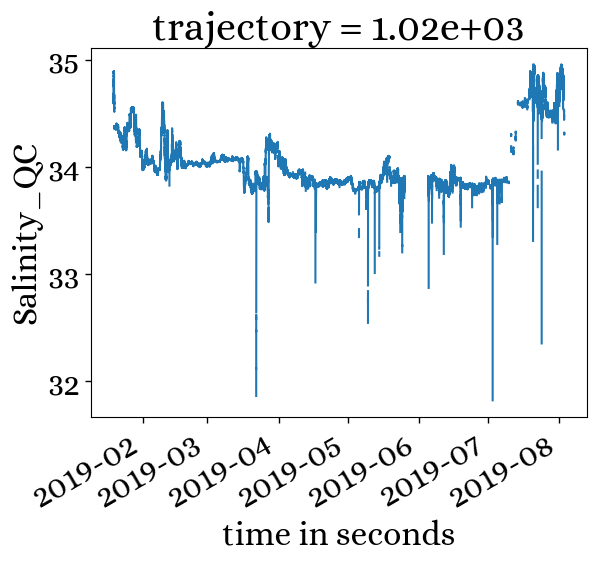

In [645]:
ds20["Salinity_QC"].plot()

In [563]:
data[downspike].sel(time=slice("2019-03-22 05:50","2019-03-22 06:40"))

<xarray.DataArray 'SAL_RBR_MEAN' (time: 5)>
array([31.83 , 32.099, 32.451, 32.56 , 32.601])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-03-22T06:01:00 ... 2019-03-22T06:2...
    trajectory  float32 1.02e+03
    minutes     (time) int64 89401 89409 89416 89423 89426
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [493]:
spike_periods = []
n=60
threshold = 0.006
for i in range(len(dS[100:100+100])):
    if dS[i] < -threshold:  # Check for negative spike
        next_spike_idx = None
        for j in range(i + 1, min(i + n + 1, len(dS[100:100+100]))):
            if (dS[100:100+100][j] > threshold and dS[100:100+100][i] < 0) or (dS[100:100+100][j] < -threshold and dS[100:100+100][i] > 0):
                next_spike_idx = j
                break

        if next_spike_idx is not None:
            spike_periods.append((i, next_spike_idx))

print("Spike periods:", spike_periods)

Spike periods: [(1, 22), (8, 22), (9, 14), (10, 14), (12, 22), (13, 14), (16, 22), (19, 22), (22, 27), (24, 28), (37, 49)]


In [498]:
dS[100:200] < -threshold

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [496]:
dS[100:200]

array([ 0.001, -0.001,  0.001, -0.001,  0.003,  0.001,  0.002,  0.001,
       -0.002,  0.002,  0.001,  0.   , -0.003,  0.001, -0.006, -0.002,
       -0.005, -0.001,  0.001, -0.002, -0.001, -0.016,  0.017, -0.001,
       -0.001,  0.004, -0.004, -0.022,  0.025, -0.001, -0.003,  0.005,
        0.003,  0.002,  0.001,  0.003,  0.004, -0.002,  0.001,  0.005,
        0.003, -0.061, -0.001,  0.   ,  0.003, -0.002,  0.   , -0.001,
       -0.001,  0.006,  0.   ,  0.002,  0.002, -0.006,  0.007, -0.009,
       -0.005,  0.006, -0.001, -0.001,  0.07 ,  0.005, -0.004, -0.003,
        0.004, -0.001,  0.   , -0.002,  0.003, -0.002,  0.008,  0.002,
        0.   ,  0.001, -0.005,  0.001,  0.   ,  0.001,  0.001, -0.002,
        0.003, -0.001,  0.001,  0.   ,  0.004,  0.   ,  0.003, -0.003,
        0.003, -0.001,  0.004,    nan,    nan,  0.001, -0.001,  0.007,
       -0.006,  0.003,  0.001,  0.   ])

In [495]:
data[100:200].values

array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812,
       34.813, 34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806,
       34.804, 34.799, 34.798, 34.799, 34.797, 34.796, 34.78 , 34.797,
       34.796, 34.795, 34.799, 34.795, 34.773, 34.798, 34.797, 34.794,
       34.799, 34.802, 34.804, 34.805, 34.808, 34.812, 34.81 , 34.811,
       34.816, 34.819, 34.758, 34.757, 34.757, 34.76 , 34.758, 34.758,
       34.757, 34.756, 34.762, 34.762, 34.764, 34.766, 34.76 , 34.767,
       34.758, 34.753, 34.759, 34.758, 34.757, 34.827, 34.832, 34.828,
       34.825, 34.829, 34.828, 34.828, 34.826, 34.829, 34.827, 34.835,
       34.837, 34.837, 34.838, 34.833, 34.834, 34.834, 34.835, 34.836,
       34.834, 34.837, 34.836, 34.837, 34.837, 34.841, 34.841, 34.844,
       34.841, 34.844, 34.843, 34.847,    nan, 34.852, 34.853, 34.852,
       34.859, 34.853, 34.856, 34.857])

In [475]:
cleaned_data = data[100:100+100].copy()

for start_idx, end_idx in spike_periods:
    cleaned_data[start_idx+1:end_idx+1] = np.nan  # Mark the spike region for removal


In [476]:
cleaned_data

<xarray.DataArray 'SAL_RBR_MEAN' (time: 100)>
array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812, 34.813,
       34.811,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan, 34.773, 34.798, 34.797, 34.794, 34.799, 34.802, 34.804, 34.805,
       34.808, 34.812,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan, 34.827, 34.832,
       34.828, 34.825, 34.829, 34.828, 34.828, 34.826, 34.829, 34.827, 34.835,
       34.837, 34.837, 34.838, 34.833, 34.834, 34.834, 34.835, 34.836, 34.834,
       34.837, 34.836, 34.837, 34.837, 34.841, 34.841, 34.844, 34.841, 34.844,
       34.843, 34.847,    nan, 34.852, 34.853, 34.852, 34.859, 34.853, 34.856,
       34.857])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T07:1...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [ ]:
data

In [431]:
dS = np.diff(data)
downspike = (np.where(dS[100:100+100] < -0.006)[0]+1)
upspike = (np.where(dS[100:100+100] > 0.006)[0]+1)


In [454]:
data[100:100+100].where(np.abs(data[100:100+100]-data[100:100+100].rolling(time=5,center=True).median("time")) < 0.006)

<xarray.DataArray 'SAL_RBR_MEAN' (time: 100)>
array([   nan,    nan, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812,
       34.813, 34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806,
       34.804, 34.799, 34.798, 34.799, 34.797, 34.796,    nan, 34.797,
       34.796, 34.795, 34.799, 34.795,    nan, 34.798, 34.797, 34.794,
       34.799, 34.802, 34.804, 34.805, 34.808, 34.812, 34.81 , 34.811,
       34.816,    nan, 34.758, 34.757, 34.757, 34.76 , 34.758, 34.758,
       34.757, 34.756, 34.762, 34.762, 34.764, 34.766, 34.76 ,    nan,
       34.758, 34.753, 34.759, 34.758, 34.757, 34.827, 34.832, 34.828,
       34.825, 34.829, 34.828, 34.828, 34.826, 34.829, 34.827, 34.835,
       34.837, 34.837, 34.838, 34.833, 34.834, 34.834, 34.835, 34.836,
       34.834, 34.837, 34.836, 34.837, 34.837, 34.841, 34.841, 34.844,
       34.841, 34.844,    nan,    nan,    nan,    nan,    nan, 34.852,
          nan, 34.853,    nan,    nan])
Coordinates:
    latitude    (time) float64 -46.71 -46.71 -46.71 ... -46.76 -46.76 -46.76
    longitude   (time) float64 168.7 168.7 168.7 168.7 ... 168.9 168.9 168.9
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T07:1...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [ ]:
max_positive_change_idx = i + np.argmax(np.where((dS[i:i+n] >= threshold) & (dS[i:i+n] <= -dS[i]))[0])

In [438]:
downspike

array([15, 22, 28, 42, 54, 56, 97])

In [433]:
upspike

array([23, 29, 50, 55, 58, 61, 71, 96])

In [436]:
dS[100:100+100]

array([ 0.001, -0.001,  0.001, -0.001,  0.003,  0.001,  0.002,  0.001,
       -0.002,  0.002,  0.001,  0.   , -0.003,  0.001, -0.006, -0.002,
       -0.005, -0.001,  0.001, -0.002, -0.001, -0.016,  0.017, -0.001,
       -0.001,  0.004, -0.004, -0.022,  0.025, -0.001, -0.003,  0.005,
        0.003,  0.002,  0.001,  0.003,  0.004, -0.002,  0.001,  0.005,
        0.003, -0.061, -0.001,  0.   ,  0.003, -0.002,  0.   , -0.001,
       -0.001,  0.006,  0.   ,  0.002,  0.002, -0.006,  0.007, -0.009,
       -0.005,  0.006, -0.001, -0.001,  0.07 ,  0.005, -0.004, -0.003,
        0.004, -0.001,  0.   , -0.002,  0.003, -0.002,  0.008,  0.002,
        0.   ,  0.001, -0.005,  0.001,  0.   ,  0.001,  0.001, -0.002,
        0.003, -0.001,  0.001,  0.   ,  0.004,  0.   ,  0.003, -0.003,
        0.003, -0.001,  0.004,    nan,    nan,  0.001, -0.001,  0.007,
       -0.006,  0.003,  0.001,  0.   ])

In [434]:
data[100:100+100][15]

<xarray.DataArray 'SAL_RBR_MEAN' ()>
array(34.806)
Coordinates:
    latitude    float64 ...
    longitude   float64 ...
    time        datetime64[ns] 2019-01-19T05:55:00
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

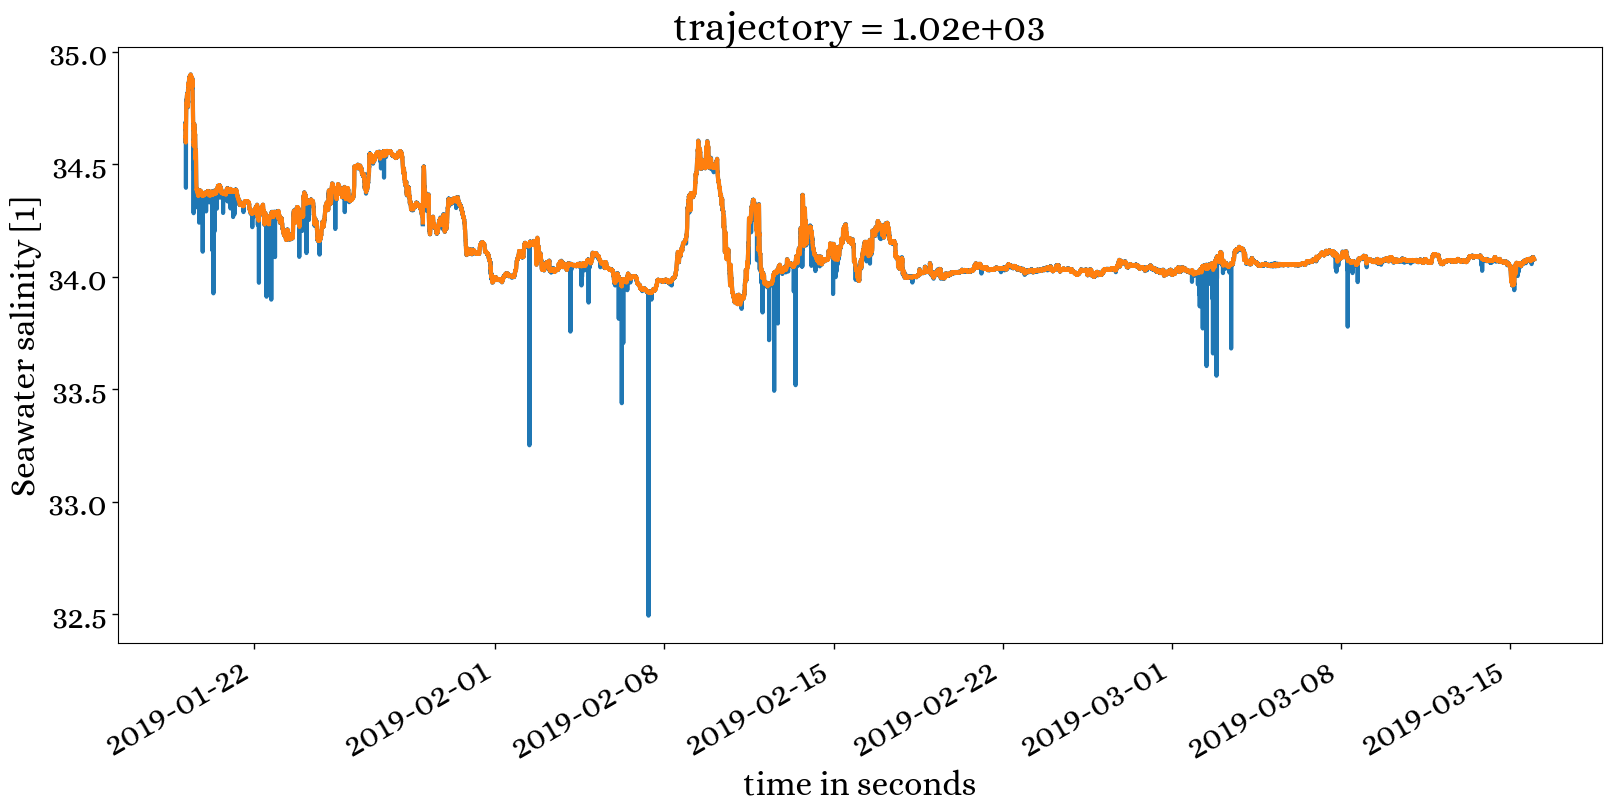

In [739]:
fig, ax = plt.subplots(1,1,figsize=(16,8),constrained_layout=True)

ds20["SAL_RBR_MEAN"].sel(time=interval).plot(ax=ax,lw=3,label="Raw")
ds20["SAL_RBR_MEAN"].rolling(time=5,center=True).median("time").sel(time=interval).plot(ax=ax,lw=3,label="5-point median")

# ds20["SAL_RBR_MEAN"].where(ds20["SAL_RBR_MEAN"].values - ds20["SAL_RBR_MEAN"].rolling(time=5,center=True).median("time").values < 0.001).sel(time=interval).plot(ax=ax,lw=3,label="Stina's way")

In [415]:
cleaned_data

<xarray.DataArray 'SAL_RBR_MEAN' (time: 282271)>
array([34.656, 34.676, 34.668, ..., 33.424,    nan, 33.428])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T04:00:00 ... 2019-08-03T04:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [395]:
data[100:100+60]

<xarray.DataArray 'SAL_RBR_MEAN' (time: 60)>
array([34.806, 34.807, 34.806, 34.807, 34.806, 34.809, 34.81 , 34.812, 34.813,
       34.811, 34.813, 34.814, 34.814, 34.811, 34.812, 34.806, 34.804, 34.799,
       34.798, 34.799, 34.797, 34.796, 34.78 , 34.797, 34.796, 34.795, 34.799,
       34.795, 34.773, 34.798, 34.797, 34.794, 34.799, 34.802, 34.804, 34.805,
       34.808, 34.812, 34.81 , 34.811, 34.816, 34.819, 34.758, 34.757, 34.757,
       34.76 , 34.758, 34.758, 34.757, 34.756, 34.762, 34.762, 34.764, 34.766,
       34.76 , 34.767, 34.758, 34.753, 34.759, 34.758])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-01-19T05:40:00 ... 2019-01-19T06:3...
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

In [399]:
dS[100:100+60]

array([ 0.001, -0.001,  0.001, -0.001,  0.003,  0.001,  0.002,  0.001,
       -0.002,  0.002,  0.001,  0.   , -0.003,  0.001, -0.006, -0.002,
       -0.005, -0.001,  0.001, -0.002, -0.001, -0.016,  0.017, -0.001,
       -0.001,  0.004, -0.004, -0.022,  0.025, -0.001, -0.003,  0.005,
        0.003,  0.002,  0.001,  0.003,  0.004, -0.002,  0.001,  0.005,
        0.003, -0.061, -0.001,  0.   ,  0.003, -0.002,  0.   , -0.001,
       -0.001,  0.006,  0.   ,  0.002,  0.002, -0.006,  0.007, -0.009,
       -0.005,  0.006, -0.001, -0.001])

In [403]:
dS[100:100+60] < -0.006

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False])

In [401]:
(34.758 - 34.819)# < 0.006

-0.06099999999999994

In [ ]:
data[507:507+60]

In [364]:
np.where(((data[507:507+60] - data[507]).values) > 0.006)[0][0]

3

In [373]:
np.where(np.diff(data)[507:507+60] > 0.006)[0][0]

1

In [374]:
np.where(np.diff(data)[507:507+60] > 0.006)[0][0]

1

In [367]:
data[508]

<xarray.DataArray 'SAL_RBR_MEAN' ()>
array(34.475)
Coordinates:
    latitude    float64 ...
    longitude   float64 ...
    time        datetime64[ns] 2019-01-19T12:28:00
    trajectory  float32 1.02e+03
Attributes:
    standard_name:              sea_water_practical_salinity
    long_name:                  Seawater salinity
    units:                      1
    installed_date:             2018-11-01T00:00:00Z
    device_name:                RBR CTD/ODO/Chl-A (40804)
    serial_number:              40804
    last_calibrated:            2018-10-19
    installed_height:           -0.5
    vendor_name:                RBR
    model_name:                 Saildrone^3
    nominal_sampling_schedule:  12s on, 48s off, centered at :00
    update_period:              500.0

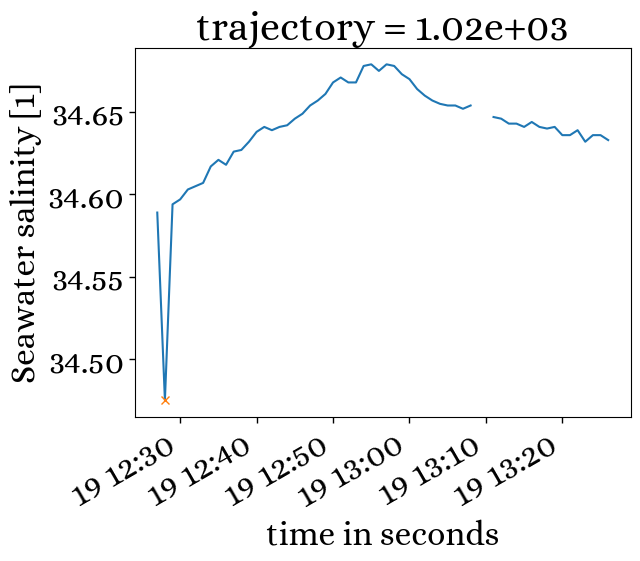

In [368]:
data[507:507+60].plot()
plt.plot(data["time"][508],data[508],marker="x")

In [ ]:
np.abs((data[507:507+60] - data[507]).values) > 0.006

In [313]:
# Calculate time differences (dS)
data = ds20["SAL_RBR_MEAN"]
dS = np.diff(data)

# Calculate the threshold based on a percentile of dS
threshold = np.nanpercentile(np.abs(dS), 95)
lag = 5

spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
i = 0
while i < len(dS):
    if (dS[i] <= -threshold) & (len(np.where(dS[i:i+lag] >= threshold)[0]) > 0):
        # Check if time difference is less than negative threshold
        start_idx = i  # Start from the maximum possible index within the lag window

        # Find the maximum positive change within the lag window
        max_positive_change_idx = i + np.argmax(np.where(dS[i:i+lag] >= threshold)[0])
        end_idx = max_positive_change_idx+1  # End at the maximum positive change index

        spikes[start_idx+1:end_idx+1] = True  # Mark the spike region for removal
        i = max_positive_change_idx + 1  # Move to the next index after the spike region
    else:
        i += 1  # Move to the next index

cleaned_data = data.copy()
cleaned_data[spikes] = np.nan  # Adjust for the difference in dimensions

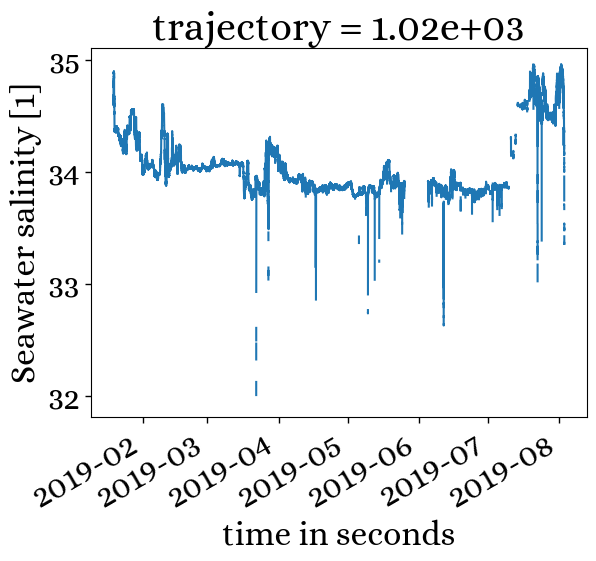

In [314]:
cleaned_data.plot()

In [286]:
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 60, 99).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot()

ValueError: attempt to get argmax of an empty sequence

In [238]:
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 99).sel(time="2019-04-17 05").diff("time") > threshold

<xarray.DataArray 'SAL_RBR_MEAN' (time: 59)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False])
Coordinates:
    latitude    (time) float64 ...
    longitude   (time) float64 ...
  * time        (time) datetime64[ns] 2019-04-17T05:01:00 ... 2019-04-17T05:5...
    trajectory  float32 1.02e+03

[Text(0.5, 0, ''), Text(0.5, 1.0, '')]

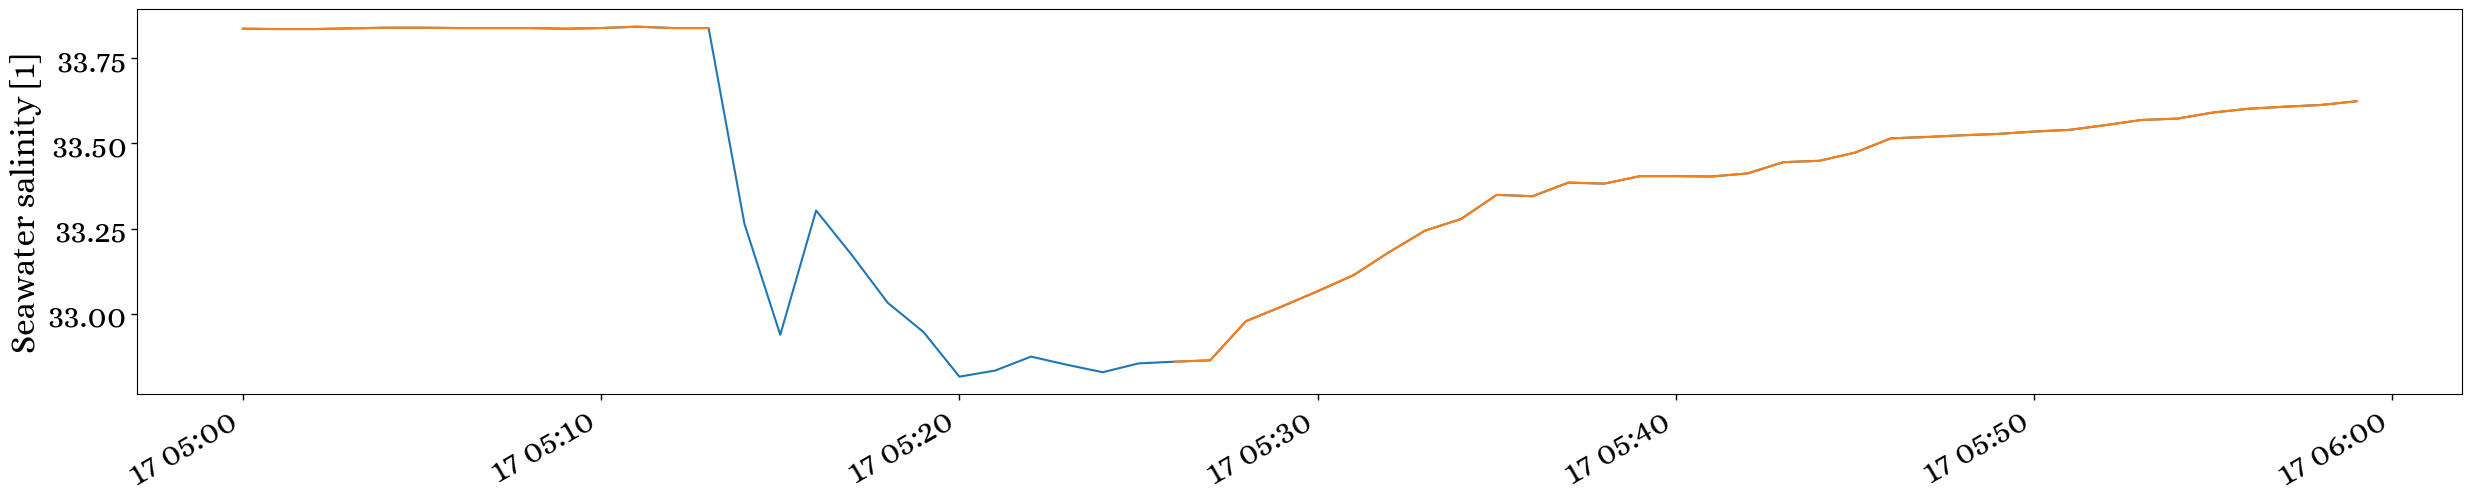

In [320]:
fig,ax = plt.subplots(figsize=(30,5))
ds20["SAL_RBR_MEAN"].sel(time="2019-04-17 05").plot()
#detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 99).sel(time="2019-04-17 05").interpolate_na("time").plot()
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 95).sel(time="2019-04-17 05").plot()
ax.set(xlabel="",title="")
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 15, 95).sel(time="2019-04-17 05").plot()

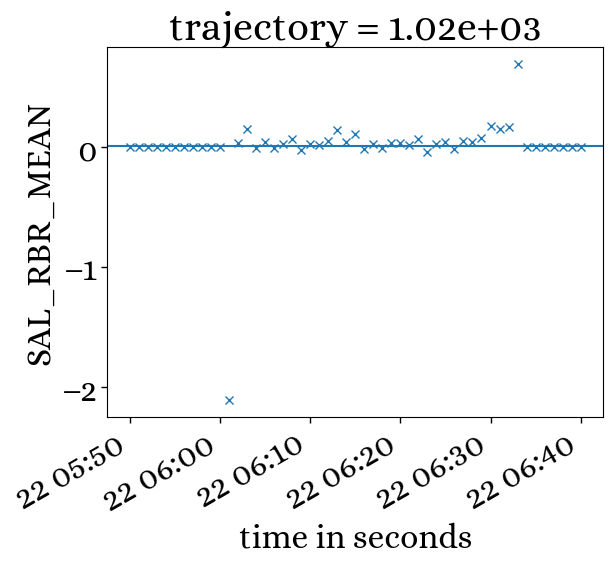

In [234]:
ds20["SAL_RBR_MEAN"].diff("time").sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot(marker='x',ls="")
plt.axhline(np.nanpercentile(ds20["SAL_RBR_MEAN"].diff("time"),95))

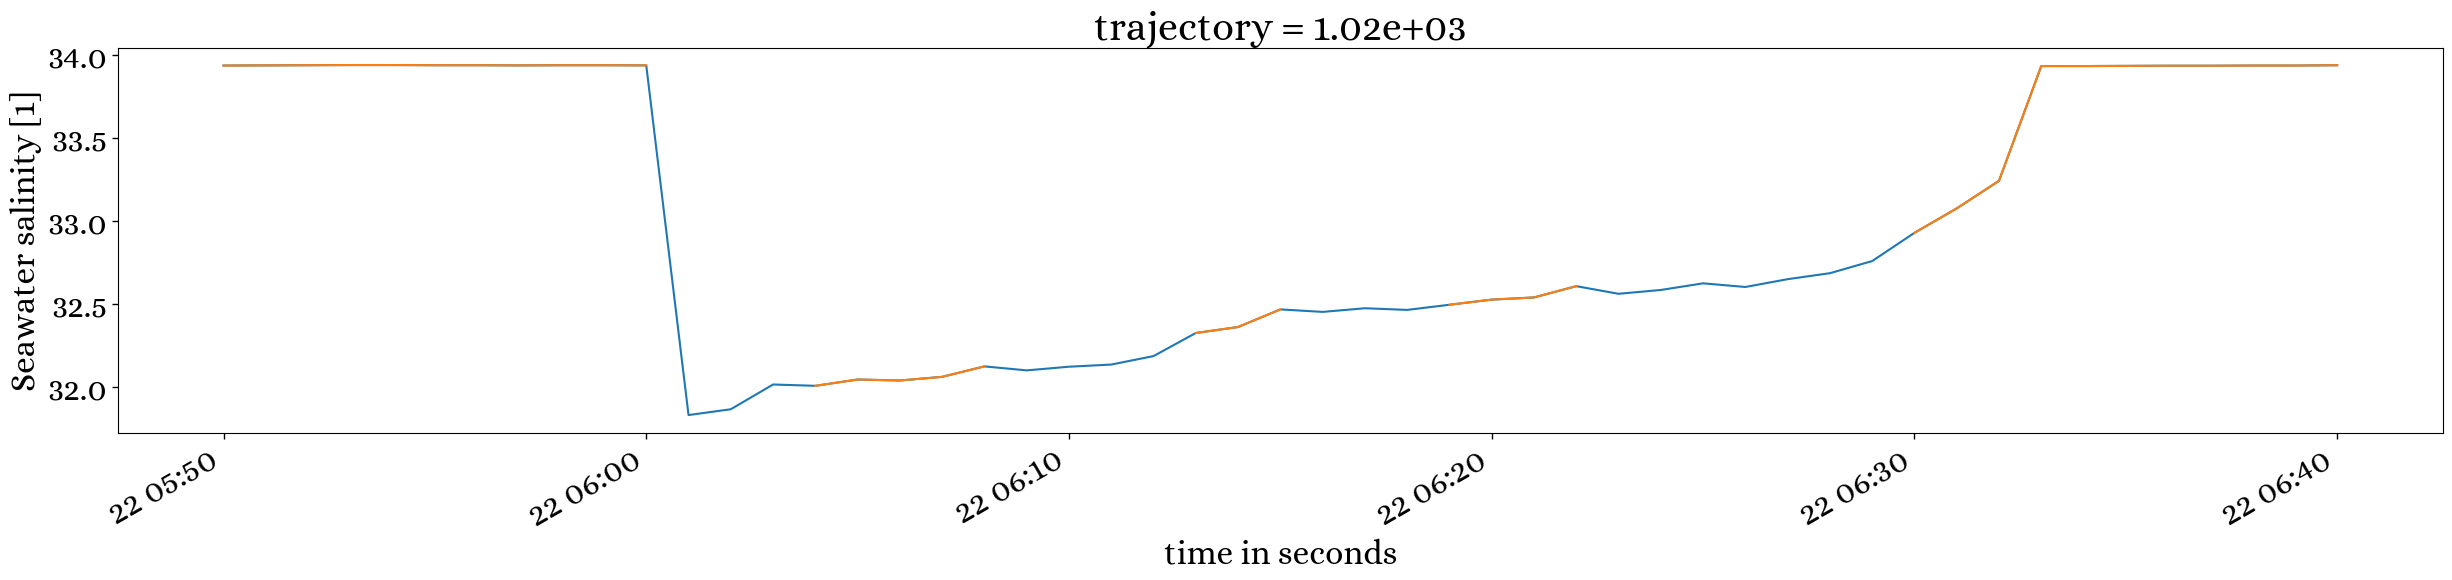

In [322]:
fig,ax = plt.subplots(figsize=(30,5))
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot()
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 60, 95).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).interpolate_na("time").plot()
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 5, 95).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).plot()
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 15, 95).sel(time="2019-04-17 05").plot()

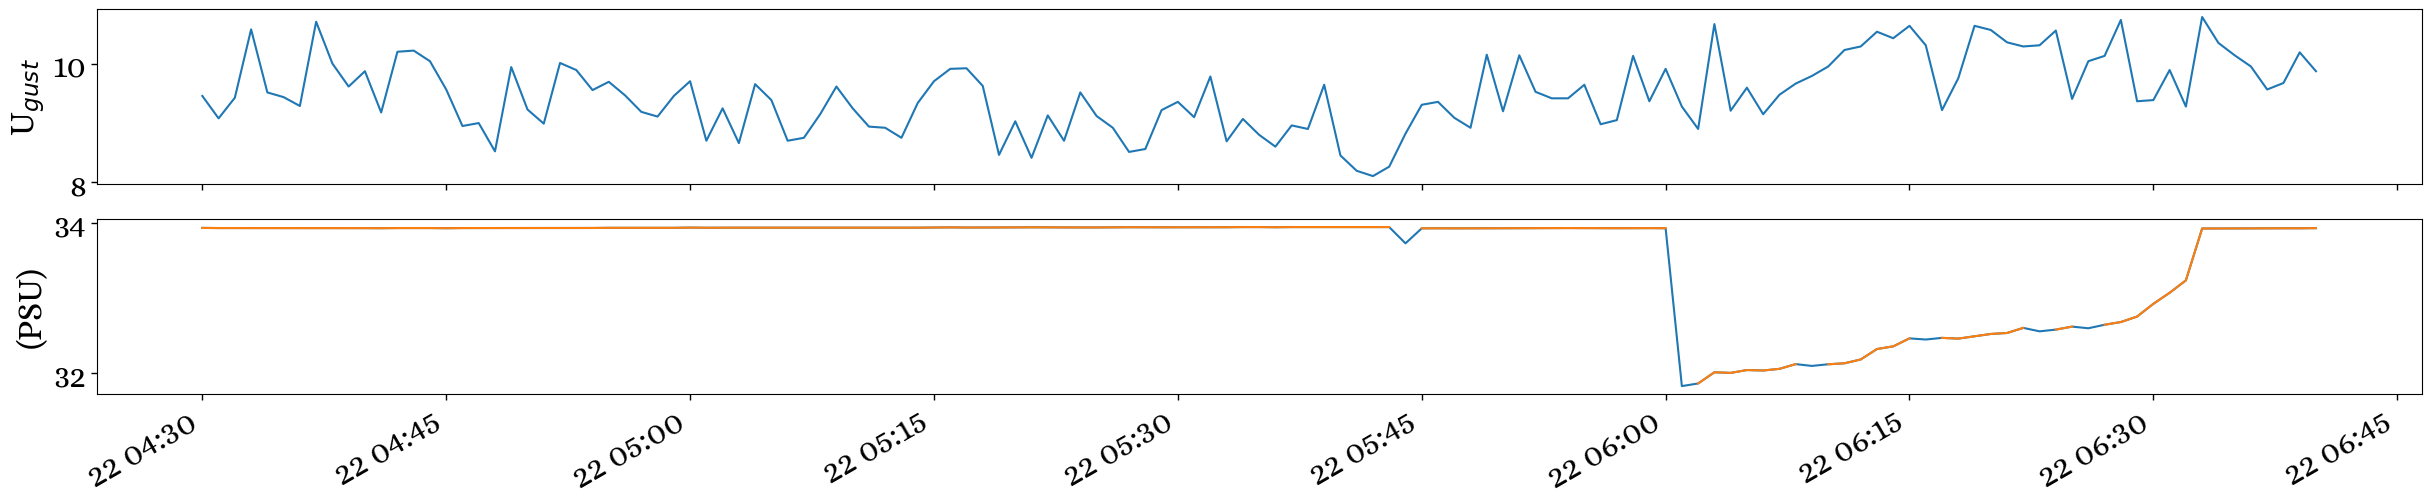

In [332]:
fig,ax = plt.subplots(2,1,figsize=(30,5),sharex=True)

ds20["GUST_WND_MEAN"].sel(time=slice("2019-03-22 04:30","2019-03-22 06:40")).plot(ax=ax[0])

ds20["SAL_RBR_MEAN"].sel(time=slice("2019-03-22 04:30","2019-03-22 06:40")).plot(ax=ax[1])
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 60, 95).sel(time=slice("2019-03-22 05:50","2019-03-22 06:40")).interpolate_na("time").plot()
detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 2, 99).sel(time=slice("2019-03-22 04:30","2019-03-22 06:40")).plot(ax=ax[1])
# detect_spikes_with_lag(ds20["SAL_RBR_MEAN"], 15, 95).sel(time="2019-04-17 05").plot()

for axs,y in zip(ax,[r"U$_{gust}$", "(PSU)"]):
    axs.set(title="",xlabel="",ylabel=y)

In [133]:
spikes = np.zeros(len(dS) + 1, dtype=bool)  # Extend the spikes array by one element
for i in range(len(dS)):
    if (dS[i] < -threshold) & (True in (dS[i:i+lag] > threshold)): # Check if time difference is less than negative threshold and that there is an upspike within the allowed interval
        start_idx = i  # Start from the maximum possible index within the lag window
        end_idx = i + np.where((dS[i:i+lag] > threshold) == True)[0][0]  # End at the current index
        spikes[start_idx:end_idx] = True  # Mark the spike region for removal

In [128]:
for i in range(len(dS)):
    if (dS[i] < -threshold) & (True in (dS[i:i+5] > threshold)):
        print(i,"Start of spike")
        print(i+np.where((dS[i:i+5] > threshold) == True)[0][0],"End of spike")
        

2 Start of spike
5 End of spike


In [141]:
# Example usage
salinity = np.array([35, 35, 33, 33, 35, 33, 35, 35], dtype=float)  # Example salinity data
dS = np.diff(salinity)  # Compute time difference of salinity
threshold = 1#np.percentile(dS, 95)  # Calculate the 95th percentile of dS
lag = 5  # Lag window size

spikes_with_lag = detect_spikes_with_lag(dS, lag, 1)
print("Spike indices with lag:", np.where(spikes_with_lag)[0])

# Output cleaned salinity array
cleaned_salinity = salinity.copy()
cleaned_salinity[np.concatenate(([False], spikes_with_lag))] = np.nan  # Adjust for the difference in dimensions
print("Cleaned salinity:", cleaned_salinity)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 7 but corresponding boolean dimension is 8

In [106]:
dS

array([ 0.,  0., -2.,  0.,  0.,  2.,  0.])

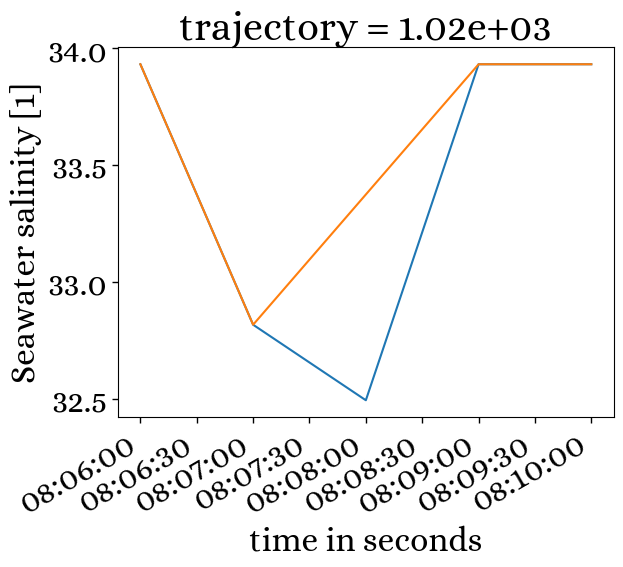

In [70]:
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).plot()
qc_salinity(ds20,"SAL_RBR_MEAN",95,1).sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).plot()

In [58]:
one   = qc_salinity(ds20,"SAL_RBR_MEAN",95)
two   = qc_salinity(one,"SAL_RBR_MEAN",95)
three = qc_salinity(two,"SAL_RBR_MEAN",95)
four  = qc_salinity(three,"SAL_RBR_MEAN",95)
five  = qc_salinity(four,"SAL_RBR_MEAN",95)

KeyError: 'SAL_RBR_MEAN'

In [57]:
ds20

<xarray.Dataset>
Dimensions:                         (time: 282271)
Coordinates:
    latitude                        (time) float64 ...
    longitude                       (time) float64 ...
  * time                            (time) datetime64[ns] 2019-01-19T04:00:00...
    trajectory                      float32 1.02e+03
Data variables: (12/49)
    SOG                             (time) float64 1.762 1.361 ... 3.646 3.824
    COG                             (time) float64 119.8 118.8 ... 318.2 314.0
    HDG                             (time) float64 108.2 104.8 ... 317.3 312.8
    HDG_WING                        (time) float64 107.1 103.7 ... 107.3 107.3
    WING_ANGLE                      (time) float64 -1.1 -1.1 0.0 ... 147.8 151.5
    UWND_MEAN                       (time) float64 13.7 nan nan ... nan nan nan
    ...                              ...
    O2_SAT_RBR_MEAN                 (time) float64 96.29 96.24 ... 96.11 96.05
    O2_SAT_RBR_STDDEV               (time) float64 0.09 0.04 0.04 ... 0.07 0.09
    TEMP_O2_RBR_MEAN                (time) float64 15.68 15.67 ... 9.876 9.871
    TEMP_O2_RBR_STDDEV              (time) float64 0.002 0.002 ... 0.006 0.012
    CHLOR_RBR_MEAN                  (time) float64 1.505 1.534 ... 69.34 52.6
    CHLOR_RBR_STDDEV                (time) float64 0.0268 0.1127 ... 1.73 1.385
Attributes: (12/38)
    title:                     Antarctica Circumnavigation Surface Data
    summary:                   This data set was collected from the first Sai...
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3
    netcdf_version:            4.6.3
    featureType:               trajectory
    ...                        ...
    geospatial_lat_min:        -60.9862208
    geospatial_lat_max:        -46.4277568
    geospatial_lat_units:      degrees_north
    geospatial_lon_min:        -179.9986816
    geospatial_lon_max:        179.9997312
    geospatial_lon_units:      degrees_east

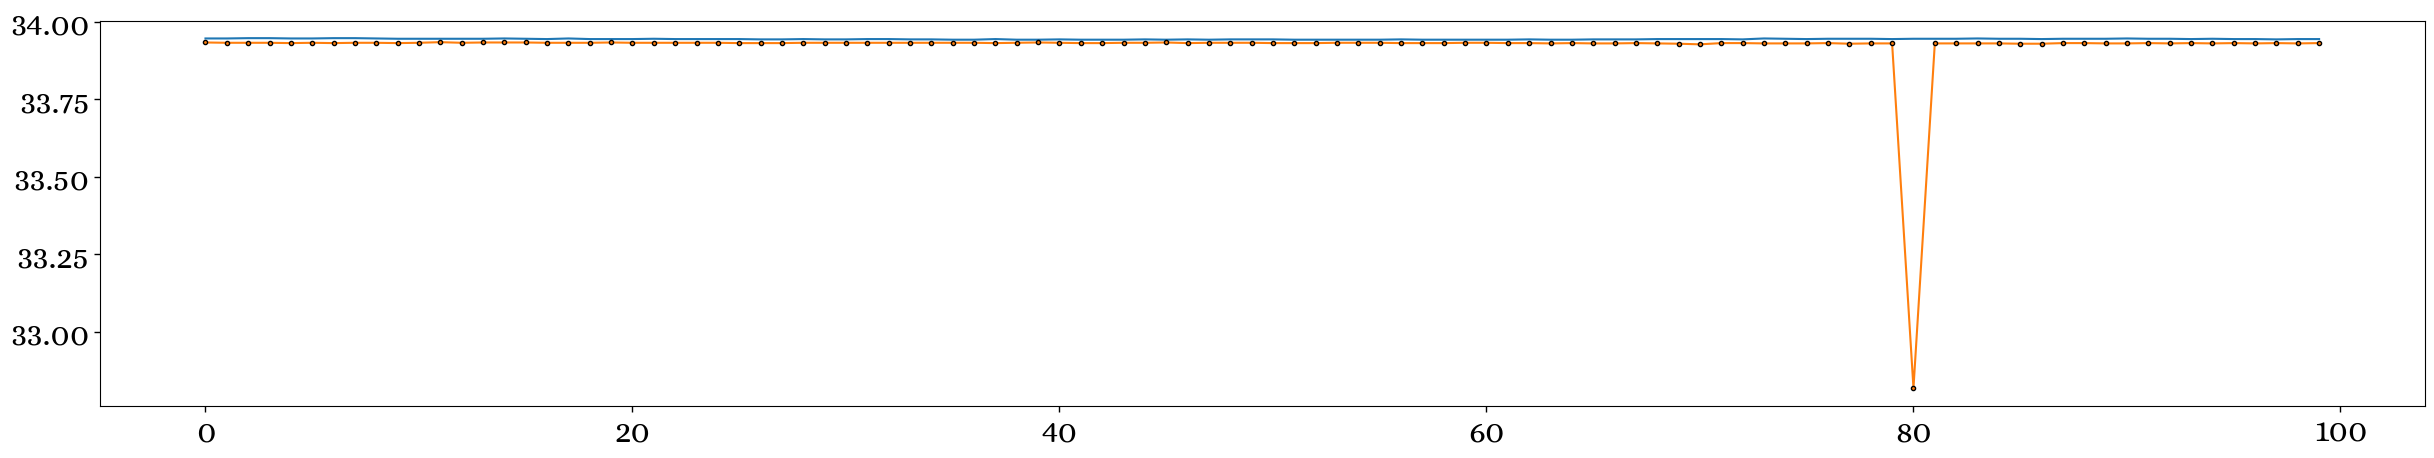

In [34]:
#ds20["SAL_RBR_MEAN"][:100000].plot()
plt.figure(figsize=(30,5))
plt.plot(ds20["SAL_RBR_MEAN"][27300:27400].values)
plt.plot(ds20["SAL_RBR_MEAN"][idx][27300:27400].values,marker='.',mec='k')

TypeError: No numeric data to plot.

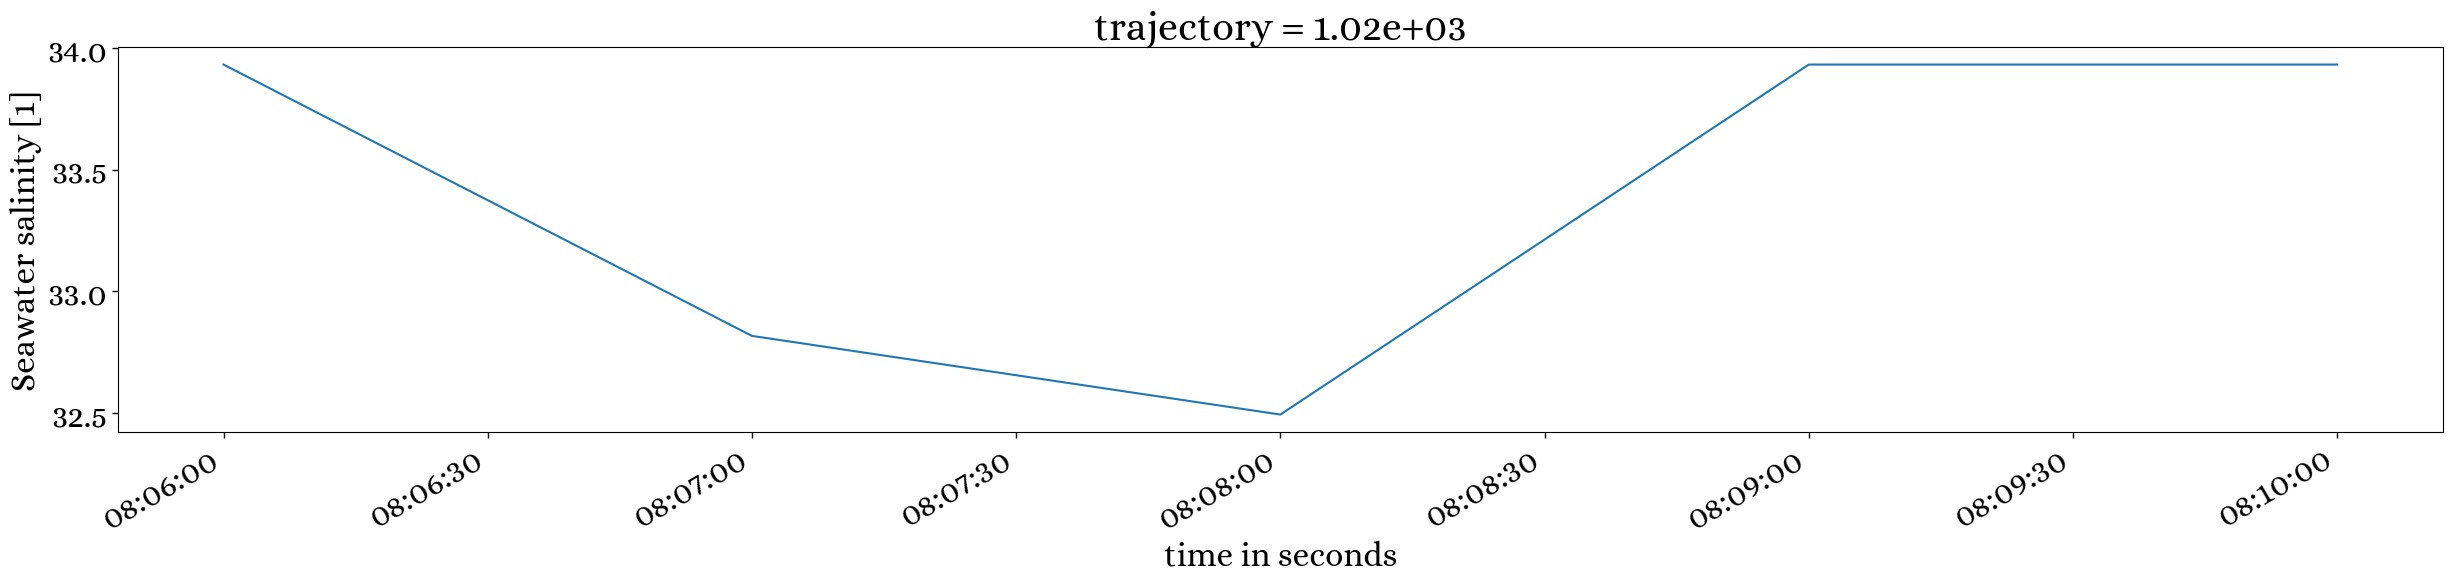

In [59]:
plt.figure(figsize=(30,5))
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).plot()
ds20["SAL_RBR_MEAN"][idx].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).resample(time="1min").mean("time").interpolate_na("time").plot()

In [ ]:
def qc_salinity(ds,variable,percentile):
    
    dS = np.diff(ds[variable])
    lim = np.nanpercentile(dS,percentile)
    bad = np.abs(ds) > lim
    idx = np.where(~((ds[:-1] < 0) & (ds[1:] > 0) & (bad[1:])))[0]+1
    
    
    

In [43]:
ds20["SAL_RBR_MEAN"].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).values

array([33.931, 32.817, 32.494, 33.931, 33.931])

In [54]:
ds20["SAL_RBR_MEAN"][idx].sel(time=slice("2019-02-07 08:06","2019-02-07 08:10")).resample(time="1min").mean("time").interpolate_na("time").values

array([33.931, 32.817, 33.374, 33.931, 33.931])

In [60]:
def find_spike_indices(ds, variable, percentile):
    dS = np.diff(ds[variable])
    lim = np.nanpercentile(dS, percentile)
    bad = np.abs(dS) > lim
    
    spike_indices = []
    start_idx = None
    
    for i in range(len(dS)):
        if bad[i]:
            if start_idx is None:
                start_idx = i
        elif start_idx is not None:
            spike_indices.append(start_idx + 1)  # Adding 1 to account for np.diff()
            start_idx = None
    
    if start_idx is not None:
        spike_indices.append(start_idx + 1)  # Adding 1 to account for np.diff() for the last spike
    
    return spike_indices

idx = find_spike_indices(ds20, "SAL_RBR_MEAN", 95)
#print("Spike indices:", idx)

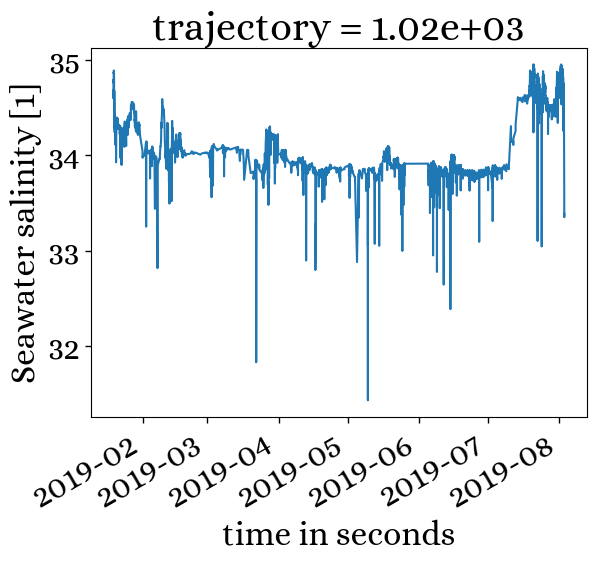

In [63]:
ds20["SAL_RBR_MEAN"][idx].plot()

In [64]:
def find_spike_indices(ds, variable, percentile):
    dS = np.diff(ds[variable])
    lim = np.nanpercentile(dS, percentile)
    bad = np.abs(dS) > lim
    #idx = np.where(~((dS[:-1] < 0) & (dS[1:] > 0) & (bad[1:])))[0] + 1
    
    spike_indices = []
    start_idx = None
    
    for i, val in enumerate(idx):
        if start_idx is None:
            start_idx = val
        elif len(spike_indices) == 0 or val - spike_indices[-1] > 1:
            spike_indices.append(start_idx)
            start_idx = val
        elif i == len(idx) - 1:
            spike_indices.append(start_idx)
        else:
            continue
    
    return spike_indices

idx = find_spike_indices(ds20, "SAL_RBR_MEAN", 95)
#print("Spike indices:", idx)

In [76]:
import numpy as np

def detect_spikes(data, threshold):
    """
    Detect spikes in a time series data based on a threshold.
    
    Parameters:
        data (ndarray): 1D array of the time series data.
        threshold (float): Threshold for detecting spikes.
    
    Returns:
        ndarray: Boolean array indicating spike locations.
    """
    differences = np.diff(data)
    sign_changes = np.sign(differences[:-1]) != np.sign(differences[1:])
    return np.abs(differences[1:]) > threshold, sign_changes

def remove_spikes(data, spikes, sign_changes):
    """
    Remove spikes from the time series data.
    
    Parameters:
        data (ndarray): 1D array of the time series data.
        spikes (ndarray): Boolean array indicating spike locations.
        sign_changes (ndarray): Boolean array indicating sign changes.
    
    Returns:
        ndarray: Cleaned time series data with spikes removed.
    """
    cleaned_data = data.copy()
    # Iterate over the spikes and remove the corresponding values if there's a sign change
    for i in range(len(spikes)):
        if spikes[i] and sign_changes[i]:
            cleaned_data[i+1] = np.nan  # Set the spike value to NaN
    return cleaned_data

In [78]:
# Example usage
salinity = np.array([33.931, 30, 30, 33.931, 33.931])
threshold = 1.0  # Adjust the threshold as needed

spikes, sign_changes = detect_spikes(salinity, threshold)
cleaned_salinity = remove_spikes(salinity, spikes, sign_changes, threshold)

print("Spike indices:", np.where(spikes)[0])
print("Raw salinity:", salinity)
print("Cleaned salinity:", cleaned_salinity)


Spike indices: [1]
Raw salinity: [33.931 30.    30.    33.931 33.931]
Cleaned salinity: [   nan    nan 30.    33.931 33.931]
